In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii,fits
from pandas import read_table
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
import astropy.units as u
from astroquery.gaia import Gaia
from astroquery.mast import Observations
from astropy.table import Table, join, Column, vstack
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter,find_peaks
import matplotlib.ticker as plticker
import lightkurve as lk
from tess_stars2px import tess_stars2px_function_entry
import glob
from astropy.visualization import LogStretch, ZScaleInterval, MinMaxInterval, SquaredStretch 
from astropy.wcs import WCS
from astroML.crossmatch import crossmatch_angular
from astroquery.eso import Eso
from K2fov import K2findCampaigns
import pandas as pd
from collections import Counter
from mw_plot import MWPlot

#Gaia.login(user='bhealy',password='exAtm17$')


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [4]:
vsinifile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_586_A52_table1.dat.fits'
coordfile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_586_A52_table3.dat.fits'

hdulist = fits.open(vsinifile)
jefftbl1 = Table(hdulist[1].data)

hdulist = fits.open(coordfile)
jefftbl3 = Table(hdulist[1].data)



In [27]:
gammavel_Tbl = Table(fits.open('/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_563_A94_table2.dat.fits')[1].data)

In [19]:
pleiades_source_ids = np.zeros(len(Pleiades_rotation),dtype=np.int64)
pleiades_radii = np.zeros(len(Pleiades_rotation))
pleiades_bprp = np.zeros(len(Pleiades_rotation))

for i in range(len(Pleiades_rotation)):
    print(i)
    
    SC = SkyCoord(Pleiades_rotation.iloc[i]['RAdeg'],Pleiades_rotation.iloc[i]['DEdeg'],unit=(u.deg,u.deg))

    qry = Gaia.query_object_async(SC,radius=1*u.arcsec)
    try:
        sourceid = qry[0]['source_id']
        radius = qry[0]['radius_val']
        bprp = qry[0]['bp_rp']
        pleiades_source_ids[i] = sourceid
        pleiades_radii[i] = radius
        pleiades_bprp[i] = bprp
    except:
        continue

0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Warning: converting a masked element to nan.
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Warning: converting a masked element to nan.
  app.launch_new_instance()
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [40]:
Pleiades_rotation['source_id'] = pleiades_source_ids
Pleiades_rotation['radius_val'] = pleiades_radii
Pleiades_rotation['bp_rp'] = pleiades_bprp

In [46]:
merged_Pleiades_data = pd.merge(obsmerge_mems,Pleiades_rotation,on='source_id')

In [24]:
#highprob = merged_Pleiades_data['proba']>0.68
SDSS_GALAH_merge = pd.read_csv('/Users/bhealy/Downloads/SDSS_GALAH_merge.csv')

/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,20,21,22,28,30,54,55,56,74,76,155,156,176,198,201,204,301) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
#merged_Pleiades_data = merged_Pleiades_data.drop('vsini',axis=1)

In [48]:
pleiades_mergetbl = pd.merge(SDSS_GALAH_merge,merged_Pleiades_data,on='source_id')

In [50]:
#pleiades_mergetbl.to_csv('/Users/bhealy/Documents/PhD_Thesis/Pleiades_merged_Gaia_APO.csv')

In [51]:
pleiades_mergetbl = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Pleiades_merged_Gaia_APO.csv')

In [52]:
pleiades_mergetbl

Unnamed: 0          source_id           APOGEE_ID TELESCOPE  \
0             0  68398732874994944  2M03363030+2400440    apo25m   
1             1  68175806892217216  2M03394633+2358531    apo25m   
2             2  68147391388599808  2M03394797+2350570    apo25m   
3             3  68334235349446528  2M03403072+2429143    apo25m   
4             4  68129764842889600  2M03403436+2340574    apo25m   
5             5  65119164567417856  2M03405042+2325064    apo25m   
6             6  65125864716379264  2M03405126+2335543    apo25m   
7             7  65125864716379264  2M03405126+2335543    apo25m   
8             8  68152820227358720  2M03410297+2343217    apo25m   
9             9  68152820227358720  2M03410297+2343217    apo25m   
10           10  65107860213588096  2M03411379+2323058    apo25m   
11           11  68167835432980480  2M03412688+2401025    apo25m   
12           12  68167835432980480  2M03412688+2401025    apo25m   
13           13  65150947325369600  2M03412782+2342300    apo25m   
14           14  65151531440914560  2M03413957+2345471    apo25m   
15           15  65151531440914560  2M03413957+2345471    apo25m   
16           16  65131121756446592  2M03415366+2327288    apo25m   
17           17  65131121756446592  2M03415366+2327288    apo25m   
18           18  65153833543386624  2M03415867+2342264    apo25m   
19           19  65153833543386624  2M03415867+2342264    apo25m   
20           20  68265588889169664  2M03420286+2412363    apo25m   
21           21  68265588889169664  2M03420286+2412363    apo25m   
22           22  65161250950264192  2M03420291+2355538    apo25m   
23           23  65161250950264192  2M03420291+2355538    apo25m   
24           24  68291977168100480  2M03420329+2432134    apo25m   
25           25  68291977168100480  2M03420329+2432134    apo25m   
26           26  65134592089910656  2M03420883+2335171    apo25m   
27           27  65134592089910656  2M03420883+2335171    apo25m   
28           28  68259438496008832  2M03421090+2405086    apo25m   
29           29  68259438496008832  2M03421090+2405086    apo25m   
..          ...                ...                 ...       ...   
340         340  66899239535574400  2M03523136+2515078    apo25m   
341         341  66897933865345920  2M03524534+2516475    apo25m   
342         342  66897933865345920  2M03524534+2516475    apo25m   
343         343  66694455493470464  2M03525913+2454055    apo25m   
344         344  66694455493470464  2M03525913+2454055    apo25m   
345         345  66570554277316992  2M03532369+2403542    apo25m   
346         346  66570554277316992  2M03532369+2403542    apo25m   
347         347  66597767189992832  2M03534095+2425098    apo25m   
348         348  63876402894075904  2M03535282+2225068    apo25m   
349         349  66584332530000512  2M03540892+2420011    apo25m   
350         350  65819965792011904  2M03542159+2404323    apo25m   
351         351  66581961710329984  2M03542523+2421363    apo25m   
352         352  66581961710329984  2M03542523+2421363    apo25m   
353         353  65800930496992512  2M03542795+2350075    apo25m   
354         354  65800930496992512  2M03542795+2350075    apo25m   
355         355  66581549393480704  2M03542844+2419161    apo25m   
356         356  66581549393480704  2M03542844+2419161    apo25m   
357         357  66612473157921024  2M03545255+2434344    apo25m   
358         358  65823676643738368  2M03550896+2405028    apo25m   
359         359  65750627840192256  2M03552900+2346208    apo25m   
360         360  65750627840192256  2M03552900+2346208    apo25m   
361         361  65864427293364864  2M03555838+2432598    apo25m   
362         362  65783029073414144  2M03561859+2357520    apo25m   
363         363  65783029073414144  2M03561859+2357520    apo25m   
364         364  66997817623367296  2M03562349+2449567    apo25m   
365         365  65844361206181376  2M03562592+2416515    apo25m   
366         366  65844361206181376  2M03562592+2416515    apo

In [15]:
qry['radius_val']

<MaskedColumn name='radius_val' dtype='float32' unit='Rsun' description='stellar radius' length=1>
--

In [12]:
jeff_source_ids = np.zeros(len(jefftbl1),dtype=np.int64)

for i in range(len(jefftbl1)):
    print(i)
    tgt = jefftbl1[i]['Object']
    sra = tgt[:8]
    sdec = tgt[8:]
    ra = sra[:2]+':'+sra[2:4]+':'+sra[4:6]+'.'+sra[6:]+' '
    dec = sdec[:3]+':'+sdec[3:5]+':'+sdec[5:7]+'.'+sdec[7:]
    coord = ra + dec
    SC = SkyCoord(coord,unit=(u.hourangle,u.deg))

    qry = Gaia.query_object_async(SC,radius=1*u.arcsec)
    try:
        sourceid = qry[0]['source_id']
        jeff_source_ids[i] = sourceid
    except:
        continue

0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [13]:
jefftbl1.add_column(Column(jeff_source_ids,'source_id'))

In [140]:
jeff_merged = pd.merge(obsmerge_mems,jefftbl1,on='source_id')

In [141]:
np.sum((jeff_merged['Cluster'] == 'NGC2516') & (jeff_merged['vsini']> 5) & (jeff_merged['proba']>0.68))

130

In [38]:
np.sum((jeff_merged['Cluster'] == 'NGC2264') & (jeff_merged['vsini']> 5) & (jeff_merged['proba']>0.68))

66

In [39]:
np.sum((jeff_merged['Cluster'] == 'NGC2547') & (jeff_merged['vsini']> 5) & (jeff_merged['proba']>0.68))

80

In [16]:
jefftbl1.to_pandas(index='source_id').to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/jeffries_GES_gaia_targets.csv')

In [139]:
jefftbl1 = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/jeffries_GES_gaia_targets.csv')

In [37]:
gv_source_ids = np.zeros(len(gammavel_Tbl),dtype=np.int64)
for i in range(len(gammavel_Tbl)):
    tgt = gammavel_Tbl[i]['CName']
    sra = tgt[:8]
    sdec = tgt[8:]
    ra = sra[:2]+':'+sra[2:4]+':'+sra[4:6]+'.'+sra[6:]+' '
    dec = sdec[:3]+':'+sdec[3:5]+':'+sdec[5:7]+'.'+sdec[7:]
    coord = ra + dec
    SC = SkyCoord(coord,unit=(u.hourangle,u.deg))

    qry = Gaia.query_object_async(SC,radius=1*u.arcsec)
    sourceid = qry[0]['source_id']
    gv_source_ids[i] = sourceid

INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [38]:
gammavel_Tbl.add_column(Column(gv_source_ids,'source_id'))

In [44]:
gv_merged = pd.merge(obsmerge_mems,gammavel_Tbl.to_pandas(),on='source_id')

In [40]:
np.sum((gv_merged['vsini'] > 10) & (gv_merged['proba']> 0.68))

59

In [30]:
gv_merged.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/gamma_velorum_gaia_targets.csv')

In [28]:
gv_merged = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/gamma_velorum_gaia_targets.csv')

In [153]:
cnames = np.array(['NGC_2516','NGC_2264','NGC_2547','Pozzo_1'])
#dmodes = 

In [160]:
ges_4clusters = Tcat.set_index('cluster').loc[cnames].sort_values('dmode')

In [162]:
ADAP_clusters_TESS_GES = ges_4clusters.reset_index()[['cluster','dmode']]

In [221]:
ADAP_clusters_TESS_GES['expected_inclinations'] = np.array([59,80,130,66])//4

In [222]:
ADAP_clusters_TESS_GES

cluster  dmode  expected_inclinations space_survey ground_survey
0   Pozzo_1  346.9                     14         TESS           GES
1  NGC_2547  387.2                     20         TESS           GES
2  NGC_2516  408.9                     32         TESS           GES
3  NGC_2264  722.9                     16         TESS           GES

In [165]:
ADAP_CG_clusters = CG_all_params.to_pandas(index='cluster').loc[['Melotte_22','NGC_2168','NGC_2682',
                                              'Collinder_69','NGC_2548','IC_348',
                                             'NGC_2516','NGC_2547','Melotte_20',
                                             'L_1641S','NGC_2264','Pozzo_1',
                                             'ASCC_16','Blanco_1','Gulliver_6','ASCC_19','IC_2391']]

In [166]:
ADAP_CG_clusters.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_CG_clusters_expand.csv')

In [163]:
file = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_558_A53_catalog.dat.txt'
fitsfile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_558_A53_catalog.dat.fits'
memberfile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/members.fits'
tablefile = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/table1.fits'
tablehdu = fits.open(tablefile)
table = tablehdu[1].data
cat = table

file2 = '/Users/bhealy/Documents/PhD_Thesis/Catalogs/members.dat'

agehdu = fits.open('/Users/bhealy/Documents/PhD_Thesis/Catalogs/agetable.dat.fits')
agetable = Table(agehdu[1].data)
#cat = ascii.read(file,delimiter='|',data_start=12)
#cat = read_table(file,header=10)
#cathdu = fits.open(fitsfile)
#cat = cathdu[1].data

memberhdu = fits.open(memberfile)
members = memberhdu[1].data

tablehdu = fits.open(tablefile)
table = tablehdu[1].data
cat = table
CG_all_params = Table(cat)

In [4]:
M = Table(members)

In [359]:
add_1= pd.merge(M_pd,hyades,how='outer')

In [360]:
add_2 = pd.merge(add_1,comaber,how='outer')

In [361]:
add_3 = pd.merge(add_2,ic2602,how='outer')

In [362]:
add_3

ra        dec            source_id          l          b  \
0       301.229391 -11.186849  4190669036038417152  30.982256 -21.322445   
1       301.014346 -11.419202  4190657903483144960  30.660791 -21.229051   
2       300.801432 -11.195500  4190723255705770240  30.783967 -20.945461   
3       301.006976 -11.037219  4190732120518267776  31.028893 -21.061430   
4       301.678011 -10.865093  4190774206899418880  31.495512 -21.585570   
5       301.713379 -10.837320  4190797747617897088  31.538391 -21.605278   
6       300.940340 -11.045321  4190731914359864448  30.991406 -21.005582   
7       300.961836 -10.885864  4190738820667368960  31.155708 -20.957231   
8       301.254900 -10.671249  4190841934241762304  31.494772 -21.126932   
9       301.451493 -10.611915  4190863649596606464  31.640415 -21.276646   
10      301.394379 -10.500122  4190868631758515712  31.723351 -21.178292   
11      301.241740 -10.630305  4190842415278132096  31.528618 -21.097833   
12      301.330140 -10.555065  4190844614301392256  31.641222 -21.144505   
13      301.328039 -10.569906  4190844511222169088  31.625878 -21.148947   
14      301.540822 -10.472394  4190867493590233600  31.816018 -21.296797   
15      301.251725 -10.581133  4190844854819582976  31.580795 -21.085820   
16      300.974275 -10.792387  4190834134580541696  31.251906 -20.928678   
17      301.256147 -10.779466  4190831351442276736  31.390261 -21.173962   
18      301.252189 -10.639619  4190842346558643456  31.524257 -21.111087   
19      301.206262 -10.620087  4190843205552136448  31.522653 -21.061927   
20      301.279027 -10.864636  4190818874560007552  31.317731 -21.230412   
21      301.447987 -10.418366  4190871277458397184  31.826760 -21.191185   
22      301.064808 -10.909546  4190829251207026688  31.178597 -21.058860   
23      301.842838 -10.626291  4190854677405512064  31.801987 -21.630967   
24      301.173444 -10.856795  4190830629887762304  31.278243 -21.133161   
25      301.261764 -10.557449  4190845095337762560  31.608267 -21.084681   
26      301.487028 -10.629413  4190863477797633024  31.639339 -21.315698   
27      301.687167 -10.525630  4190860041823766528  31.830028 -21.449667   
28      301.145933 -10.880842  4190829010682806016  31.242622 -21.118873   
29      301.264402 -10.719431  4190838292109462144  31.452248 -21.155840   
...            ...        ...                  ...        ...        ...   
402578  159.042410 -63.997250  5251906595358394496        NaN        NaN   
402579  159.063730 -63.783300  5251927451720968448        NaN        NaN   
402580  159.940540 -63.146400  5253459346292846592        NaN        NaN   
402581  161.088180 -64.501630  5239824435712298752        NaN        NaN   
402582  161.554070 -64.435440  5239834541805815808        NaN        NaN   
402583  161.356340 -64.328540  5239838905492666240        NaN        NaN   
402584  161.093790 -64.258320  5239851962193200896        NaN        NaN   
402585  161.561620 -64.049420  5239849900609754880        NaN        NaN   
402586  160.845730 -64.486610  5239819389159663616        NaN        NaN   
402587  161.041390 -64.247380  5239852129662210560        NaN        NaN   
402588  161.690510 -64.133160  5239848560555630848        NaN        NaN   
402589  161.145140 -64.537120  5239812242334766848        NaN        NaN   
402590  160.672810 -64.351160  5239830143757924992        NaN        NaN   
402591  161.568780 -64.514510  5239810318189195776        NaN        NaN   
402592  161.699080 -64.262730  5239843337899319168        NaN        NaN   
402593  160.888570 -64.575990  5239818457119630720        NaN        NaN   
402594  160.718330 -64.283430  5239831926141387904        NaN        NaN   
402595  161.713230 -64.383430  5239835710037143296        NaN        NaN   
402596  160.815300 -64.398330  5239828872417820672        NaN        NaN   
402597  161.541050 -64.595530  5239809562274763008        NaN        NaN   
402598  160.995490 -64.432330  5239825642632266624        NaN   

In [164]:
for i in range(len(CG_all_params)):
    CG_all_params['cluster'][i] = CG_all_params['cluster'][i].strip()

In [5]:
for i in range(len(M)):
    M['cluster'][i] = M['cluster'][i].strip()

In [62]:
Counter(M['cluster'])

NameError: name 'Counter' is not defined

In [7]:
gc18_l250_params = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_616_A10/tablea3.dat',delimiter='|',header_start=2,data_start=4,data_end=-1)
gc18_g250_params = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_616_A10/tablea4.dat',delimiter='|',header_start=2,data_start=4,data_end=-1)
gc18_g250_mems = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_616_A10/tablea1b.dat',delimiter='|',header_start=1,data_start=3,data_end=-1)
gc18_l250_mems = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Catalogs/J_A+A_616_A10/tablea1a.dat',delimiter='|',header_start=1,data_start=3,data_end=-1)








In [335]:
hyades_indx = gc18_l250_mems['Cluster'] == 'Hyades'
comaber_indx=gc18_l250_mems['Cluster'] == 'ComaBer'
ic2602_indx=gc18_l250_mems['Cluster'] == 'IC2602'

In [347]:
hyades = gc18_l250_mems[hyades_indx].to_pandas()
comaber = gc18_l250_mems[comaber_indx].to_pandas()
ic2602 = gc18_l250_mems[ic2602_indx].to_pandas()

In [351]:
hyades.rename({'Cluster':'cluster'},axis=1,inplace=True)
comaber.rename({'Cluster':'cluster'},axis=1,inplace=True)
ic2602.rename({'Cluster':'cluster'},axis=1,inplace=True)

In [358]:
hyades.rename({'Source':'source_id'},axis=1,inplace=True)
comaber.rename({'Source':'source_id'},axis=1,inplace=True)
ic2602.rename({'Source':'source_id'},axis=1,inplace=True)


In [318]:
M_pd = M.to_pandas()

In [321]:
#pd.merge(M_pd,hyades,how='outer')

In [37]:
gc18_g250_params['RAdeg    DEdeg']

<Column name='RAdeg    DEdeg' dtype='str17' length=37>
 11.7494  85.2395
 29.2054  37.7454
 33.8282  59.5813
 34.7391  57.1339
 35.5430  57.1591
 39.1879  55.8846
 40.5843  42.7027
 79.6838 -68.1627
 91.8751  24.1163
 92.2688  24.3148
 96.9973  -4.7929
131.8982 -42.5192
              ...
240.7714 -60.4562
256.1638 -37.9180
261.2035 -49.9185
265.1220 -32.4135
266.4978   5.5653
268.2736 -34.6639
276.8737   6.6081
277.9462 -19.1058
279.6698   5.3836
289.1055 -16.3901
290.7795  22.1400
322.4220  48.1315

In [325]:
closeras_mems = [np.float(gc18_l250_mems['RAdeg     DEdeg'][i].split()[0]) for i in range(len(gc18_l250_mems))]
closedecs_mems = [np.float(gc18_l250_mems['RAdeg     DEdeg'][i].split()[1]) for i in range(len(gc18_l250_mems))]

In [327]:
gc18_l250_mems.add_column(Column(closeras_mems,'ra'))
gc18_l250_mems.add_column(Column(closedecs_mems,'dec'))

In [44]:
closeras = [np.float(gc18_l250_params['RAdeg  DEdeg'][i].split()[0]) for i in range(len(gc18_l250_params))]
closedecs = [np.float(gc18_l250_params['RAdeg  DEdeg'][i].split()[1]) for i in range(len(gc18_l250_params))]

farras = [np.float(gc18_g250_params['RAdeg    DEdeg'][i].split()[0]) for i in range(len(gc18_g250_params))]
fardecs = [np.float(gc18_g250_params['RAdeg    DEdeg'][i].split()[1]) for i in range(len(gc18_g250_params))]

CGras = CG_all_params['ra']
CGdecs = CG_all_params['dec']
#SC_close = SkyCoord(closeras,closedecs,unit=(u.deg,u.deg))

In [188]:
K2findCampaigns.findCampaigns(92,24.3)

[0]

In [122]:
for i in range(len(Kcat)):
    cmpgns = K2findCampaigns.findCampaigns(Kcat.iloc[i]['ra'],Kcat.iloc[i]['dec'])
    if len(cmpgns) != 0:
        print(Kcat.iloc[i]['cluster'],cmpgns)

Hyades [13, 20]
Melotte_22 [4]
NGC_2632 [5, 16, 18]
ASCC_99 [7]
Ruprecht_147 [7]
NGC_1647 [13]
Ruprecht_145 [7]
NGC_6716 [7]
NGC_1750 [13]
NGC_6494 [9]
ASCC_87 [11]
NGC_2682 [5, 16, 18]
NGC_2168 [0]
NGC_1758 [13]
NGC_6568 [9]
NGC_6531 [9]
Trumpler_33 [9]
FSR_0905 [0]
Skiff_J0619+18.5 [0]
NGC_6613 [9]
NGC_6469 [9]
FSR_0923 [0]
Markarian_38 [9]
NGC_6520 [9]
FSR_0951 [0]
NGC_1817 [13]
Pismis_27 [0]
NGC_2129 [0]
IC_2157 [0]
Kharchenko_1 [0]
NGC_6583 [9]
Czernik_37 [9]
FSR_0935 [0]
Ruprecht_138 [9]
Teutsch_14a [9]
ESO_589_26 [9]
NGC_6603 [9]
FSR_0883 [0]
NGC_2266 [0]
Koposov_63 [0]
FSR_0948 [0]
FSR_0941 [0]
NGC_2158 [0]
Berkeley_23 [0]
Berkeley_29 [0]


In [46]:
for i in range(len(closeras)):
    cmpgns = K2findCampaigns.findCampaigns(closeras[i],closedecs[i])
    if len(cmpgns) != 0:
        print(gc18_l250_params['Cluster'][i],cmpgns)

Hyades [13, 20]
Pleiades [4]
Praesepe [16]


In [45]:
for i in range(len(farras)):
    cmpgns = K2findCampaigns.findCampaigns(farras[i],fardecs[i])
    if len(cmpgns) != 0:
        print(gc18_g250_params['Cluster'][i],cmpgns)

NGC2158 [0]
NGC2168 [0]
NGC2682 [5, 16, 18]
NGC6774 [7]


In [48]:
for i in range(len(CG_all_params)):
    cmpgns = K2findCampaigns.findCampaigns(CGras[i],CGdecs[i])
    if len(cmpgns) != 0:
        print(CG_all_params['cluster'][i],cmpgns)

ASCC_87           [11]
ASCC_99           [7]
Berkeley_23       [0]
Berkeley_29       [0]
Czernik_37        [9]
ESO_589_26        [9]
FSR_0883          [0]
FSR_0905          [0]
FSR_0923          [0]
FSR_0935          [0]
FSR_0941          [0]
FSR_0948          [0]
FSR_0951          [0]
IC_2157           [0]
Kharchenko_1      [0]
Koposov_63        [0]
Markarian_38      [9]
Melotte_22        [4]
NGC_1647          [13]
NGC_1750          [13]
NGC_1758          [13]
NGC_1817          [13]
NGC_2129          [0]
NGC_2158          [0]
NGC_2168          [0]
NGC_2266          [0]
NGC_2632          [5, 16, 18]
NGC_2682          [5, 16, 18]
NGC_6469          [9]
NGC_6494          [9]
NGC_6520          [9]
NGC_6531          [9]
NGC_6568          [9]
NGC_6583          [9]
NGC_6603          [9]
NGC_6613          [9]
NGC_6716          [7]
Pismis_27         [0]
Ruprecht_138      [9]
Ruprecht_145      [7]
Ruprecht_147      [7]
Skiff_J0619+18.5  [0]
Teutsch_14a       [9]
Trumpler_33       [9]


In [68]:
gc18_l250_params[gc18_l250_params['Cluster']=='Pleiades']

<Table length=1>
Cluster  RAdeg  DEdeg    U      e_U      V    ...  Memb   uwsd     RV      e_  
  str8      str13     float64 float64 float64 ... int64 float64 float64 float64
-------- ------------ ------- ------- ------- ... ----- ------- ------- -------
Pleiades 56.44  23.86  -1.311    0.07   21.39 ...  1326    0.77    5.65    0.09

In [82]:
gc18_l250_params.add_column(Column(closeras,'ra'))
gc18_l250_params.add_column(Column(closedecs,'dec'))

In [83]:
gc18_g250_params.add_column(Column(farras,'ra'))
gc18_g250_params.add_column(Column(fardecs,'dec'))

In [69]:
CG_all_params[CG_all_params['cluster']=='Melotte_22']

<Table length=1>
 cluster      ra     dec      l       b    ...    X       Y       Z      Rgc  
  str17    float32 float32 float32 float32 ... float32 float32 float32 float32
---------- ------- ------- ------- ------- ... ------- ------- ------- -------
Melotte_22  56.601  24.114 166.462 -23.614 ...  -120.8    29.1   -54.3  8460.8

In [84]:
gc_merged_tables = pd.merge(gc18_l250_params.to_pandas(),gc18_g250_params.to_pandas(),how='outer')

In [90]:
#MERGED GC TABLES
#gc_merged_tables.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/merged_GC18_tables.csv')

In [93]:
CG_all_params_pd = CG_all_params.to_pandas()

In [153]:
flag_cg = np.zeros(len(CG_all_params_pd),dtype=int)

flag_gc18 = np.zeros(len(gc_merged_tables),dtype=int)
inds_gc18 = []

for i in range(len(CG_all_params_pd)):
#for i in range(1):
    print(i)
    SC_CG = SkyCoord(CG_all_params_pd['ra'][i],CG_all_params_pd['dec'][i],unit=(u.deg,u.deg))
    for j in range(len(gc_merged_tables)):
        SC_GC18 = SkyCoord(gc_merged_tables['ra'][j],gc_merged_tables['dec'][j],unit=(u.deg,u.deg))
        if SC_CG.separation(SC_GC18) < 0.5*u.deg:
            flag_cg[i] = 1
            flag_gc18[j] = 1
            inds_gc18 += [np.int(j)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [155]:
inds_gc18 = np.array(inds_gc18)

In [172]:
cntr = Counter(gc_merged_tables.iloc[inds_gc18]['Cluster'])

In [183]:
val = cntr.values()

In [213]:
names = np.array([y for y in cntr.keys()])

In [198]:
multi_dup = np.array([x for x in val]) > 1

In [220]:
names[~multi_dup]

array(['Blanco1', 'Coll140', 'IC2391', 'IC4651', 'IC4665', 'IC4725',
       'IC4756', 'alphaPer', 'Pleiades', 'NGC1039', 'NGC0188', 'NGC1901',
       'NGC2232', 'NGC2323', 'NGC2360', 'NGC2422', 'NGC2423', 'NGC2437',
       'NGC2447', 'NGC2516', 'NGC2547', 'NGC2548', 'Praesepe', 'NGC2682',
       'NGC3228', 'NGC3532', 'NGC6025', 'NGC6281', 'NGC6405', 'NGC6475',
       'NGC6633', 'NGC6793', 'NGC7092', 'NGC0752', 'NGC6774', 'Stock2',
       'Trump10', 'Trump02'], dtype='<U8')

In [168]:
CG_all_params_pd[flag_cg.astype(bool)]

cluster          ra        dec           l          b    r50  \
211        Blanco_1    0.853000 -29.958000   15.090000 -79.085999  0.699   
223   Collinder_140  110.882004 -31.966000  244.942993  -7.818000  0.568   
560         IC_2391  130.292007 -52.991001  270.385986  -6.737000  0.814   
569         IC_4651  261.212006 -49.917000  340.104004  -7.902000  0.230   
570         IC_4665  266.553986   5.615000   30.514000  17.055000  0.506   
571         IC_4725  277.937012 -19.114000   13.701000  -4.425000  0.261   
572         IC_4756  279.648987   5.435000   36.321999   5.325000  0.534   
586    Kharchenko_1   92.196999  24.281000  186.623993   2.144000  0.065   
615      Koposov_63   92.499001  24.566999  186.507004   2.522000  0.043   
649      Melotte_20   51.617001  48.974998  147.356995  -6.404000  2.027   
650      Melotte_22   56.601002  24.114000  166.462006 -23.614000  1.274   
658        NGC_1039   40.530998  42.722000  143.682007 -15.646000  0.403   
689         NGC_188   11.798000  85.244003  122.836998  22.372999  0.272   
693        NGC_1901   79.560997 -68.293999  278.854004 -33.631001  0.652   
701        NGC_2158   91.862000  24.099001  186.634995   1.788000  0.044   
702        NGC_2168   92.272003  24.336000  186.608994   2.230000  0.319   
711        NGC_2232   96.888000  -4.749000  214.457993  -7.471000  0.516   
732        NGC_2323  105.683998  -8.365000  221.660004  -1.315000  0.263   
741        NGC_2360  109.443001 -15.631000  229.804001  -1.409000  0.154   
751        NGC_2422  114.147003 -14.489000  230.964005   3.128000  0.259   
752        NGC_2423  114.299004 -13.863000  230.487000   3.561000  0.268   
756        NGC_2437  115.445000 -14.844000  231.889008   4.051000  0.211   
758        NGC_2447  116.140999 -23.853001  240.042999   0.149000  0.202   
760       NGC_2451A  115.736000 -38.264000  252.431000  -7.276000  1.146   
761       NGC_2451B  116.127998 -37.953999  252.309006  -6.856000  0.625   
769        NGC_2516  119.527000 -60.799999  273.860992 -15.873000  0.496   
774        NGC_2547  122.525002 -49.198002  264.446014  -8.595000  0.283   
775        NGC_2548  123.412003  -5.726000  227.841995  15.390000  0.369   
782        NGC_2632  130.054001  19.621000  205.951996  32.428001  0.985   
791        NGC_2682  132.845993  11.814000  215.690994  31.921000  0.166   
801        NGC_3228  155.378006 -51.813999  280.763000   4.486000  0.512   
807        NGC_3532  166.417007 -58.707001  289.553986   1.390000  0.536   
851        NGC_6025  240.779007 -60.430000  324.536011  -5.869000  0.292   
873        NGC_6281  256.178986 -37.948002  347.764008   1.990000  0.259   
882        NGC_6405  265.069000 -32.242001  356.584015  -0.760000  0.275   
887        NGC_6475  268.446991 -34.841000  355.812988  -4.513000  0.834   
901        NGC_6633  276.845001   6.615000   36.122002   8.347000  0.360   
915        NGC_6793  290.816986  22.159000   56.186001   3.318000  0.227   
943        NGC_7092  322.889008  48.247002   92.246002  -2.350000  1.003   
962         NGC_752   29.223000  37.793999  136.959000 -23.289000  0.485   
968         NGC_869   34.741001  57.133999  134.625000  -3.737000  0.136   
969         NGC_884   35.584000  57.148998  135.052002  -3.568000  0.125   
1037   Ruprecht_147  289.087006 -16.333000   20.930000 -12.760000  0.652   
1135        Stock_2   33.855999  59.521999  133.406998  -1.630000  1.030   
1189    Trumpler_10  131.942993 -42.566002  262.865997   0.582000  0.890   
1199     Trumpler_2   39.231998  55.904999  137.386002  -3.977000  0.323   

      nbstars       pmra  sigpmra  uncertpmra      ...               d16  \
211       381  18.739000    0.432       0.023      ...        235.800003   
223       150  -8.074000    0.277       0.022      ...        380.899994   
560       224 -24.643999    0.883       0.056      ...        151.199997   
569       854  -2.410000    0.213       0.008      ...        920.200012   
570       171  -0.909000    0.280       0.024      ...     

In [164]:
gc_merged_tables.iloc[inds_gc18]

Cluster   RAdeg  DEdeg      U    e_U       V    e_V       W    e_W   cUV  \
1    Blanco1    0.72 -30.09  6.176  0.111  21.150  0.020  -0.296  0.065  0.01   
23   Coll140            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
4     IC2391  130.29 -52.99 -0.751  0.054  28.459  0.062  -1.590  0.105 -0.20   
36    IC4651            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
38    IC4665            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
41    IC4725            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
42    IC4756            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
17   NGC2158            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
18   NGC2168            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
18   NGC2168            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
0   alphaPer   52.06  49.06 -5.110  0.053  24.183  0.067 -14.122  0.097  0.25   
7   Pleiades   56.44  23.86 -1.311  0.070  21.390  0.105 -24.457  0.057  0.48   
15   NGC1039            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
9    NGC0188            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
16   NGC1901            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
17   NGC2158            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
18   NGC2168            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
17   NGC2158            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
18   NGC2168            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
19   NGC2232            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
21   NGC2323            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
22   NGC2360            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
25   NGC2422            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
24   NGC2423            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
26   NGC2437            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
27   NGC2447            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
6    NGC2451  116.01 -38.41  5.806  0.048  32.440  0.095  -3.100  0.084 -0.24   
6    NGC2451  116.01 -38.41  5.806  0.048  32.440  0.095  -3.100  0.084 -0.24   
28   NGC2516            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
29   NGC2547            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
30   NGC2548            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
8   Praesepe  130.08  19.68  0.339  0.090  49.097  0.106   1.200  0.050 -0.50   
31   NGC2682            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
32   NGC3228            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
33   NGC3532            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
34   NGC6025            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
35   NGC6281            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
37   NGC6405            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
39   NGC6475            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
40   NGC6633            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
44   NGC6793            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
45   NGC7092            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
10   NGC0752            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
12   NGC0869            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
13   NGC0884            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
12   NGC0869            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
13   NGC0884            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
43   NGC6774            NaN    NaN    NaN     NaN    NaN     NaN    NaN   NaN   
11    Stock2            NaN    NaN  

# newclusts

In [235]:
newclusts = gc_merged_tables[~flag_gc18.astype(bool)] #NEW CLUSTERS TO ADD

In [237]:
newclusts['cluster'] = newclusts['Cluster']

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [244]:
newclusts['nbstars'] = newclusts['Memb']

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [246]:
newclusts.keys()

Index(['Cluster', 'RAdeg  DEdeg', 'U', 'e_U', 'V', 'e_V', 'W', 'e_W', 'cUV',
       'cUW', 'cVW', 'RAconv   DEconv', 'plx', 'e_plx', 'pmRA', '_pmRA',
       'pmDE', '_pmDE', 'Memb', 'uwsd', 'RV', 'e_', 'ra', 'dec',
       'RAdeg    DEdeg', 'e_pmRA', 'e_pmDE', 'cc1', 'cc2', 'cc3', 'rMax',
       'e_RV', 'o_', 'cluster', 'nbstars'],
      dtype='object')

In [253]:
newclusts['pmra'] = newclusts['pmRA']
newclusts['uncertpmra'] = newclusts['_pmRA']

newclusts['pmdec'] = newclusts['pmDE']
newclusts['uncertpmdec'] = newclusts['_pmDE']

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [254]:
CG_all_params_pd.keys()

Index(['cluster', 'ra', 'dec', 'l', 'b', 'r50', 'nbstars', 'pmra', 'sigpmra',
       'uncertpmra', 'pmdec', 'sigpmdec', 'uncertpmdec', 'par', 'sigpar',
       'uncertpar', 'd05', 'd16', 'dmode', 'd84', 'd95', 'dmodePLUS01',
       'dmodeMINUS01', 'X', 'Y', 'Z', 'Rgc'],
      dtype='object')

In [264]:
newclusts.drop('ucertpmra',axis=1,inplace=True)

/anaconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [266]:
allmerge_clusts = pd.merge(CG_all_params_pd,newclusts,how='outer')

In [370]:
allmerge_clusts

cluster          ra        dec           l          b       r50  \
0          ASCC_10   51.869999  34.980999  155.723007 -17.770000  0.558000   
1         ASCC_101  288.398987  36.368999   68.028000  11.608000  0.372000   
2         ASCC_105  295.548004  27.365999   62.825001   2.063000  0.648000   
3         ASCC_107  297.164001  21.987000   58.903999  -1.901000  0.174000   
4         ASCC_108  298.306000  39.348999   74.377998   6.074000  0.537000   
5          ASCC_11   53.056000  44.855999  150.546005  -9.224000  0.312000   
6         ASCC_110  300.742004  33.528000   70.411003   1.378000  0.203000   
7         ASCC_111  302.890991  37.514999   74.713997   2.056000  0.537000   
8         ASCC_113  317.933014  38.638000   82.876999  -6.589000  0.529000   
9         ASCC_114  324.989990  53.997002   97.082001   1.028000  0.216000   
10        ASCC_115  329.279999  51.557999   97.528000  -2.504000  0.250000   
11         ASCC_12   72.400002  41.743999  162.985992  -1.893000  0.303000   
12        ASCC_123  340.299011  53.986000  104.433998  -4.141000  1.294000   
13        ASCC_127  347.204987  64.973999  112.348999   4.232000  0.627000   
14        ASCC_128  349.949005  54.435001  109.769997  -6.078000  0.513000   
15         ASCC_13   78.254997  44.417000  163.501999   3.122000  0.609000   
16         ASCC_16   81.197998   1.655000  201.139008 -18.372999  0.376000   
17         ASCC_19   81.982002  -1.987000  204.914001 -19.438000  0.605000   
18         ASCC_21   82.179001   3.527000  199.938004 -16.598000  0.410000   
19         ASCC_23   95.046997  46.709999  167.472000  14.416000  0.319000   
20         ASCC_29  103.570999  -1.670000  214.742996  -0.128000  0.137000   
21         ASCC_30  104.271004  -6.230000  219.119003  -1.587000  0.270000   
22         ASCC_32  105.713997 -26.511999  237.975998  -9.433000  0.656000   
23         ASCC_41  116.674004   0.137000  219.205994  12.333000  0.679000   
24         ASCC_58  153.656998 -55.000999  281.670990   1.263000  0.592000   
25          ASCC_6   26.846001  57.722000  130.369003  -4.340000  0.188000   
26         ASCC_66  168.367004 -55.437000  289.279999   4.816000  0.097000   
27         ASCC_67  175.279999 -61.013000  294.515015   0.704000  0.183000   
28         ASCC_71  185.033005 -67.509003  299.936005  -4.820000  0.255000   
29         ASCC_73  189.281006 -67.203003  301.541992  -4.370000  0.988000   
...            ...         ...        ...         ...        ...       ...   
1202   Trumpler_22  217.783005 -61.168999  314.657013  -0.588000  0.103000   
1203   Trumpler_23  240.218002 -53.539001  328.855011  -0.484000  0.062000   
1204   Trumpler_25  261.125000 -39.006001  349.166992  -1.771000  0.079000   
1205   Trumpler_26  262.126007 -29.487000  357.529999   2.855000  0.072000   
1206   Trumpler_28  264.230988 -32.469002  356.014008  -0.283000  0.089000   
1207   Trumpler_29  265.346985 -40.158001  349.967010  -5.129000  0.145000   
1208    Trumpler_3   48.004002  63.217999  138.014008   4.540000  0.276000   
1209   Trumpler_30  269.182007 -35.298000  355.717010  -5.263000  0.096000   
1210   Trumpler_32  274.294006 -13.349000   17.170000   1.358000  0.057000   
1211   Trumpler_33  276.158997 -19.711000   12.395000  -3.213000  0.048000   
1212   Trumpler_34  279.934998  -8.439000   24.091999  -1.261000  0.043000   
1213   Trumpler_35  280.740997  -4.215000   28.215000  -0.041000  0.047000   
1214    Trumpler_5   99.125999   9.465000  202.813995   1.021000  0.134000   
1215    Trumpler_7  111.848999 -23.948999  238.216003  -3.325000  0.066000   
1216    Trumpler_9  118.911003 -25.888000  243.072998   1.278000  0.037000   
1217      Turner_3  274.393005 -18.875000   12.351000  -1.348000  0.020000   
1218      Turner_5  143.283997 -36.358002  264.250000  11.212000  0.781000   
1219      Turner_9  296.165009  29.493999   64.943001   2.648000  0.151000   
1220    Waterloo_1   64.681999  52.862999  151.279007   1.799000  0.065000   
1221    Waterloo_7  111.531998 -1

In [285]:
allmerge_clusts.iloc[-1]

cluster                       IC2602
ra                            161.22
dec                           -63.89
l                                nan
b                                nan
r50                              nan
nbstars                          492
pmra                         -17.783
sigpmra                         0.04
uncertpmra                      0.04
pmdec                         10.655
sigpmdec                       0.098
uncertpmdec                    0.098
par                              nan
sigpar                           nan
uncertpar                        nan
d05                              nan
d16                              nan
dmode                            nan
d84                              nan
d95                              nan
dmodePLUS01                      nan
dmodeMINUS01                     nan
X                                nan
Y                                nan
Z                                nan
Rgc                              nan
C

In [287]:
allmerge_clusts.iloc[-1]['r50'] #= 50./60

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [372]:
allmerge_clusts.set_index('cluster',inplace=True)

In [298]:
allmerge_clusts.at['ComaBer','r50'] = 7.5

In [384]:
allmerge_clusts.reset_index(inplace=True)

In [383]:
allmerge_clusts.at['IC2602','dmode'] = 1/(allmerge_clusts.at['IC2602','plx']*1e-3)

In [486]:
allmerge_clusts = allmerge_clusts.set_index('cluster').drop('IC2602').reset_index()

In [487]:
#ALL 3 TABLES COMBINED
allmerge_clusts.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/allclusters_gaia_params.csv')

In [14]:
allmerge_clusts = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/allclusters_gaia_params.csv')

In [491]:
allmerge_mems = add_2

In [572]:
obs_by_TorK = np.isin(allmerge_mems['cluster'],Tcat['cluster']) | np.isin(allmerge_mems['cluster'],Kcat['cluster'])

In [635]:
obs_by_T = np.isin(allmerge_mems['cluster'],Tcat['cluster'])

In [636]:
obs_by_K= np.isin(allmerge_mems['cluster'],Kcat['cluster'])

In [638]:
Tobs = allmerge_mems[obs_by_T]

In [639]:
Tobs['TESS']=True

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [640]:
Kobs = allmerge_mems[obs_by_K]

In [641]:
Kobs['Kepler/K2']=True

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [646]:
obsmerge_mems = pd.merge(Tobs,Kobs,how='outer')

In [644]:
obsmerge_mems

ra        dec          l          b  parallax  \
source_id                                                                    
1842846157478382720  312.983987  24.465287  69.164316 -12.575191  1.843855   
1842869758322853504  313.054543  24.509598  69.240582 -12.598562  2.000178   
1842825438553054848  312.882563  24.286501  68.961608 -12.612092  1.986378   
1842922436095493632  312.904310  24.664775  69.279849 -12.395405  1.988376   
1842904397232875008  312.706166  24.739461  69.227055 -12.207464  1.770666   
1842910375828914688  312.259152  24.633036  68.886922 -11.951206  1.823091   
1842901919036889856  312.635884  24.644538  69.110273 -12.215200  1.934253   
1842891542396658688  312.455058  24.403707  68.812366 -12.232359  2.029623   
1842924046710210560  312.922614  24.745196  69.355250 -12.359075  1.774823   
1842941364018688512  312.680872  24.895036  69.338327 -12.093895  1.818134   
1842941849349620608  312.696109  24.919731  69.366941 -12.089654  1.882395   
1843107665153991296  311.035118  23.566703  67.329108 -11.704952  1.880087   
1843102274970604288  310.848489  23.518740  67.185434 -11.596448  1.986666   
1843134298246673408  311.171716  23.739574  67.547013 -11.701567  1.827356   
1843129041207006336  310.694700  23.755336  67.293388 -11.342217  1.848796   
1843119283041272704  310.676612  23.650091  67.197132 -11.391670  1.903584   
1843121035388021248  310.529996  23.648558  67.114306 -11.284690  1.859317   
1843127426299167360  310.942377  23.799376  67.467545 -11.497685  1.815372   
1843131583827633792  310.799735  23.865260  67.441843 -11.353701  1.772877   
1843123887246329856  310.569387  23.751879  67.220854 -11.252172  1.820180   
1843128972487520768  310.700056  23.743414  67.286610 -11.353263  1.781686   
1843135084223285120  311.129978  23.761879  67.541846 -11.657619  1.826387   
1843113059630559872  310.858910  23.664762  67.310805 -11.516908  1.826059   
1843136119312789632  311.271587  23.791545  67.645496 -11.743480  1.663768   
1843136222392003456  311.287966  23.801911  67.663155 -11.749234  1.841250   
1843142338425433728  311.318139  23.846382  67.716403 -11.744572  1.840865   
1843123470630972928  310.573658  23.712575  67.191031 -11.278718  1.855889   
1843136256751740800  311.298510  23.800274  67.667739 -11.757930  1.946154   
1843124402642399360  310.601678  23.779807  67.261674 -11.259276  1.690038   
1843114266519274880  311.038583  23.725345  67.460805 -11.612531  1.764191   
...                         ...        ...        ...        ...       ...   
4008525241151501824  185.189820  25.765830        NaN        NaN       NaN   
4008444912378815232  186.023830  26.128550        NaN        NaN       NaN   
4008487999490702720  185.060270  25.435340        NaN        NaN       NaN   
4008511467191955840  184.734020  25.765840        NaN        NaN       NaN   
4008571356215936896  184.758380  26.008310        NaN        NaN       NaN   
4008553489152025856  185.315010  26.153860        NaN        NaN       NaN   
4008790021590804736  186.712550  26.267130        NaN        NaN       NaN   
4008706733584941312  185.454220  26.549060        NaN        NaN       NaN   
4012301410757822464  189.364850  31.133930        NaN        NaN       NaN   
4011987813721043456  186.181420  30.297250        NaN        NaN       NaN   
4019588600164776448  177.157020  28.275110        NaN        NaN       NaN   
3961912034103154944  192.924610  27.540680        NaN        NaN       NaN   
3961802632696061056  192.350730  27.166050        NaN        NaN       NaN   
3962066103169597184  189.691790  26.316170        NaN        NaN       NaN   
3944475772551653632  195.261970  22.470250        NaN        NaN       NaN   
1465022797889682176  193.183330  30.077660        NaN        NaN       NaN   
4000505441994196352  179.694970  21.907840        NaN        NaN       NaN   
3962261129044623232  190.191200  27.205960        NaN        NaN       NaN   
3962424475240656896  188.689530  27.386820        N

In [645]:
obsmerge_mems = allmerge_mems[obs_by_TorK].set_index('source_id')

In [647]:
obsmerge_mems.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/obsclusters_gaia_mems_T_K.csv')

In [492]:
#ALL 3 TABLE MEMBERS COMBINED
allmerge_mems.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/allclusters_gaia_mems.csv')

In [493]:
k2obs = np.zeros(len(allmerge_clusts),dtype=bool)
for i in range(len(allmerge_clusts)):
    cmpgns = K2findCampaigns.findCampaigns(allmerge_clusts.iloc[i]['ra'],allmerge_clusts.iloc[i]['dec'])
    if len(cmpgns) != 0:
        print(allmerge_clusts.iloc[i]['cluster'],cmpgns)
        k2obs[i] = True

ASCC_87 [11]
ASCC_99 [7]
Berkeley_23 [0]
Berkeley_29 [0]
Czernik_37 [9]
ESO_589_26 [9]
FSR_0883 [0]
FSR_0905 [0]
FSR_0923 [0]
FSR_0935 [0]
FSR_0941 [0]
FSR_0948 [0]
FSR_0951 [0]
IC_2157 [0]
Kharchenko_1 [0]
Koposov_63 [0]
Markarian_38 [9]
Melotte_22 [4]
NGC_1647 [13]
NGC_1750 [13]
NGC_1758 [13]
NGC_1817 [13]
NGC_2129 [0]
NGC_2158 [0]
NGC_2168 [0]
NGC_2266 [0]
NGC_2632 [5, 16, 18]
NGC_2682 [5, 16, 18]
NGC_6469 [9]
NGC_6494 [9]
NGC_6520 [9]
NGC_6531 [9]
NGC_6568 [9]
NGC_6583 [9]
NGC_6603 [9]
NGC_6613 [9]
NGC_6716 [7]
Pismis_27 [0]
Ruprecht_138 [9]
Ruprecht_145 [7]
Ruprecht_147 [7]
Skiff_J0619+18.5 [0]
Teutsch_14a [9]
Trumpler_33 [9]
Hyades [13, 20]


In [494]:
K2cat = allmerge_clusts[k2obs].sort_values('dmode')#[['cluster','dmode']]

In [495]:
len(K2cat)

45

In [425]:
test = CG_all_params_pd.where(CG_all_params_pd['cluster']=='NGC_6811',axis=0)#.reset_index()

In [430]:
CG_all_params_pd[CG_all_params_pd['cluster']=='NGC_6811']

cluster          ra        dec          l       b   r50  nbstars   pmra  \
918  NGC_6811  294.339996  46.377998  79.207001  11.999  0.19      306 -3.399   

     sigpmra  uncertpmra     ...               d16   dmode          d84  \
918    0.116       0.009     ...       1110.900024  1112.5  1113.800049   

             d95  dmodePLUS01  dmodeMINUS01           X       Y           Z  \
918  1115.099976  1001.099976   1251.800049  203.800003  1069.0  231.300003   

             Rgc  
918  8206.099609  

[1 rows x 27 columns]

In [496]:
Kcat = pd.merge(K2cat,CG_all_params_pd[CG_all_params_pd['cluster']=='NGC_6811'],how='outer')

In [497]:
Kcat = pd.merge(Kcat,CG_all_params_pd[CG_all_params_pd['cluster']=='NGC_6866'],how='outer')

In [498]:
Kcat.sort_values('dmode',inplace=True)

In [499]:
Kcat.set_index('cluster',inplace=True)

In [500]:
Kcat

ra        dec           l          b    r50  \
cluster                                                                 
Hyades             67.980000  17.010000         NaN        NaN  5.500   
Melotte_22         56.601002  24.114000  166.462006 -23.614000  1.274   
NGC_2632          130.054001  19.621000  205.951996  32.428001  0.985   
ASCC_99           282.170013 -18.488001   16.070000  -7.727000  0.643   
Ruprecht_147      289.087006 -16.333000   20.930000 -12.760000  0.652   
NGC_1647           71.481003  19.079000  180.367996 -16.792000  0.417   
Ruprecht_145      282.635986 -18.270000   16.464001  -8.027000  0.330   
NGC_6716          283.615997 -19.888000   15.397000  -9.565000  0.099   
NGC_1750           75.926003  23.695000  179.119003 -10.713000  0.419   
NGC_6494          269.237000 -18.987000    9.878000   2.858000  0.292   
ASCC_87           255.658005 -28.421000  355.125000   8.093000  0.347   
NGC_2682          132.845993  11.814000  215.690994  31.921000  0.166   
NGC_2168           92.272003  24.336000  186.608994   2.230000  0.319   
NGC_1758           76.175003  23.813000  179.158005 -10.460000  0.106   
NGC_6568          273.191986 -21.612000    9.406000  -1.662000  0.140   
NGC_6811          294.339996  46.377998   79.207001  11.999000  0.190   
NGC_6531          271.036011 -22.504999    7.656000  -0.348000  0.118   
NGC_6866          300.983002  44.158001   79.561996   6.837000  0.104   
Trumpler_33       276.158997 -19.711000   12.395000  -3.213000  0.048   
FSR_0905           98.442001  22.312000  191.054993   6.298000  0.056   
Skiff_J0619+18.5   94.829002  18.546000  192.835999   1.556000  0.157   
NGC_6613          274.989014 -17.089001   14.193000  -1.003000  0.058   
NGC_6469          268.277008 -22.299999    6.560000   1.965000  0.061   
FSR_0923           92.643997  16.971001  193.227005  -1.024000  0.038   
Markarian_38      273.819000 -18.997000   11.985000  -0.928000  0.044   
NGC_6520          270.855988 -27.884001    2.887000  -2.846000  0.028   
FSR_0951           95.572998  14.650000  196.608994   0.351000  0.164   
NGC_1817           78.139000  16.695999  186.192993 -13.032000  0.187   
Pismis_27          92.719002  20.617001  190.067001   0.797000  0.051   
NGC_2129           90.275002  23.327999  186.593994   0.144000  0.050   
IC_2157            91.182999  24.091000  186.339996   1.243000  0.047   
Kharchenko_1       92.196999  24.281000  186.623993   2.144000  0.065   
NGC_6583          273.962006 -22.143000    9.280000  -2.543000  0.046   
Czernik_37        268.320007 -27.372999    2.209000  -0.644000  0.039   
FSR_0935           98.778000  17.740000  195.292999   4.508000  0.047   
Ruprecht_138      269.984009 -24.665001    5.302000  -0.576000  0.057   
Teutsch_14a       270.872986 -22.120001    7.917000  -0.027000  0.045   
ESO_589_26        270.559998 -21.922001    7.947000   0.323000  0.031   
NGC_6603          274.615997 -18.409000   12.861000  -1.314000  0.040   
FSR_0883           91.094002  22.037001  188.089996   0.164000  0.047   
NGC_2266          100.832001  26.976000  187.785004  10.299000  0.046   
Koposov_63         92.499001  24.566999  186.507004   2.522000  0.043   
FSR_0948           96.480003  15.859000  195.949997   1.689000  0.030   
FSR_0941           95.445000  15.776000  195.557007   0.770000  0.041   
NGC_2158           91.862000  24.099001  186.634995   1.788000  0.044   
Berkeley_23        98.318001  20.535000  192.595001   5.392000  0.038   
Berkeley_29       103.267998  16.930000  197.947006   7.982000  0.014   

                  nbstars     pmra  sigpmra  uncertpmra      pmdec ...    e_  \
cluster                                                            ...         
Hyades                515  101.005    0.171       0.171 -28.490000 ...  0.06   
Melotte_22            992   20.077    1.062       0.035 -45.502998 ...   NaN   
NGC_2632              697  -36.090    1.115       0.046 -12.919000 ...   NaN   
ASCC_99                71    5.188    0.349     

In [504]:
###Kcat.to_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_kepler_k2.csv')

In [502]:
Kcat=pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_kepler_k2.csv')

In [503]:
Kcat

cluster          ra        dec           l          b    r50  \
0             Hyades   67.980000  17.010000         NaN        NaN  5.500   
1         Melotte_22   56.601002  24.114000  166.462006 -23.614000  1.274   
2           NGC_2632  130.054001  19.621000  205.951996  32.428001  0.985   
3            ASCC_99  282.170013 -18.488001   16.070000  -7.727000  0.643   
4       Ruprecht_147  289.087006 -16.333000   20.930000 -12.760000  0.652   
5           NGC_1647   71.481003  19.079000  180.367996 -16.792000  0.417   
6       Ruprecht_145  282.635986 -18.270000   16.464001  -8.027000  0.330   
7           NGC_6716  283.615997 -19.888000   15.397000  -9.565000  0.099   
8           NGC_1750   75.926003  23.695000  179.119003 -10.713000  0.419   
9           NGC_6494  269.237000 -18.987000    9.878000   2.858000  0.292   
10           ASCC_87  255.658005 -28.421000  355.125000   8.093000  0.347   
11          NGC_2682  132.845993  11.814000  215.690994  31.921000  0.166   
12          NGC_2168   92.272003  24.336000  186.608994   2.230000  0.319   
13          NGC_1758   76.175003  23.813000  179.158005 -10.460000  0.106   
14          NGC_6568  273.191986 -21.612000    9.406000  -1.662000  0.140   
15          NGC_6811  294.339996  46.377998   79.207001  11.999000  0.190   
16          NGC_6531  271.036011 -22.504999    7.656000  -0.348000  0.118   
17          NGC_6866  300.983002  44.158001   79.561996   6.837000  0.104   
18       Trumpler_33  276.158997 -19.711000   12.395000  -3.213000  0.048   
19          FSR_0905   98.442001  22.312000  191.054993   6.298000  0.056   
20  Skiff_J0619+18.5   94.829002  18.546000  192.835999   1.556000  0.157   
21          NGC_6613  274.989014 -17.089001   14.193000  -1.003000  0.058   
22          NGC_6469  268.277008 -22.299999    6.560000   1.965000  0.061   
23          FSR_0923   92.643997  16.971001  193.227005  -1.024000  0.038   
24      Markarian_38  273.819000 -18.997000   11.985000  -0.928000  0.044   
25          NGC_6520  270.855988 -27.884001    2.887000  -2.846000  0.028   
26          FSR_0951   95.572998  14.650000  196.608994   0.351000  0.164   
27          NGC_1817   78.139000  16.695999  186.192993 -13.032000  0.187   
28         Pismis_27   92.719002  20.617001  190.067001   0.797000  0.051   
29          NGC_2129   90.275002  23.327999  186.593994   0.144000  0.050   
30           IC_2157   91.182999  24.091000  186.339996   1.243000  0.047   
31      Kharchenko_1   92.196999  24.281000  186.623993   2.144000  0.065   
32          NGC_6583  273.962006 -22.143000    9.280000  -2.543000  0.046   
33        Czernik_37  268.320007 -27.372999    2.209000  -0.644000  0.039   
34          FSR_0935   98.778000  17.740000  195.292999   4.508000  0.047   
35      Ruprecht_138  269.984009 -24.665001    5.302000  -0.576000  0.057   
36       Teutsch_14a  270.872986 -22.120001    7.917000  -0.027000  0.045   
37        ESO_589_26  270.559998 -21.922001    7.947000   0.323000  0.031   
38          NGC_6603  274.615997 -18.409000   12.861000  -1.314000  0.040   
39          FSR_0883   91.094002  22.037001  188.089996   0.164000  0.047   
40          NGC_2266  100.832001  26.976000  187.785004  10.299000  0.046   
41        Koposov_63   92.499001  24.566999  186.507004   2.522000  0.043   
42          FSR_0948   96.480003  15.859000  195.949997   1.689000  0.030   
43          FSR_0941   95.445000  15.776000  195.557007   0.770000  0.041   
44          NGC_2158   91.862000  24.099001  186.634995   1.788000  0.044   
45       Berkeley_23   98.318001  20.535000  192.595001   5.392000  0.038   
46       Berkeley_29  103.267998  16.930000  197.947006   7.982000  0.014   

    nbstars     pmra  sigpmra  uncertpmra ...    e_  RAdeg    DEdeg  e_pmRA  \
0       515  101.005    0.171       0.171 ...  0.06             NaN     NaN   
1       992   20.077    1.062       0.035 ...   NaN             NaN     NaN   
2       697  -36.090    1.115       0.046 ...   NaN             NaN     NaN   


In [6]:
#crossmatch_angular(np.array([agetable['RAdeg'].data,agetable['DEdeg'].data]),np.array([Table(table)['ra'].data,Table(table)['dec'].data]),max_distance=.1)

In [7]:
np.array([Table(table)['ra'].data,Table(table)['dec'].data])

array([[ 51.87 , 288.399, 295.548, ..., 100.025, 101.718, 106.038],
       [ 34.981,  36.369,  27.366, ..., -27.189,   1.32 , -11.475]],
      dtype=float32)

(array([18., 56., 47., 42., 62., 53., 48., 52., 56., 47., 57., 70., 61.,
        59., 56., 40., 43., 40., 31., 25., 32., 27., 31., 26., 17., 10.,
         9., 12., 11.,  7.,  9.,  2.,  5.,  5.,  5.,  2.,  3.,  5.,  5.,
         4.,  5.,  2.,  6.,  2.,  2.,  3.,  0.,  1.,  1.,  1.,  1.,  1.,
         2.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  104.     ,   295.406  ,   486.81198,   678.218  ,   869.62396,
         1061.03   ,  1252.436  ,  1443.8419 ,  1635.2479 ,  1826.6539 ,
         2018.0599 ,  2209.466  ,  2400.872  ,  2592.2778 ,  2783.6838 ,
         2975.0898 ,  3166.4958 ,  3357.9019 ,  3549.3079 ,  3740.7139 ,
         3932.1199 ,  4123.526  ,  4314.932  ,  4506.338  ,  4697.744  ,
         4889.15   ,  5080.5557 ,  5271.962  ,  5463.3677 ,  5654.774

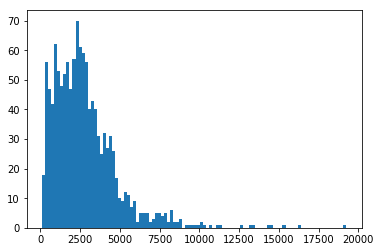

In [8]:
plt.hist(cat['dmode'],bins=100)
#plt.xlim(1300,1500)

In [6]:
Table(cat)

<Table length=1229>
     cluster         ra     dec      l    ...    X       Y       Z      Rgc  
      str17       float32 float32 float32 ... float32 float32 float32 float32
----------------- ------- ------- ------- ... ------- ------- ------- -------
ASCC_10             51.87  34.981 155.723 ...  -583.3   263.1  -205.1  8927.2
ASCC_101          288.399  36.369  68.028 ...   145.6   360.9    79.9  8202.3
ASCC_105          295.548  27.366  62.825 ...   251.8   490.5    19.9  8103.0
ASCC_107          297.164  21.987  58.904 ...   453.5   751.9   -29.2  7922.3
ASCC_108          298.306  39.349  74.378 ...   309.0  1105.1   122.1  8106.7
ASCC_11            53.056  44.856 150.546 ...  -734.4   414.7  -137.0  9083.9
ASCC_110          300.742  33.528  70.411 ...   637.6  1791.6    45.7  7908.1
ASCC_111          302.891  37.515  74.714 ...   220.5   806.8    30.0  8159.5
ASCC_113          317.933  38.638  82.877 ...    68.8   550.3   -64.1  8289.5
ASCC_114           324.99  53.997  97.082 ...  -112.6   906.1    16.4  8501.0
              ...     ...     ...     ... ...     ...     ...     ...     ...
Turner_9          296.165  29.494  64.943 ...   714.9  1529.1    78.1  7776.9
Waterloo_1         64.682  52.863 151.279 ... -3607.1  1976.5   129.2 12109.5
Waterloo_7        111.532  -15.09 230.275 ... -2138.2 -2573.2    36.4 10789.5
Westerlund_1       251.76 -45.852 339.546 ...  3333.6 -1243.3   -24.9  5158.5
Westerlund_2       156.01 -57.758 284.272 ...  1037.3 -4077.8   -24.1  8364.1
vdBergh_1          99.275   3.078 208.556 ... -1590.2  -865.5   -56.3  9967.9
vdBergh_80         97.739  -9.625 219.247 ...  -725.6  -592.8  -146.6  9085.0
vdBergh_83        100.025 -27.189 236.448 ...  -503.5  -759.3  -232.7  8876.1
vdBergh_85        101.718    1.32 211.237 ... -1470.3  -891.7   -12.4  9850.8
vdBergh_92        106.038 -11.475 224.587 ...  -817.2  -805.6   -48.6  9192.6

In [6]:

#cat = Table(cat)
#cat.remove_row(523)

#NGCmask = np.zeros(len(cat),dtype=bool)
#for i in range(len(cat)):
#    if 'NGC' in cat['Name'][i]:
#        NGCmask[i] = True
#NGCcat = cat[NGCmask]

#agemask = 10**(cat['logt'])/1e9 > 1
#agemask = cat['logt'] > 8.75

###cat = cat[agemask]
#cat = cat

#distmask = (cat['d'] > 750) & (cat['d'] < 800)
distmask = cat['dmode'] < 1500
#distmask = cat['Cluster'] == 'NGC_2516'
###cat = cat[distmask]
cat = cat[distmask]

coords = SkyCoord(cat['ra'], cat['dec'],unit=[u.deg,u.deg])

#coordmask = np.zeros(len(coords),dtype=bool)
#for i in range(len(coords)):
#    tbl = Tesscut.get_sectors(coords[i])
#    if len(tbl) != 0:
#        coordmask[i] = True
        
#tesscat = cat[coordmask]

goodclusters = np.zeros(len(cat),dtype=bool)
goodclusters_cdips = np.zeros(len(cat),dtype=bool)

numsecs = np.zeros(len(cat))
for i in range(len(cat)):
#for i in range(210,215):
    print('============')
    cra = cat['ra'][i]
    if cra < 0:
        cra = 360 + cra
    #cra *= u.deg
    #cra = cra.to(u.deg).value
    cdec = cat['dec'][i] 
    #mwsc = cat['MWSC'][i]
    name = cat['cluster'][i]
    outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = tess_stars2px_function_entry(name,cra,cdec)
    if -1 in outSec:
        print(np.str(name)+' not observed by TESS')
        #print('---')
    else:
        if (6 in outSec) or (7 in outSec) or (8 in outSec) or (9 in outSec) or (10 in outSec) or (11 in outSec):
            print('CDIPS')
            print(np.str(name) + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            goodclusters_cdips[i] = True
            goodclusters[i] = True
            numsecs[i] = len(outSec)
            
        #elif (len(outSec) > 1) and cat[i]['dmode'] < 1000:
        elif cat[i]['dmode'] < 1000:
            goodclusters[i] = True
            #print(np.str(name)+' observed in multiple sectors')
            numsecs[i] = len(outSec)
            print(np.str(name) + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            
        elif cat[i]['dmode'] > 1000:
            print('Cluster too distant.')

            #for i in range(len(outSec)):
            #    if outColPix[i] < 100+45 or outRowPix[i] < 100 or outColPix[i] > 2092-100 or outRowPix[i] > 2048-100:
            #        print(np.str(name) + '0' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
                    #goodclusters[i] = False
                        #print('---')
            #    else:
            #        print(np.str(name) +'1' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
        #elif (len(outSec) == 1) and cat[i]['dmode'] < 1000:
        #    numsecs[i] = 1
        #    print(np.str(name) + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))

            #if outColPix < 100+45 or outRowPix < 100 or outColPix > 2092-100 or outRowPix > 2048-100:
            #    print(np.str(name) +'0' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            #    goodclusters[i] = False
            #print('---')
            #else:
            #    print(np.str(name) +'1' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            #    #print('---')

tesscat = cat[goodclusters]
goodsecs = numsecs[goodclusters]
goodclusters_cdips = goodclusters_cdips[goodclusters]


#tesscat_cdips = cat[goodclusters_cdips]
#goodsecs_cdips = numsecs[goodclusters_cdips]

Tcat = Table(tesscat)
#Tcat_cdips = Table(tesscat_cdips)
Tcat.sort(keys='dmode')
#Tcat_cdips.sort(keys='dmode')
###




ASCC_10[18][990.14177034] [1712.46245013]
ASCC_101[14][878.80450793] [479.40169458]
ASCC_105[14][1735.91375566] [1901.94382262]
ASCC_107[14][1701.66906365] [944.93704623]
Cluster too distant.
ASCC_11[18][607.0161072] [849.34760026]
ASCC_111[14 15][1071.05267863 1508.39651887] [907.84546556 813.09981272]
ASCC_113[15][1804.95160333] [1692.98077229]
ASCC_114[17][101.03700481] [1675.13677308]
ASCC_115[16][2037.91725869] [608.29037319]
Cluster too distant.
ASCC_123[16 17][847.54767876 919.31427324] [914.75634907 325.60427497]
ASCC_127[17 18 24][592.45423369 583.39307712 483.44455606] [1150.51326146 1342.32426034 1851.58466411]
ASCC_128[17 24][479.9840375  266.88828358] [ 372.92295949 1113.11492611]
Cluster too distant.
CDIPS
ASCC_16[ 6 32][ 144.27868098 1489.93166933] [1423.48463574 1452.82581018]
CDIPS
ASCC_19[ 6 32][ 280.73034642 1558.14016194] [778.90240951 798.27137482]
CDIPS
ASCC_21[ 6 32][ 324.46022938 1701.20327062] [1754.82393477 1753.96934664]
ASCC_23[20][1949.45274249] [1090.18128

Cluster too distant.
FSR_0905 not observed by TESS
CDIPS
FSR_1117[ 6 33][1876.21089637  700.04086011] [435.14249082 449.45884305]
CDIPS
FSR_1297[ 7 34][1989.57480745 1121.98107269] [1193.37843584 1131.71894117]
Cluster too distant.
Ferrero_1[13][1145.63845618] [550.00802066]
CDIPS
Ferrero_11[ 6 33][ 151.07801801 1252.79354104] [1288.33455237 1273.60878962]
CDIPS
Gulliver_10[ 7  8 34 35][ 159.05156872  529.19316788  873.51924692 1251.51850255] [746.26542755 467.25261165 570.64163018 561.4396216 ]
Gulliver_11[19][842.60714323] [1491.1238182]
Cluster too distant.
CDIPS
Gulliver_2[ 7  8 34 35][ 201.72727287  661.02569696  942.06315933 1409.18657014] [519.31921463 277.64526081 352.84835261 385.3678259 ]
Gulliver_20 not observed by TESS
CDIPS
Gulliver_21[ 7 33 34][1367.24149557 1538.75551598  489.01006241] [1108.5773323  1010.85004923  981.38729731]
Gulliver_22 not observed by TESS
Cluster too distant.
Gulliver_28[14][924.54213581] [452.08404882]
Cluster too distant.
Cluster too distant.
CDI

CDIPS
NGC_2374[ 7 34][ 636.40757109 1706.62321163] [897.44629011 981.3534511 ]
CDIPS
NGC_2396[ 7 34][ 537.29552247 1632.39230559] [601.99385932 674.69232683]
CDIPS
NGC_2422[ 7 34][  78.26967639 1122.6250049 ] [ 998.32685401 1043.77227142]
CDIPS
NGC_2423[ 7 34][  76.07937298 1130.9223351 ] [886.39569848 930.9929679 ]
CDIPS
NGC_2428[ 7 34][2059.58857396  906.54803036] [1322.7604092  1356.29603363]
CDIPS
NGC_2447[ 7 34][ 530.82311619 1789.60802147] [1703.27673861 1708.07552717]
CDIPS
NGC_2448[ 7 34][ 547.72395581 1820.55037592] [1534.95230307 1542.22837519]
CDIPS
NGC_2451A[ 7  8 34][1194.3920813  1431.66784512 1869.89401821] [822.59782047 909.94100108 753.90114886]
CDIPS
NGC_2451B[ 7  8 34][1149.22730048 1416.89766689 1833.26336767] [759.0487582  834.34898242 686.31468183]
CDIPS
NGC_2477[ 7  8 34 35][ 872.12256501 1136.55342326 1555.28003076 1829.42882243] [816.26640814 784.90183941 713.48384031 946.65103094]
CDIPS
NGC_2482[7][951.91820516] [1709.90625034]
CDIPS
NGC_2516[ 1  4  7  8  9 10

Ruprecht_135 not observed by TESS
Ruprecht_145 not observed by TESS
Ruprecht_147 not observed by TESS
CDIPS
Ruprecht_151[ 7 34][1991.31564039  843.28325845] [1260.82143781 1289.05896606]
Ruprecht_161[36 37][687.79766368 494.33088526] [1851.61182291 1652.71765558]
CDIPS
Ruprecht_19[ 7 34][1909.93032832  982.04365528] [1882.97086871 1817.54672801]
Cluster too distant.
CDIPS
Ruprecht_91[10 36 37][2061.08565182  255.76506194  515.90400409] [565.64089508 844.92029619 585.0613552 ]
CDIPS
Ruprecht_98[10 11 37 38][ 102.96454941  583.31909444  744.24056113 1157.46663091] [683.78466767 397.72503691 520.48213327 469.50232828]
Skiff_J0619+18.5 not observed by TESS
Stephenson_1[14][1489.30006968] [99.73598866]
Stock_1[14][1415.04914562] [1609.20434467]
Stock_10[19][1203.84444802] [1518.91663339]
Stock_12[17 24][366.75351398 264.67649585] [881.44540256 584.71633642]
Stock_2[18][1791.88676956] [1967.07194289]
Stock_23[18 19][1645.49668428  371.96324703] [1968.6862518  1978.35001388]
Stock_4 not obser

In [57]:

#cat = Table(cat)
#cat.remove_row(523)

#NGCmask = np.zeros(len(cat),dtype=bool)
#for i in range(len(cat)):
#    if 'NGC' in cat['Name'][i]:
#        NGCmask[i] = True
#NGCcat = cat[NGCmask]

#agemask = 10**(cat['logt'])/1e9 > 1
#agemask = cat['logt'] > 8.75

###cat = cat[agemask]
#cat = cat

#distmask = (cat['d'] > 750) & (cat['d'] < 800)
distmask = allmerge_clusts['dmode'] < 1500
#distmask = cat['Cluster'] == 'NGC_2516'
###cat = cat[distmask]
cat = allmerge_clusts[distmask]
cat.reset_index(inplace=True)

coords = SkyCoord(cat['ra'], cat['dec'],unit=[u.deg,u.deg])

#coordmask = np.zeros(len(coords),dtype=bool)
#for i in range(len(coords)):
#    tbl = Tesscut.get_sectors(coords[i])
#    if len(tbl) != 0:
#        coordmask[i] = True
        
#tesscat = cat[coordmask]

goodclusters = np.zeros(len(cat),dtype=bool)
goodclusters_cdips = np.zeros(len(cat),dtype=bool)

numsecs = np.zeros(len(cat),dtype=int)
for i in range(len(cat)):
#for i in range(210,215):
    print('============')
    cra = cat['ra'][i]
    if cra < 0:
        cra = 360 + cra
    #cra *= u.deg
    #cra = cra.to(u.deg).value
    cdec = cat['dec'][i] 
    #mwsc = cat['MWSC'][i]
    name = cat['cluster'][i]
    outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = tess_stars2px_function_entry(name,cra,cdec)
    print(outSec)
    print(outSec <= 26)
    print(np.sum(outSec <= 26))
    if -1 in outSec:
        print(np.str(name)+' not observed by TESS')
        #print('---')
    else:
        if (6 in outSec) or (7 in outSec) or (8 in outSec) or (9 in outSec) or (10 in outSec) or (11 in outSec):
            print('CDIPS')
            print(np.str(name) + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            goodclusters_cdips[i] = True
            goodclusters[i] = True
            numsecs[i] =  np.sum(outSec <= 26)
            
        #elif (len(outSec) > 1) and cat[i]['dmode'] < 1000:
        elif cat['dmode'][i] < 1000:
            goodclusters[i] = True
            #print(np.str(name)+' observed in multiple sectors')
            ###numsecs[i] = len(outSec)
            numsecs[i] = np.sum(outSec <= 26)
            

            print(np.str(name) + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            
        elif cat['dmode'][i] > 1000:
            print('Cluster too distant.')

            #for i in range(len(outSec)):
            #    if outColPix[i] < 100+45 or outRowPix[i] < 100 or outColPix[i] > 2092-100 or outRowPix[i] > 2048-100:
            #        print(np.str(name) + '0' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
                    #goodclusters[i] = False
                        #print('---')
            #    else:
            #        print(np.str(name) +'1' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
        #elif (len(outSec) == 1) and cat[i]['dmode'] < 1000:
        #    numsecs[i] = 1
        #    print(np.str(name) + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))

            #if outColPix < 100+45 or outRowPix < 100 or outColPix > 2092-100 or outRowPix > 2048-100:
            #    print(np.str(name) +'0' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            #    goodclusters[i] = False
            #print('---')
            #else:
            #    print(np.str(name) +'1' + np.str(outSec) + np.str(outColPix) + ' ' + np.str(outRowPix))
            #    #print('---')

tesscat = cat[goodclusters]
goodsecs = numsecs[goodclusters]
goodclusters_cdips = goodclusters_cdips[goodclusters]


#tesscat_cdips = cat[goodclusters_cdips]
#goodsecs_cdips = numsecs[goodclusters_cdips]

Tcat_new = tesscat
#Tcat_cdips = Table(tesscat_cdips)
#Tcat_new.set_index('cluster',inplace=True)
#Tcat_new.sort_values('dmode',inplace=True)
#Tcat_cdips.sort(keys='dmode')
###




[18]
[ True]
1
ASCC_10[18][990.14178559] [1712.46296287]
[14]
[ True]
1
ASCC_101[14][878.80255868] [479.40254362]
[14]
[ True]
1
ASCC_105[14][1735.91512906] [1901.94335733]
[14]
[ True]
1
ASCC_107[14][1701.67068117] [944.93668397]
[14 15]
[ True  True]
2
Cluster too distant.
[18]
[ True]
1
ASCC_11[18][607.01532093] [849.34716132]
[14 15]
[ True  True]
2
ASCC_111[14 15][1071.05296614 1508.39672122] [907.84524712 813.0994921 ]
[15]
[ True]
1
ASCC_113[15][1804.95149558] [1692.98112845]
[17]
[ True]
1
ASCC_114[17][101.03765248] [1675.13691939]
[16]
[ True]
1
ASCC_115[16][2037.91759986] [608.28977638]
[19]
[ True]
1
Cluster too distant.
[16 17]
[ True  True]
2
ASCC_123[16 17][847.54795355 919.31393123] [914.75658105 325.60414999]
[17 18 24]
[ True  True  True]
3
ASCC_127[17 18 24][592.45418572 583.39315363 483.44454499] [1150.51355305 1342.32455061 1851.58437394]
[17 24]
[ True  True]
2
ASCC_128[17 24][479.98417107 266.88806067] [ 372.92333484 1113.11458371]
[19]
[ True]
1
Cluster too dista

[ 7 33 34]
[ True False False]
1
CDIPS
Collinder_135[ 7 33 34][2092.08378734  287.00357931  598.4484524 ] [ 799.46187549 1087.60287063  827.92312403]
[ 7 34]
[ True False]
1
CDIPS
Collinder_140[ 7 34][  50.32317878 1435.19976349] [145.70570459 103.78824693]
[ 8  9 35]
[ True  True False]
2
CDIPS
Collinder_197[ 8  9 35][1522.25806055 1893.97354411   88.0886857 ] [415.83628074 645.15931566 386.49251949]
[11 37 38]
[ True False False]
1
CDIPS
Collinder_258[11 37 38][1453.94482205 1553.92800217  800.31011843] [500.94069258 374.43372973 408.35251253]
[12 39]
[ True False]
1
Collinder_338[12 39][ 124.3293652 1104.4689008] [1521.3888001  1486.45757279]
[-1]
[ True]
1
Collinder_350 not observed by TESS
[-1]
[ True]
1
Collinder_359 not observed by TESS
[-1]
[ True]
1
Collinder_394 not observed by TESS
[14 15]
[ True  True]
2
Cluster too distant.
[18 19 25]
[ True  True  True]
3
Collinder_463[18 19 25][ 906.87560673  401.68798091 1719.26978382] [ 157.1176054   313.35040608 1366.8869412 ]
[6]
[ T

[-1]
[ True]
1
NGC_1342 not observed by TESS
[19]
[ True]
1
Cluster too distant.
[19]
[ True]
1
Cluster too distant.
[19]
[ True]
1
Cluster too distant.
[19]
[ True]
1
Cluster too distant.
[19]
[ True]
1
NGC_1545[19][936.41669534] [284.23976646]
[19]
[ True]
1
NGC_1579[19][953.76846238] [1322.37504086]
[19]
[ True]
1
NGC_1582[19][840.77491396] [1474.33234404]
[-1]
[ True]
1
NGC_1647 not observed by TESS
[ 5 32]
[ True False]
1
NGC_1662[ 5 32][1073.91853173 1982.93432702] [992.17236748 982.33341211]
[19]
[ True]
1
Cluster too distant.
[19]
[ True]
1
NGC_1708[19][1878.26549829] [25.98263976]
[-1]
[ True]
1
NGC_1750 not observed by TESS
[-1]
[ True]
1
NGC_1758 not observed by TESS
[17 18 24]
[ True  True  True]
3
Cluster too distant.
[ 1  2  3  4  6  7  8  9 10 11 12 13 27 28 29 30 31 32 33 34 36 37 38 39]
[ True  True  True  True  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False]
12
CDIPS
NGC_1901[ 1  2  3  4  6  7  8

[10 11 37]
[ True  True False]
2
CDIPS
NGC_3532[10 11 37][1613.3077404  2070.31152624   82.79811558] [451.39431941 743.00169753 429.71893074]
[10 36 37]
[ True False False]
1
CDIPS
NGC_3680[10 36 37][1485.73094412 1765.77155952  643.26569558] [2036.81236047 1917.67629972 1950.39889038]
[18 24]
[ True  True]
2
Cluster too distant.
[11 37 38]
[ True False False]
1
CDIPS
NGC_4609[11 37 38][1943.76675787 2045.19220667 1304.67838294] [423.67883243 138.48423947 375.03398911]
[11 38]
[ True False]
1
CDIPS
NGC_4852[11 38][1870.66229979 1185.65815697] [1122.7450716  1070.99848703]
[11 38]
[ True False]
1
CDIPS
NGC_5316[11 38][870.47883915 167.97530422] [1368.88230115 1408.51403765]
[11 38]
[ True False]
1
CDIPS
NGC_5460[11 38][1914.30299405  607.66336876] [564.53224399 576.14567332]
[11 38]
[ True False]
1
CDIPS
NGC_5593[11 38][1059.18015492 1860.47660736] [1442.60782688 1402.14331432]
[11 38]
[ True False]
1
CDIPS
NGC_5662[11 38][ 744.52789528 1537.46143971] [1675.02213929 1612.5447001 ]
[11 3

[-1]
[ True]
1
Skiff_J0619+18.5 not observed by TESS
[14]
[ True]
1
Stephenson_1[14][1489.29793226] [99.73638515]
[14]
[ True]
1
Stock_1[14][1415.04796929] [1609.20477262]
[19]
[ True]
1
Stock_10[19][1203.84423115] [1518.91692207]
[17 24]
[ True  True]
2
Stock_12[17 24][366.75347993 264.6763537 ] [881.44613908 584.71557149]
[18]
[ True]
1
Stock_2[18][1791.88651176] [1967.07183915]
[18 19]
[ True  True]
2
Stock_23[18 19][1645.49657472  371.9630131 ] [1968.68584163 1978.34965253]
[-1]
[ True]
1
Stock_4 not observed by TESS
[18 24 25]
[ True  True  True]
3
Stock_5[18 24 25][1627.09027717 2036.44500434 1096.96922655] [1124.22183281  338.01314541  182.47960878]
[18]
[ True]
1
Stock_7[18][1437.56617457] [1913.00082639]
[14]
[ True]
1
Teutsch_35[14][162.80855497] [868.24669434]
[ 8 35]
[ True False]
1
CDIPS
Teutsch_38[ 8 35][ 438.86277059 1813.69511349] [153.33034705 156.26996929]
[ 8  9 35]
[ True  True False]
2
CDIPS
Trumpler_10[ 8  9 35][1351.0987956  1653.79830295 2060.84452249] [590.2286

In [58]:
Tcat_new['pri_mis_secs'] = goodsecs*27

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
Tcat_new.loc['NGC_2516']

KeyError: 'the label [NGC_2516] is not in the [index]'

In [43]:
np.where(goodsecs == 7)

(array([148]),)

In [49]:
#Tcat_new.sort_values('dmode',inplace=True)


In [517]:
Tcat_new.drop('index',axis=1,inplace=True)

/anaconda3/envs/astroconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [519]:
#Tcat_new.to_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_tess_cdips.csv')

In [520]:
Tcat = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_tess_cdips.csv')

In [615]:
len(Tcat),len(Kcat)

(232, 47)

In [586]:
sdss_dr16 = fits.open('/Users/bhealy/Downloads/allStarLite-r12-l33.fits')

In [110]:
p_e_stream = Table(fits.open('/Users/bhealy/Downloads/J_A+A_622_L13_stream.dat.fits')[1].data).to_pandas()
r = ascii.get_reader(ascii.Cds, readme='/Users/bhealy/Downloads/comaber_ReadMe')
c_b_neigh = r.read("/Users/bhealy/Downloads/coma_nei.dat")
c_b_clust = r.read("/Users/bhealy/Downloads/coma_ber.dat")

In [112]:
c_b_neigh.rename_column('Source','source_id')
c_b_clust.rename_column('Source','source_id')

In [116]:
pd.merge(SDSS_GALAH_merge[SDSS_GALAH_merge['vsini']>5],c_b_neigh.to_pandas(),on='source_id')

source_id           APOGEE_ID TELESCOPE       FIELD       J  \
0   1562056417028500352  2M13381497+5439278    apo25m      110+60  12.691   
1   1561779889854217856  2M13430781+5401334    apo25m  106+63_MGA   8.537   
2   1560938316782309248  2M13462649+5304550    apo25m  106+63_MGA  11.383   
3   1560767995559564032  2M13495831+5314471    apo25m  102+61_MGA  11.505   
4   1560767995559564032  2M13495831+5314471    apo25m  106+63_MGA  11.505   
5   1512596638799969408  2M13543654+5200404    apo25m  102+61_MGA  11.505   
6   1509561299512624000  2M14004720+4739552    apo25m  092+65_MGA  10.978   
7   1505107762024006144  2M14154122+4507210    apo25m  086+66_MGA  11.635   
8   1604815389143862784  2M14205142+5137523    apo25m  094+61_MGA  10.411   
9   1610713483049385600  2M14353517+5655561    apo25m  099+56_btx  10.317   
10  1605888688587491968  2M14402381+5236078    apo25m  091+56_MGA  12.049   
11  1593570584943987072  2M14530483+5115401    apo25m  086+57_MGA   8.797   
12  1597431279506511232  2M15493364+5426188    apo25m  086+47_MGA  11.304   

    J_ERR       H  H_ERR       K  K_ERR  ...        pmDE       RV_y       X  \
0   0.022  12.162  0.021  11.910  0.024  ...   -5.218270        NaN -13.832   
1   0.029   8.230  0.042   8.186  0.033  ...   -3.766062  -5.544345 -13.033   
2   0.020  10.809  0.017  10.564  0.022  ...   -1.080219        NaN -13.160   
3   0.018  10.861  0.017  10.651  0.021  ...   -4.735220        NaN -10.931   
4   0.018  10.861  0.017  10.651  0.021  ...   -4.735220        NaN -10.931   
5   0.021  10.872  0.019  10.637  0.016  ...   -4.215442        NaN  -8.955   
6   0.021  10.343  0.021  10.130  0.016  ...   -5.593666  -2.771014  -2.745   
7   0.021  11.029  0.019  10.761  0.019  ...   -4.869109        NaN   3.025   
8   0.020   9.816  0.023   9.671  0.015  ...   -4.242950  -7.061138  -3.720   
9   0.026   9.748  0.032   9.587  0.019  ...   -2.101639  -5.543594  -8.775   
10  0.018  11.490  0.019  11.239  0.022  ...   -2.309506        NaN  -1.707   
11  0.027   8.485  0.023   8.430  0.019  ...   -1.626554  -6.397729   2.225   
12  0.020  10.657  0.015  10.496  0.018  ...   -2.573940 -10.757223   6.022   

         Y       Z    vRA    vDE     vR     vPHI     vZ  
0   40.518  77.787 -8.027 -2.202    NaN      NaN    NaN  
1   42.720  82.161 -8.611 -1.674 -5.222  223.379  4.828  
2   48.566  95.062 -8.068 -0.552    NaN      NaN    NaN  
3   42.799  82.094 -8.111 -2.098    NaN      NaN    NaN  
4   42.799  82.094 -8.111 -2.098    NaN      NaN    NaN  
5   43.211  84.539 -8.047 -1.911    NaN      NaN    NaN  
6   38.173  83.582 -7.795 -2.444 -6.168  224.607  7.587  
7   37.830  82.839 -7.911 -2.109    NaN      NaN    NaN  
8   47.294  83.090 -7.758 -1.930 -6.227  222.658  4.446  
9   60.175  86.621 -7.609 -1.058 -5.842  223.634  6.132  
10  53.390  83.658 -7.523 -1.090    NaN      NaN    NaN  
11  54.838  83.608 -7.008 -0.773 -5.909  223.753  5.303  
12  78.437  86.529 -7.038 -1.432 -6.768  220.004  4.034  

[13 rows x 316 columns]

In [103]:
p_e_stream['source_id'] = [np.int(x[9:]) for x in p_e_stream['DR2Name']]

In [105]:
pd.merge(SDSS_GALAH_merge,p_e_stream,on='source_id')['vsini']

0     12.735031
1     37.264908
2      6.530103
3      6.526946
4     95.962158
5     39.930065
6      6.336216
7      6.131263
8      6.033926
9      8.523148
10     8.559926
11     8.587959
12     4.271889
13    10.444798
14    32.824638
15    95.984261
16     6.473959
17     8.034891
18     8.437038
19    10.225863
20    48.473015
21     7.469202
22     9.296712
Name: vsini, dtype: float64

In [588]:
SDSS_DR16 = Table(sdss_dr16[1].data)

In [589]:
SDSS_DR16_pd = SDSS_DR16.to_pandas()

ValueError: Cannot convert a table with multidimensional columns to a pandas DataFrame. Offending columns are: ['NINST', 'STABLERV_CHI2', 'STABLERV_RCHI2', 'CHI2_THRESHOLD', 'STABLERV_CHI2_PROB', 'PARAMFLAG', 'X_H', 'X_H_ERR', 'X_M', 'X_M_ERR', 'ELEM_CHI2']
One can filter out such columns using:
names = [name for name in tbl.colnames if len(tbl[name].shape) <= 1]
tbl[names].to_pandas(...)

In [590]:
names = [name for name in SDSS_DR16.colnames if len(SDSS_DR16[name].shape) <= 1]
SDSS_DR16_pd= SDSS_DR16[names].to_pandas()


In [591]:
SDSS_DR16_pd.keys()

Index(['APOGEE_ID', 'TELESCOPE', 'FIELD', 'J', 'J_ERR', 'H', 'H_ERR', 'K',
       'K_ERR', 'RA',
       ...
       'GAIA_PHOT_G_MEAN_MAG', 'GAIA_PHOT_BP_MEAN_MAG',
       'GAIA_PHOT_RP_MEAN_MAG', 'GAIA_RADIAL_VELOCITY',
       'GAIA_RADIAL_VELOCITY_ERROR', 'GAIA_R_EST', 'GAIA_R_LO', 'GAIA_R_HI',
       'TEFF_SPEC', 'LOGG_SPEC'],
      dtype='object', length=197)

In [592]:
SDSS_DR16_pd.to_csv('/Users/bhealy/Downloads/SDSS_DR16.csv')

In [543]:
#galah_dr2=fits.open('/Users/bhealy/Downloads/GALAH_DR2.1_catalog.fits')
#GALAH_DR2 = Table(galah_dr2[1].data)
GALAH_DR2_pd = GALAH_DR2.to_pandas()

In [545]:
GALAH_DR2_pd.to_csv('/Users/bhealy/Downloads/GALAH_DR2.csv')

In [13]:
#Tcat.set_index('cluster',inplace=True)

In [14]:
#Tcat.to_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_tess_cdips.csv')

In [47]:
SDSS_GALAH_merge.to_csv('/Users/bhealy/Downloads/SDSS_GALAH_merge.csv')

In [2]:
#BEST PLACE TO START
Tcat = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_tess_cdips.csv')
Kcat=pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_kepler_k2.csv')
#SDSS_DR16_pd = pd.read_csv('/Users/bhealy/Downloads/SDSS_DR16.csv')
#GALAH_DR2_pd = pd.read_csv('/Users/bhealy/Downloads/GALAH_DR2.csv')
obsmerge_mems=pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/obsclusters_gaia_mems_T_K.csv')
ADAP_CG_clusters = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_CG_clusters_ages_expand.csv')
#SDSS_GALAH_merge = pd.read_csv('/Users/bhealy/Downloads/SDSS_GALAH_merge.csv')
ADAP_all_targets = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_final.csv')#pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_age_days.csv')#('/Users/bhealy/Documents/PhD_Thesis/Catalogs/all_ADAP_clusters.csv')
###Pleiades_rotation = Table(fits.open('/Users/bhealy/Downloads/J_AJ_152_113_table2.dat.fits')[1].data).to_pandas()
###pleiades_mergetbl = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Pleiades_merged_Gaia_APO.csv')
#jefftbl1 = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/jeffries_GES_gaia_targets.csv')
#gv_merged = pd.read_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/gamma_velorum_gaia_targets.csv')

/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (27,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
praesepe=Kcat[Kcat['cluster']=='NGC_2632']#['r50']

In [9]:
np.round(praesepe['r50']*np.pi/180*praesepe['dmode'],1)

2    3.2
dtype: float64

In [98]:
obsmerge_mems.set_index('cluster')

source_id          ra        dec          l          b  \
cluster                                                                       
Alessi_12  1842846157478382720  312.983987  24.465287  69.164316 -12.575191   
Alessi_12  1842869758322853504  313.054543  24.509598  69.240582 -12.598562   
Alessi_12  1842825438553054848  312.882563  24.286501  68.961608 -12.612092   
Alessi_12  1842922436095493632  312.904310  24.664775  69.279849 -12.395405   
Alessi_12  1842904397232875008  312.706166  24.739461  69.227055 -12.207464   
Alessi_12  1842910375828914688  312.259152  24.633036  68.886922 -11.951206   
Alessi_12  1842901919036889856  312.635884  24.644538  69.110273 -12.215200   
Alessi_12  1842891542396658688  312.455058  24.403707  68.812366 -12.232359   
Alessi_12  1842924046710210560  312.922614  24.745196  69.355250 -12.359075   
Alessi_12  1842941364018688512  312.680872  24.895036  69.338327 -12.093895   
Alessi_12  1842941849349620608  312.696109  24.919731  69.366941 -12.089654   
Alessi_12  1843107665153991296  311.035118  23.566703  67.329108 -11.704952   
Alessi_12  1843102274970604288  310.848489  23.518740  67.185434 -11.596448   
Alessi_12  1843134298246673408  311.171716  23.739574  67.547013 -11.701567   
Alessi_12  1843129041207006336  310.694700  23.755336  67.293388 -11.342217   
Alessi_12  1843119283041272704  310.676612  23.650091  67.197132 -11.391670   
Alessi_12  1843121035388021248  310.529996  23.648558  67.114306 -11.284690   
Alessi_12  1843127426299167360  310.942377  23.799376  67.467545 -11.497685   
Alessi_12  1843131583827633792  310.799735  23.865260  67.441843 -11.353701   
Alessi_12  1843123887246329856  310.569387  23.751879  67.220854 -11.252172   
Alessi_12  1843128972487520768  310.700056  23.743414  67.286610 -11.353263   
Alessi_12  1843135084223285120  311.129978  23.761879  67.541846 -11.657619   
Alessi_12  1843113059630559872  310.858910  23.664762  67.310805 -11.516908   
Alessi_12  1843136119312789632  311.271587  23.791545  67.645496 -11.743480   
Alessi_12  1843136222392003456  311.287966  23.801911  67.663155 -11.749234   
Alessi_12  1843142338425433728  311.318139  23.846382  67.716403 -11.744572   
Alessi_12  1843123470630972928  310.573658  23.712575  67.191031 -11.278718   
Alessi_12  1843136256751740800  311.298510  23.800274  67.667739 -11.757930   
Alessi_12  1843124402642399360  310.601678  23.779807  67.261674 -11.259276   
Alessi_12  1843114266519274880  311.038583  23.725345  67.460805 -11.612531   
...                        ...         ...        ...        ...        ...   
Hyades       53725750202606208   62.167860  23.557130        NaN        NaN   
Hyades      144171233106399104   67.815880  20.133000        NaN        NaN   
Hyades     3302846072717868416   58.842370   9.788350        NaN        NaN   
Hyades     3410154456217987584   70.712630  19.487010        NaN        NaN   
Hyades     3410118477275889024   71.511720  19.468170        NaN        NaN   
Hyades     3410076150374417408   71.028300  19.035350        NaN        NaN   
Hyades       42716408993806080   53.144340  16.153260        NaN        NaN   
Hyades       38354680725946240   58.756580  12.485540        NaN        NaN   
Hyades       38329666836450304   59.560420  12.627970        NaN        NaN   
Hyades       40470720915966208   58.722350  16.315520        NaN        NaN   
Hyades     3312025001943976064   65.802520  15.712790        NaN        NaN   
Hyades     3312052249216467328   64.948870  15.627540        NaN        NaN   
Hyades     3312281634829711488   64.554610  16.098030        NaN        NaN   
Hyades     3312281669189449472   64.580830  16.088230        NaN        NaN   
Hyades     3312197934506930944   63.890910  15.706170        NaN        NaN   
Hyades     3312025586058376704   65.855890  15.763010        NaN        NaN   
Hyades     3312136499294830848   63.943370  15.400600        NaN        NaN   
Hyades       38670343642226816   58.444380  13.391930        NaN       

In [113]:
#obsmerge_mems.reset_index(inplace=True)
obsmerge_mems.set_index('cluster',inplace=True)

In [115]:
obsmerge_mems.loc['Hyades','proba'] = 0.7

In [116]:
obsmerge_mems.loc['ComaBer','proba']=0.7

In [117]:

#obsmerge_mems.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/obsclusters_gaia_mems_T_K.csv')

In [122]:
pd.merge(obsmerge_mems.loc['ComaBer'],SDSS_GALAH_merge[SDSS_GALAH_merge['vsini']>5],on='source_id')

index            source_id       ra_x     dec_x   l   b  parallax  \
0   66181  3960130997064687616  186.53526  24.65867 NaN NaN       NaN   
1   66228  4008433608024885632  185.78494  25.85134 NaN NaN       NaN   
2   66235  4008227724472564864  185.36136  24.99699 NaN NaN       NaN   
3   66246  1464103812327049984  194.40355  28.97907 NaN NaN       NaN   
4   66246  1464103812327049984  194.40355  28.97907 NaN NaN       NaN   
5   66246  1464103812327049984  194.40355  28.97907 NaN NaN       NaN   
6   66246  1464103812327049984  194.40355  28.97907 NaN NaN       NaN   
7   66246  1464103812327049984  194.40355  28.97907 NaN NaN       NaN   
8   66246  1464103812327049984  194.40355  28.97907 NaN NaN       NaN   
9   66249  4009508689878952832  185.41950  27.13080 NaN NaN       NaN   
10  66251  4009518100151157248  185.48394  27.30947 NaN NaN       NaN   
11  66274  4008744254419270400  185.92082  26.97990 NaN NaN       NaN   
12  66275  4008681513537028480  185.92422  26.60146 NaN NaN       NaN   
13  66277  4008444912378815232  186.02383  26.12855 NaN NaN       NaN   
14  66278  4008487999490702720  185.06027  25.43534 NaN NaN       NaN   
15  66281  4008553489152025856  185.31501  26.15386 NaN NaN       NaN   
16  66282  4008790021590804736  186.71255  26.26713 NaN NaN       NaN   
17  66283  4008706733584941312  185.45422  26.54906 NaN NaN       NaN   
18  66288  3961802632696061056  192.35073  27.16605 NaN NaN       NaN   
19  66296  4008867674599508992  186.77603  26.84566 NaN NaN       NaN   
20  66298  4009058199348854656  186.47587  26.86071 NaN NaN       NaN   
21  66299  4009049575054518400  186.26095  26.71058 NaN NaN       NaN   
22  66300  4009051048227419520  186.46640  26.77663 NaN NaN       NaN   
23  66302  4008820429959330304  187.23505  26.54924 NaN NaN       NaN   
24  66303  4009109979474585600  186.66774  27.31203 NaN NaN       NaN   

    parallax_error  pmra  pmra_error  ...    ba_fe  e_ba_fe  flag_ba_fe  \
0              NaN   NaN         NaN  ...      NaN      NaN         NaN   
1              NaN   NaN         NaN  ...      NaN      NaN         NaN   
2              NaN   NaN         NaN  ...      NaN      NaN         NaN   
3              NaN   NaN         NaN  ...      NaN      NaN         NaN   
4              NaN   NaN         NaN  ...      NaN      NaN         NaN   
5              NaN   NaN         NaN  ...      NaN      NaN         NaN   
6              NaN   NaN         NaN  ...      NaN      NaN         NaN   
7              NaN   NaN         NaN  ...      NaN      NaN         NaN   
8              NaN   NaN         NaN  ...      NaN      NaN         NaN   
9              NaN   NaN         NaN  ...      NaN      NaN         NaN   
10             NaN   NaN         NaN  ...      NaN      NaN         NaN   
11             NaN   NaN         NaN  ...      NaN      NaN         NaN   
12             NaN   NaN         NaN  ...      NaN      NaN         NaN   
13             NaN   NaN         NaN  ...      NaN      NaN         NaN   
14             NaN   NaN         NaN  ...      NaN      NaN         NaN   
15             NaN   NaN         NaN  ...      NaN      NaN         NaN   
16             NaN   NaN         NaN  ...      NaN      NaN         NaN   
17             NaN   NaN         NaN  ...      NaN      NaN         NaN   
18             NaN   NaN         NaN  ...      NaN      NaN         NaN   
19             NaN   NaN         NaN  ...      NaN      NaN         NaN   
20             NaN   NaN         NaN  ...      NaN      NaN         NaN   
21             NaN   NaN         NaN  ...      NaN      NaN         NaN   
22             NaN   NaN         NaN  ...      NaN      NaN         NaN   
23             NaN   NaN         NaN  ...      NaN      NaN         NaN   
24             NaN   NaN         NaN  ...      NaN      NaN         NaN   

    la_fe  e_la_fe  flag_la_fe  eu_fe  e_eu_fe  flag_eu_fe  GALAH  
0     NaN      NaN         NaN    NaN      NaN         NaN    NaN  
1     NaN      NaN

In [118]:
ADAP_CG_clusters['age'] = np.array([140,150,4200,10,450,6,140,40,60,3,3,20,10,150,-1,40,50])

In [168]:
#ADAP_CG_clusters.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_CG_clusters_ages_expand.csv')

In [4]:
plot_instance = MWPlot(mode='face-on', center=(0, 0)*u.kpc, radius=2*u.kpc,
                       unit=u.pc, coord='galactic', annotation=True, rot180=False, grayscale=False)


In [5]:
plot_instance.s = 200.0


In [11]:
ADAP_CG_clusters['Z']

cluster
Melotte_22      -54.3
NGC_2168         33.6
NGC_2682        454.3
Collinder_69    -83.8
NGC_2548        201.4
IC_348          -98.4
NGC_2516       -111.8
NGC_2547        -57.9
Melotte_20      -19.6
L_1641S        -140.2
NGC_2264         27.3
Pozzo_1         -46.4
ASCC_16        -109.9
Blanco_1       -231.7
Gulliver_6     -129.9
ASCC_19        -119.0
IC_2391         -17.7
Name: Z, dtype: float64

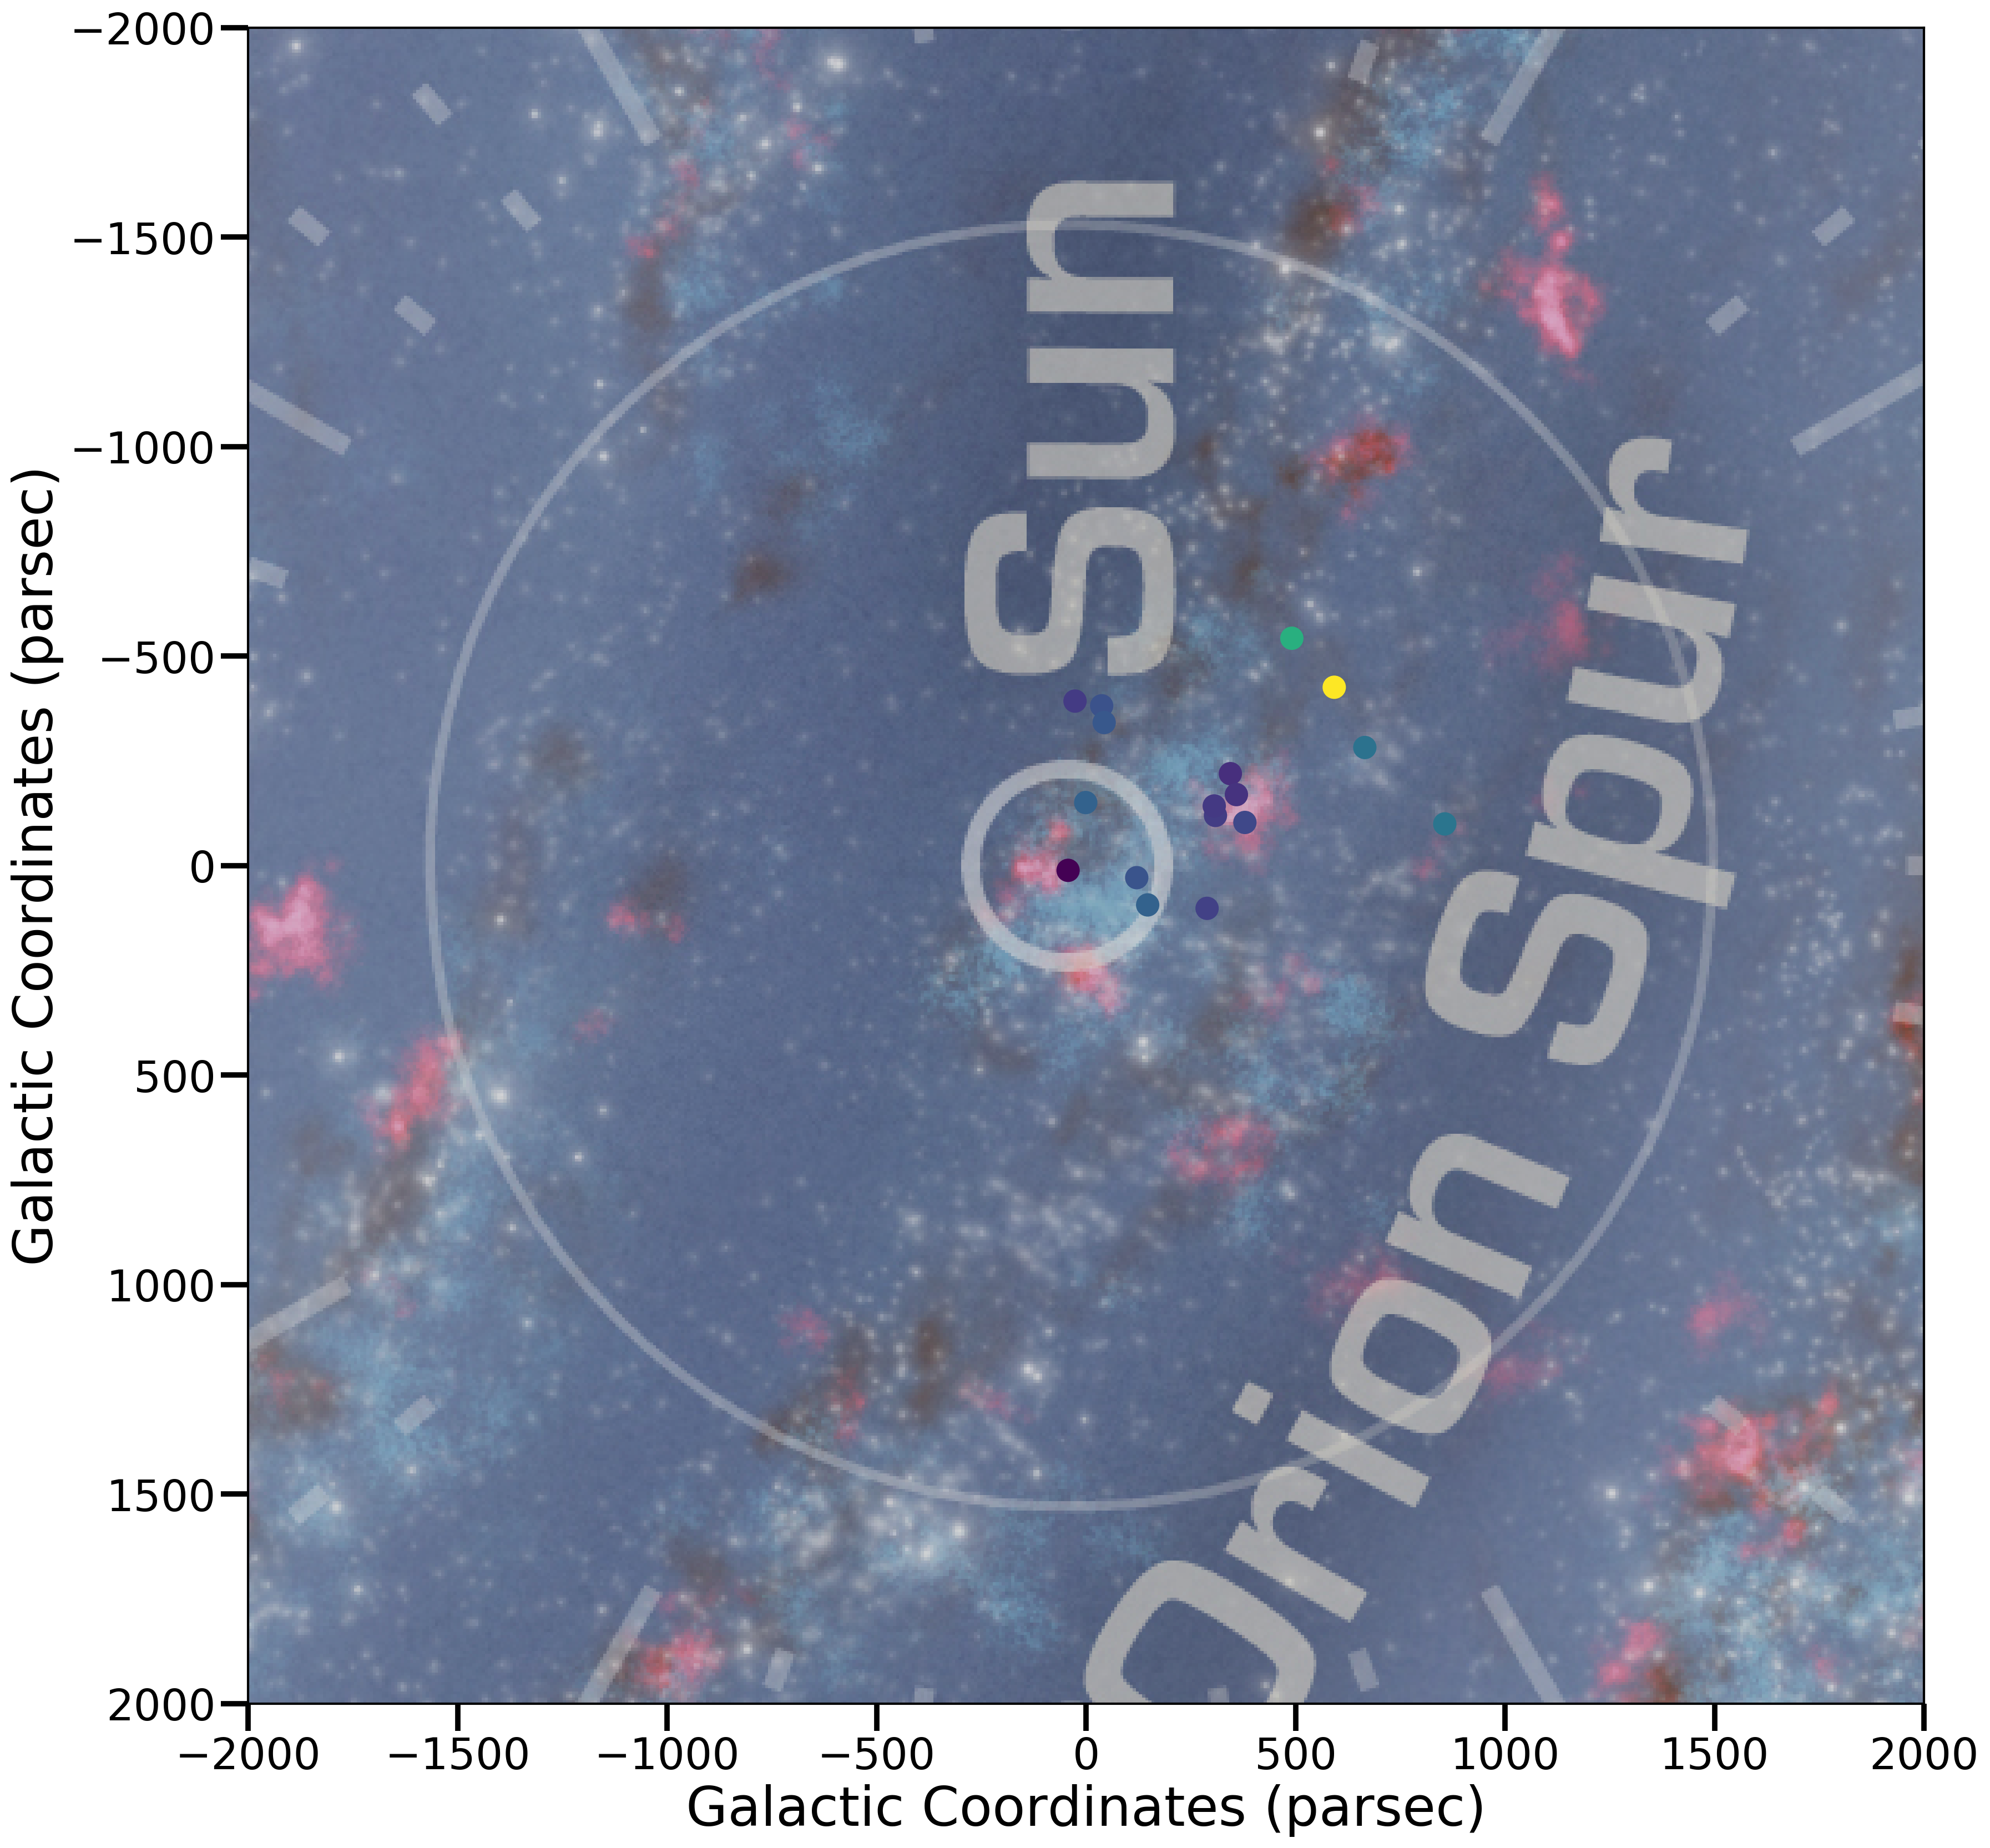

In [7]:
plot_instance.mw_scatter(-1*np.array(ADAP_CG_clusters['X'].data)*u.pc, ADAP_CG_clusters['Y'].data*u.pc,ADAP_CG_clusters['Z'].data*u.pc,label='z')

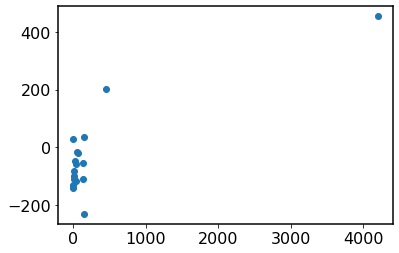

In [192]:
plt.scatter(ADAP_CG_clusters['age'],ADAP_CG_clusters['Z'])

In [35]:
ADAP_all_targets.loc[:,'r50'] = np.round(ADAP_CG_clusters.loc[:,'r50'].values * np.pi/180 * ADAP_CG_clusters.loc[:,'dmode'].values,2)




In [44]:
ADAP_CG_clusters

cluster       ra     dec        l       b    r50  nbstars    pmra  \
0     Melotte_22   56.601  24.114  166.462 -23.614  1.274      992  20.077   
1       NGC_2168   92.272  24.336  186.609   2.230  0.319     1325   2.308   
2       NGC_2682  132.846  11.814  215.691  31.921  0.166      691 -10.986   
3   Collinder_69   83.792   9.813  195.162 -12.050  0.989      669   1.194   
4       NGC_2548  123.412  -5.726  227.842  15.390  0.369      479  -1.313   
5         IC_348   56.132  32.159  160.486 -17.810  0.096      144   4.483   
6       NGC_2516  119.527 -60.800  273.861 -15.873  0.496      798  -4.748   
7       NGC_2547  122.525 -49.198  264.446  -8.595  0.283      233  -8.609   
8     Melotte_20   51.617  48.975  147.357  -6.404  2.027      764  22.864   
9        L_1641S   85.675  -8.133  212.480 -18.954  0.143      101   0.013   
10      NGC_2264  100.217   9.877  202.941   2.166  0.072      170  -1.690   
11       Pozzo_1  122.374 -47.335  262.798  -7.691  0.625      390  -6.516   
12       ASCC_16   81.198   1.655  201.139 -18.373  0.376      226   1.355   
13      Blanco_1    0.853 -29.958   15.090 -79.086  0.699      381  18.739   
14    Gulliver_6   83.278  -1.652  205.246 -18.138  0.517      343  -0.007   
15       ASCC_19   81.982  -1.987  204.914 -19.438  0.605      188   1.152   
16       IC_2391  130.292 -52.991  270.386  -6.737  0.814      224 -24.644   

    sigpmra  uncertpmra  ...   dmode    d84    d95  dmodePLUS01  dmodeMINUS01  \
0     1.062       0.035  ...   135.6  135.6  135.7        133.8         137.5   
1     0.239       0.007  ...   862.4  863.2  863.8        793.9         943.7   
2     0.193       0.008  ...   859.1  860.1  860.7        791.2         939.9   
3     0.550       0.021  ...   401.5  401.9  402.1        386.0         418.3   
4     0.194       0.011  ...   758.8  759.9  760.8        705.3         821.1   
5     0.593       0.052  ...   321.7  322.7  323.4        311.7         332.4   
6     0.441       0.017  ...   408.9  409.0  409.1        392.8         426.3   
7     0.283       0.020  ...   387.2  387.5  387.7        372.8         402.8   
8     1.127       0.048  ...   175.5  175.6  175.6        172.5         178.7   
9     0.346       0.036  ...   431.6  432.8  433.7        413.8         451.1   
10    0.508       0.031  ...   722.9  725.0  726.4        674.2         779.2   
11    0.270       0.015  ...   346.9  347.2  347.3        335.3         359.4   
12    0.265       0.019  ...   348.8  349.2  349.5        337.0         361.4   
13    0.432       0.023  ...   235.9  236.1  236.2        230.5         241.6   
14    0.390       0.022  ...   417.3  417.9  418.2        400.6         435.5   
15    0.252       0.019  ...   357.6  358.0  358.3        345.2         370.9   
16    0.883       0.056  ...   151.3  151.3  151.4        149.0         153.6   

        X      Y      Z     Rgc   age  
0  -120.8   29.1  -54.3  8460.8   140  
1  -856.0  -99.2   33.6  9196.5   150  
2  -592.2 -425.4  454.3  8942.4  4200  
3  -379.0 -102.7  -83.8  8719.6    10  
4  -491.0 -542.3  201.4  8847.7   450  
5  -288.7  102.3  -98.4  8629.3     6  
6    26.5 -392.4 -111.8  8322.8   140  
7   -37.1 -381.1  -57.9  8385.7    40  
8  -146.9   94.1  -19.6  8487.4    60  
9  -344.3 -219.2 -140.2  8687.1     3  
10 -665.2 -281.6   27.3  9009.6     3  
11  -43.1 -341.1  -46.4  8390.0    20  
12 -308.7 -119.4 -109.9  8649.6    10  
13   43.1   11.6 -231.7  8296.9   150  
14 -358.7 -169.2 -129.9  8700.4    -1  
15 -305.8 -142.1 -119.0  8647.0    40  
16    1.0 -150.2  -17.7  8340.3    50  

[17 rows x 28 columns]

In [51]:
mergetbl=pd.merge(ADAP_all_targets,ADAP_CG_clusters.loc[:,['cluster','r50']],on='cluster')
mergetbl

cluster  expected_inclinations   age  dmode ground_survey  \
0     Melotte_22                    129   140  135.6           APO   
1       NGC_2168                     60   150  862.4        2010AJ   
2       NGC_2682                     47  4200  859.1           APO   
3     Melotte_20                     46    60  175.5           APO   
4   Collinder_69                     42    10  401.5           APO   
5       NGC_2548                     41   450  758.8        2020AJ   
6         IC_348                     33     6  321.7           APO   
7       NGC_2516                     32   140  408.9           GES   
8       NGC_2547                     20    40  387.2           GES   
9        L_1641S                     18     3  431.6           APO   
10      NGC_2264                     16     3  722.9           GES   
11       Pozzo_1                     14    20  346.9           GES   
12       ASCC_16                     13    10  348.8           APO   
13    Gulliver_6                     13    -1  417.3           APO   
14      Blanco_1                     13   150  235.9        2009AA   
15       ASCC_19                     11    40  357.6           APO   
16       IC_2391                     11    50  151.3        2007AA   

   space_survey  pri_mis_secs    r50  
0            K2            72  1.274  
1            K2            78  0.319  
2            K2           209  0.166  
3          TESS            27  2.027  
4          TESS            27  0.989  
5          TESS            27  0.369  
6          TESS            27  0.096  
7          TESS           189  0.496  
8          TESS            54  0.283  
9          TESS            27  0.143  
10         TESS            27  0.072  
11         TESS            81  0.625  
12         TESS            27  0.376  
13         TESS            27  0.517  
14         TESS            27  0.699  
15         TESS            27  0.605  
16         TESS            54  0.814

In [62]:
ADAP_all_targets['r50'] = np.round(mergetbl.loc[:,'r50']*np.pi/180*mergetbl.loc[:,'dmode'],1)

In [72]:
ADAP_all_targets['dmode'] = [np.int(np.round(x,0)) for x in ADAP_all_targets['dmode']]

In [81]:
ADAP_all_targets[['cluster','expected_inclinations','age','dmode','r50','ground_survey','space_survey','pri_mis_secs']].set_index('cluster').to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_final.csv')

ADAP_all_targets[['cluster','expected_inclinations','age','dmode','r50','ground_survey','space_survey','pri_mis_secs']].set_index('cluster').to_latex('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_final.tex')





In [82]:
ADAP_all_targets

cluster  expected_inclinations   age  dmode ground_survey  \
0     Melotte_22                    129   140    136           APO   
1       NGC_2168                     60   150    862        2010AJ   
2       NGC_2682                     47  4200    859           APO   
3     Melotte_20                     46    60    176           APO   
4   Collinder_69                     42    10    402           APO   
5       NGC_2548                     41   450    759        2020AJ   
6         IC_348                     33     6    322           APO   
7       NGC_2516                     32   140    409           GES   
8       NGC_2547                     20    40    387           GES   
9        L_1641S                     18     3    432           APO   
10      NGC_2264                     16     3    723           GES   
11       Pozzo_1                     14    20    347           GES   
12       ASCC_16                     13    10    349           APO   
13    Gulliver_6                     13    -1    417           APO   
14      Blanco_1                     13   150    236        2009AA   
15       ASCC_19                     11    40    358           APO   
16       IC_2391                     11    50    151        2007AA   

   space_survey  pri_mis_secs  r50  
0            K2            72  3.0  
1            K2            78  4.8  
2            K2           209  2.5  
3          TESS            27  6.2  
4          TESS            27  6.9  
5          TESS            27  4.9  
6          TESS            27  0.5  
7          TESS           189  3.5  
8          TESS            54  1.9  
9          TESS            27  1.1  
10         TESS            27  0.9  
11         TESS            81  3.8  
12         TESS            27  2.3  
13         TESS            27  3.8  
14         TESS            27  2.9  
15         TESS            27  3.8  
16         TESS            54  2.1

In [80]:
ADAP_all_targets#.reset_index(inplace=True)

cluster  expected_inclinations   age  dmode ground_survey  \
0     Melotte_22                    129   140    136           APO   
1       NGC_2168                     60   150    862        2010AJ   
2       NGC_2682                     47  4200    859           APO   
3     Melotte_20                     46    60    176           APO   
4   Collinder_69                     42    10    402           APO   
5       NGC_2548                     41   450    759        2020AJ   
6         IC_348                     33     6    322           APO   
7       NGC_2516                     32   140    409           GES   
8       NGC_2547                     20    40    387           GES   
9        L_1641S                     18     3    432           APO   
10      NGC_2264                     16     3    723           GES   
11       Pozzo_1                     14    20    347           GES   
12       ASCC_16                     13    10    349           APO   
13    Gulliver_6                     13    -1    417           APO   
14      Blanco_1                     13   150    236        2009AA   
15       ASCC_19                     11    40    358           APO   
16       IC_2391                     11    50    151        2007AA   

   space_survey  pri_mis_secs  r50  
0            K2            72  3.0  
1            K2            78  4.8  
2            K2           209  2.5  
3          TESS            27  6.2  
4          TESS            27  6.9  
5          TESS            27  4.9  
6          TESS            27  0.5  
7          TESS           189  3.5  
8          TESS            54  1.9  
9          TESS            27  1.1  
10         TESS            27  0.9  
11         TESS            81  3.8  
12         TESS            27  2.3  
13         TESS            27  3.8  
14         TESS            27  2.9  
15         TESS            27  3.8  
16         TESS            54  2.1

(0, 500)

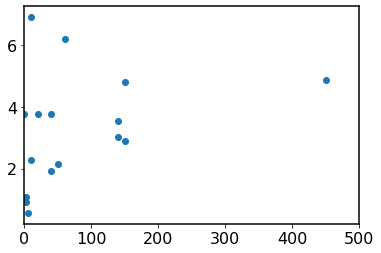

In [55]:
plt.scatter(ADAP_all_targets['age'],ADAP_all_targets['r50'])
plt.xlim(0,500)

In [50]:
-1*np.array(ADAP_CG_clusters['X'].data)*u.pc

<Quantity [120.8, 856. , 592.2, 379. , 491. , 288.7, -26.5,  37.1, 146.9,
           344.3, 665.2,  43.1, 308.7, -43.1, 358.7] pc>

(array([1., 6., 4., 4., 0., 0., 1., 0., 0., 1.]),
 array([-231.7     , -163.1     ,  -94.5     ,  -25.900002,   42.699997,
         111.299995,  179.9     ,  248.5     ,  317.09998 ,  385.69998 ,
         454.3     ], dtype=float32),
 <a list of 10 Patch objects>)

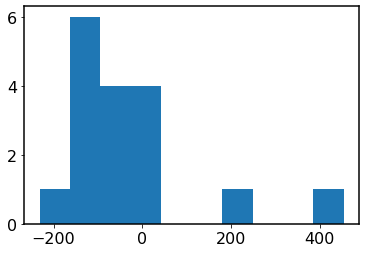

In [191]:
plt.hist(ADAP_CG_clusters['Z'])

In [70]:
ADAP_CG_clusters.iloc[np.argmax(ADAP_CG_clusters['Z'])]

cluster         NGC_2682
ra               132.846
dec               11.814
l                215.691
b                 31.921
r50                0.166
nbstars              691
pmra             -10.986
sigpmra            0.193
uncertpmra         0.008
pmdec             -2.964
sigpmdec           0.201
uncertpmdec        0.008
par                1.135
sigpar             0.051
uncertpar          0.002
d05                857.6
d16                858.3
dmode              859.1
d84                860.1
d95                860.7
dmodePLUS01        791.2
dmodeMINUS01       939.9
X                 -592.2
Y                 -425.4
Z                  454.3
Rgc               8942.4
Name: 2, dtype: object

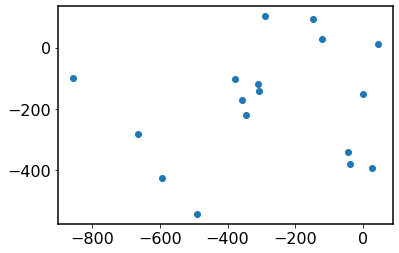

In [190]:
plt.scatter(ADAP_CG_clusters['X'],ADAP_CG_clusters['Y'])

In [4]:
ADAP_CG_clusters.keys()

Index(['cluster', 'ra', 'dec', 'l', 'b', 'r50', 'nbstars', 'pmra', 'sigpmra',
       'uncertpmra', 'pmdec', 'sigpmdec', 'uncertpmdec', 'par', 'sigpar',
       'uncertpar', 'd05', 'd16', 'dmode', 'd84', 'd95', 'dmodePLUS01',
       'dmodeMINUS01', 'X', 'Y', 'Z', 'Rgc'],
      dtype='object')

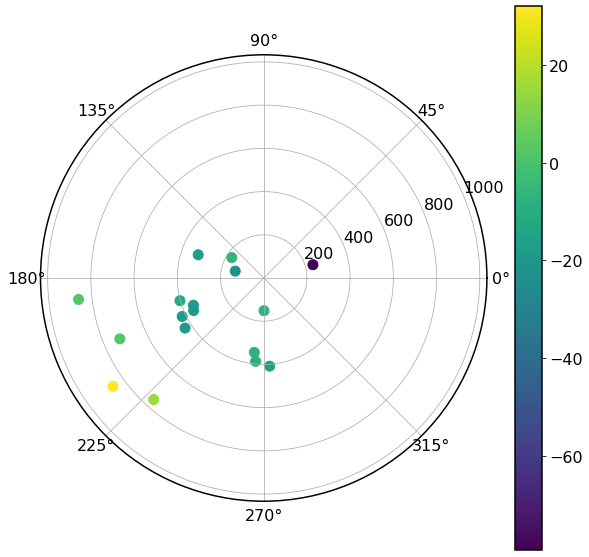

In [189]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot('111',projection='polar')
locs = ax.scatter(ADAP_CG_clusters['l']*np.pi/180,ADAP_CG_clusters['dmode'],c=ADAP_CG_clusters['b'],s=100)
#ax.scatter([0],[0])
fig.colorbar(locs,ax=ax)

In [48]:
ADAP_CG_clusters['b']

0    -23.614
1      2.230
2     31.921
3    -12.050
4     15.390
5    -17.810
6    -15.873
7     -8.595
8     -6.404
9    -18.954
10     2.166
11    -7.691
12   -18.373
13   -79.086
14   -18.138
Name: b, dtype: float64

(array([4., 2., 1., 3., 3., 0., 1., 2., 0., 1.]),
 array([8296.9 , 8386.86, 8476.82, 8566.78, 8656.74, 8746.7 , 8836.66,
        8926.62, 9016.58, 9106.54, 9196.5 ], dtype=float32),
 <a list of 10 Patch objects>)

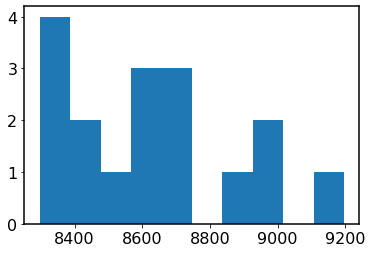

In [188]:
plt.hist(ADAP_CG_clusters['Rgc'])

(array([3., 0., 3., 3., 1., 3., 2., 0., 1., 1.]),
 array([0.5390136, 1.1781538, 1.8172939, 2.456434 , 3.0955741, 3.7347145,
        4.3738546, 5.012995 , 5.652135 , 6.291275 , 6.930415 ],
       dtype=float32),
 <a list of 10 Patch objects>)

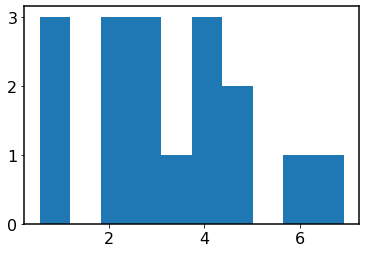

In [185]:
plt.hist((ADAP_CG_clusters['r50']*np.pi/180) * ADAP_CG_clusters['dmode'])

In [187]:
np.min(ADAP_CG_clusters['r50']*np.pi/180 * ADAP_CG_clusters['dmode']), np.max(ADAP_CG_clusters['r50']*np.pi/180 * ADAP_CG_clusters['dmode'])



(0.5390136, 6.930415)

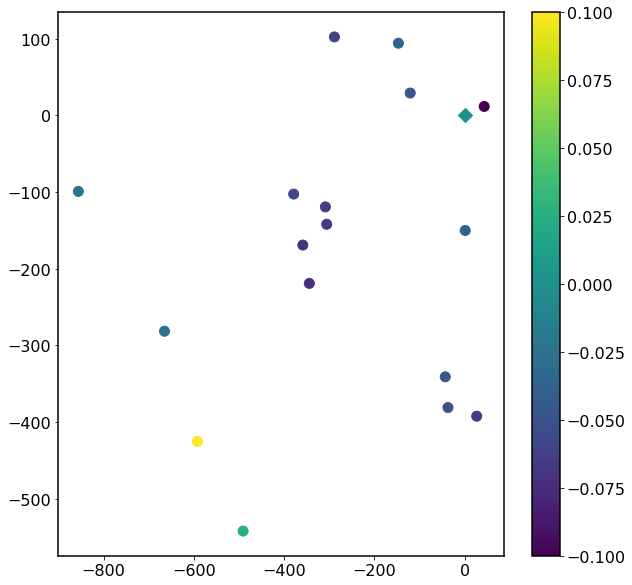

In [184]:
plt.figure(figsize=(10,10))
plt.scatter(ADAP_CG_clusters['X'],ADAP_CG_clusters['Y'],c=ADAP_CG_clusters['Z'],s=100)
plt.scatter([0],[0],c=[0],marker='D',s=100)
plt.colorbar()

In [42]:
(ADAP_CG_clusters['r50']*np.pi/180) * ADAP_CG_clusters['dmode']

0     3.015133
1     4.801499
2     2.489025
3     6.930414
4     4.886873
5     0.539014
6     3.539779
7     1.912490
8     6.208808
9     1.077196
10    0.908423
11    3.784092
12    2.288978
13    2.877945
14    3.765445
dtype: float64

In [184]:
ADAP_all_targets.set_index('cluster',inplace=True)

In [185]:
ADAP_all_targets#.drop('Unnamed: 0',axis=1,inplace=True)

expected_inclinations  age  dmode ground_survey space_survey  \
cluster                                                                      
Melotte_20                       46   60  175.5           APO         TESS   
Collinder_69                     42   10  401.5           APO         TESS   
IC_348                           33    6  321.7           APO         TESS   
NGC_2516                         32  140  408.9           GES         TESS   
NGC_2547                         20   40  387.2           GES         TESS   
L_1641S                          18    3  431.6           APO         TESS   
NGC_2264                         16    3  722.9           GES         TESS   
Pozzo_1                          14   20  346.9           GES         TESS   
ASCC_16                          13   10  348.8           APO         TESS   
Gulliver_6                       13   -1  417.3           APO         TESS   

              pri_mis_secs  
cluster                     
Melotte_20              27  
Collinder_69            27  
IC_348                  27  
NGC_2516               189  
NGC_2547                54  
L_1641S                 27  
NGC_2264                27  
Pozzo_1                 81  
ASCC_16                 27  
Gulliver_6              27

In [191]:
Tcat[Tcat['cluster']=='Blanco_1']['dmode']

12    235.9
Name: dmode, dtype: float64

In [194]:
ADAP_all_targets

expected_inclinations  age  dmode ground_survey space_survey  \
cluster                                                                      
Melotte_20                       46   60  175.5           APO         TESS   
Collinder_69                     42   10  401.5           APO         TESS   
IC_348                           33    6  321.7           APO         TESS   
NGC_2516                         32  140  408.9           GES         TESS   
NGC_2547                         20   40  387.2           GES         TESS   
L_1641S                          18    3  431.6           APO         TESS   
NGC_2264                         16    3  722.9           GES         TESS   
Pozzo_1                          14   20  346.9           GES         TESS   
ASCC_16                          13   10  348.8           APO         TESS   
Gulliver_6                       13   -1  417.3           APO         TESS   

              pri_mis_secs  
cluster                     
Melotte_20              27  
Collinder_69            27  
IC_348                  27  
NGC_2516               189  
NGC_2547                54  
L_1641S                 27  
NGC_2264                27  
Pozzo_1                 81  
ASCC_16                 27  
Gulliver_6              27

In [161]:
ADAP_clusters_TESS_APO.loc['ASCC_19']

ra                        81.982
dec                       -1.987
l                        204.914
b                        -19.438
r50                        0.605
nbstars                      188
pmra                       1.152
sigpmra                    0.252
uncertpmra                 0.019
pmdec                     -1.234
sigpmdec                   0.219
uncertpmdec                0.018
par                        2.768
sigpar                     0.089
uncertpar                  0.007
d05                        356.8
d16                        357.1
dmode                      357.6
d84                          358
d95                        358.3
dmodePLUS01                345.2
dmodeMINUS01               370.9
X                         -305.8
Y                         -142.1
Z                           -119
Rgc                         8647
Cluster                      NaN
RAdeg  DEdeg                 NaN
U                            NaN
e_U                          NaN
V         

In [170]:
ADAP_CG_clusters.loc[['IC_2391']]

ra        dec           l      b    r50  nbstars       pmra  \
cluster                                                                        
IC_2391  130.292007 -52.991001  270.385986 -6.737  0.814      224 -24.643999   

         sigpmra  uncertpmra   pmdec ...        dmode         d84         d95  \
cluster                              ...                                        
IC_2391    0.883       0.056  23.316 ...   151.300003  151.300003  151.399994   

         dmodePLUS01  dmodeMINUS01    X           Y          Z          Rgc  \
cluster                                                                       
IC_2391        149.0    153.600006  1.0 -150.199997 -17.700001  8340.299805   

         age  
cluster       
IC_2391   50  

[1 rows x 27 columns]

In [174]:
ADAP_all_targets.loc['ASCC_19'] = [11,40,357.6,'APO','TESS',27]
ADAP_all_targets.loc['IC_2391'] = [11,50,151.3,'2007AA','TESS',54]

In [182]:
ADAP_all_targets#.sort_values('expected_inclinations',ascending=False)

expected_inclinations   age  dmode ground_survey space_survey  \
cluster                                                                       
Melotte_22                      129   140  135.6           APO           K2   
NGC_2168                         60   150  862.4        2010AJ           K2   
NGC_2682                         47  4200  859.1           APO           K2   
Melotte_20                       46    60  175.5           APO         TESS   
Collinder_69                     42    10  401.5           APO         TESS   
NGC_2548                         41   450  758.8        2020AJ         TESS   
IC_348                           33     6  321.7           APO         TESS   
NGC_2516                         32   140  408.9           GES         TESS   
NGC_2547                         20    40  387.2           GES         TESS   
L_1641S                          18     3  431.6           APO         TESS   
NGC_2264                         16     3  722.9           GES         TESS   
Pozzo_1                          14    20  346.9           GES         TESS   
ASCC_16                          13    10  348.8           APO         TESS   
Gulliver_6                       13    -1  417.3           APO         TESS   
Blanco_1                         13   150  235.9        2009AA         TESS   
ASCC_19                          11    40  357.6           APO         TESS   
IC_2391                          11    50  151.3        2007AA         TESS   

              pri_mis_secs  
cluster                     
Melotte_22              72  
NGC_2168                78  
NGC_2682               209  
Melotte_20              27  
Collinder_69            27  
NGC_2548                27  
IC_348                  27  
NGC_2516               189  
NGC_2547                54  
L_1641S                 27  
NGC_2264                27  
Pozzo_1                 81  
ASCC_16                 27  
Gulliver_6              27  
Blanco_1                27  
ASCC_19                 27  
IC_2391                 54

In [183]:
ADAP_all_targets.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_added.csv')

In [195]:
ADAP_all_targets.loc['NGC_2168'] = [60,150,862.4,'2010AJ','K2',78]
ADAP_all_targets.loc['NGC_2548'] = [41,450,758.8,'2020AJ','TESS',27]
ADAP_all_targets.loc['Blanco_1'] = [13,150,235.9,'2009AA','TESS',27]

In [ ]:
0	Melotte_22	135.600006	129	K2	APO
1	NGC_2682	859.099976	47	K2	APO
ADAP_all_targets

In [199]:
ADAP_all_targets.loc['Melotte_22'] = [129,140,135.6,'APO','K2',72]
ADAP_all_targets.loc['NGC_2682'] = [47,4200,859.1,'APO','K2',209]

In [201]:
ADAP_all_targets.sort_values('expected_inclinations',ascending=False,inplace=True)

In [203]:
ADAP_all_targets

expected_inclinations   age  dmode ground_survey space_survey  \
cluster                                                                       
Melotte_22                      129   140  135.6           APO           K2   
NGC_2168                         60   150  862.4        2010AJ           K2   
NGC_2682                         47  4200  859.1           APO           K2   
Melotte_20                       46    60  175.5           APO         TESS   
Collinder_69                     42    10  401.5           APO         TESS   
NGC_2548                         41   450  758.8        2020AJ         TESS   
IC_348                           33     6  321.7           APO         TESS   
NGC_2516                         32   140  408.9           GES         TESS   
NGC_2547                         20    40  387.2           GES         TESS   
L_1641S                          18     3  431.6           APO         TESS   
NGC_2264                         16     3  722.9           GES         TESS   
Pozzo_1                          14    20  346.9           GES         TESS   
ASCC_16                          13    10  348.8           APO         TESS   
Gulliver_6                       13    -1  417.3           APO         TESS   
Blanco_1                         13   150  235.9        2009AA         TESS   

              pri_mis_secs  
cluster                     
Melotte_22              72  
NGC_2168                78  
NGC_2682               209  
Melotte_20              27  
Collinder_69            27  
NGC_2548                27  
IC_348                  27  
NGC_2516               189  
NGC_2547                54  
L_1641S                 27  
NGC_2264                27  
Pozzo_1                 81  
ASCC_16                 27  
Gulliver_6              27  
Blanco_1                27

In [205]:
ADAP_all_targets.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_added.csv')
ADAP_all_targets.to_latex('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_added.tex')

In [134]:
Tcat[Tcat['cluster']=='Pozzo_1']

cluster          ra        dec        l      b    r50  nbstars   pmra  \
24  Pozzo_1  122.374001 -47.334999  262.798 -7.691  0.625      390 -6.516   

    sigpmra  uncertpmra       ...        RAdeg    DEdeg  e_pmRA  e_pmDE  cc1  \
24     0.27       0.015       ...                   NaN     NaN     NaN  NaN   

    cc2  cc3  rMax  e_RV  o_  nspec_mems_GES  
24  NaN  NaN   NaN   NaN NaN             159  

[1 rows x 59 columns]

0.41122565864833904

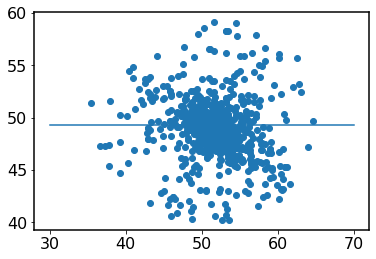

In [124]:
plt.scatter(obsmerge_mems[obsmerge_mems['cluster']=='Melotte_20']['ra'],obsmerge_mems[obsmerge_mems['cluster']=='Melotte_20']['dec'])
plt.plot([30,70],[49.333,49.333])
np.sum(obsmerge_mems[obsmerge_mems['cluster']=='Melotte_20']['dec']>49.333)/len(obsmerge_mems[obsmerge_mems['cluster']=='Melotte_20'])

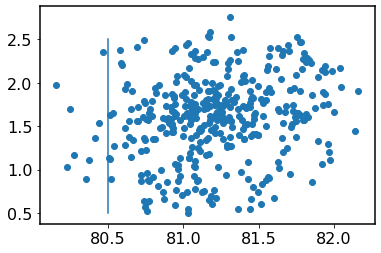

In [142]:
plt.scatter(obsmerge_mems[obsmerge_mems['cluster']=='ASCC_16']['ra'],obsmerge_mems[obsmerge_mems['cluster']=='ASCC_16']['dec'])
#plt.scatter(122.25,-46.7)
plt.plot([80.5,80.5],[.5,2.5])

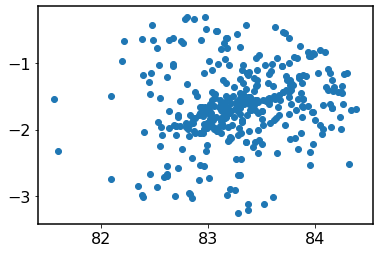

In [148]:
plt.scatter(obsmerge_mems[obsmerge_mems['cluster']=='Gulliver_6']['ra'],obsmerge_mems[obsmerge_mems['cluster']=='Gulliver_6']['dec'])


In [143]:
len(obsmerge_mems[obsmerge_mems['cluster']=='ASCC_16'])

386

In [16]:
ADAP_all_targets

cluster  expected_inclinations   age  dmode  r50 ground_survey  \
0     Melotte_22                    129   140    136  3.0           APO   
1       NGC_2168                     60   150    862  4.8        2010AJ   
2       NGC_2682                     47  4200    859  2.5           APO   
3     Melotte_20                     46    60    176  6.2           APO   
4   Collinder_69                     42    10    402  6.9           APO   
5       NGC_2548                     41   450    759  4.9        2020AJ   
6         IC_348                     33     6    322  0.5           APO   
7       NGC_2516                     32   140    409  3.5           GES   
8       NGC_2547                     20    40    387  1.9           GES   
9        L_1641S                     18     3    432  1.1           APO   
10      NGC_2264                     16     3    723  0.9           GES   
11       Pozzo_1                     14    20    347  3.8           GES   
12       ASCC_16                     13    10    349  2.3           APO   
13    Gulliver_6                     13    -1    417  3.8           APO   
14      Blanco_1                     13   150    236  2.9        2009AA   
15       ASCC_19                     11    40    358  3.8           APO   
16       IC_2391                     11    50    151  2.1        2007AA   

   space_survey  pri_mis_secs  
0            K2            72  
1            K2            78  
2            K2           209  
3          TESS            27  
4          TESS            27  
5          TESS            27  
6          TESS            27  
7          TESS           189  
8          TESS            54  
9          TESS            27  
10         TESS            27  
11         TESS            81  
12         TESS            27  
13         TESS            27  
14         TESS            27  
15         TESS            27  
16         TESS            54

In [17]:
np.mean(ADAP_all_targets['r50'])

3.2294117647058815

In [165]:
ADAP_all_targets.drop(8,inplace=True)

In [166]:
ADAP_all_targets = ADAP_all_targets.sort_values('expected_inclinations',ascending=False)

In [167]:
G6= obsmerge_mems[obsmerge_mems['cluster']=='Gulliver_6']
L1641= obsmerge_mems[obsmerge_mems['cluster']=='L_1641S']

(18.5, 7)

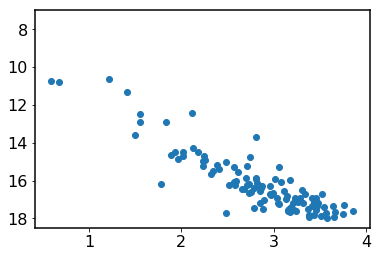

In [74]:
plt.scatter(L1641['bp_rp'],L1641['phot_g_mean_mag'])
plt.ylim(18.5,7)

(18.5, 7)

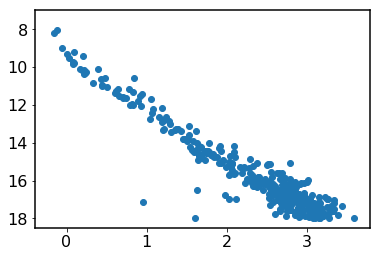

In [72]:
plt.scatter(G6['bp_rp'],G6['phot_g_mean_mag'])
plt.ylim(18.5,7)

In [160]:
ADAP_all_targets

cluster  expected_inclinations   age  dmode ground_survey  \
0     Melotte_22                    129   140  135.6           APO   
1       NGC_2168                     60   150  862.4        2010AJ   
2       NGC_2682                     47  4200  859.1           APO   
3     Melotte_20                     46    60  175.5           APO   
4   Collinder_69                     42    10  401.5           APO   
5       NGC_2548                     41   450  758.8        2020AJ   
6         IC_348                     33     6  321.7           APO   
7       NGC_2516                     32   140  408.9           GES   
8       NGC_2547                     20    40  387.2           GES   
9        L_1641S                     18     3  431.6           APO   
10      NGC_2264                     16     3  722.9           GES   
11       Pozzo_1                     14    20  346.9           GES   
12       ASCC_16                     13    10  348.8           APO   
13    Gulliver_6                     13    -1  417.3           APO   
14      Blanco_1                     13   150  235.9        2009AA   

   space_survey  pri_mis_secs  
0            K2            72  
1            K2            78  
2            K2           209  
3          TESS            27  
4          TESS            27  
5          TESS            27  
6          TESS            27  
7          TESS           189  
8          TESS            54  
9          TESS            27  
10         TESS            27  
11         TESS            81  
12         TESS            27  
13         TESS            27  
14         TESS            27

In [71]:
ages = np.array([140,4200,60,10,6,140,40,3,3,20,10,-1,150,150,450])

#Pleiades | 140 | https://ui.adsabs.harvard.edu/abs/2018ApJ...863...67G/abstract
#Praesepe | 800 | https://ui.adsabs.harvard.edu/abs/2015ApJ...807...24B/abstract
#M67 | 4200 | https://ui.adsabs.harvard.edu/abs/2016ApJ...823...16B/abstract
#Alpha Per | 60 | https://ui.adsabs.harvard.edu/abs/2014A%26A...566A.132S/abstract
#Collinder 69 | 10 | https://ui.adsabs.harvard.edu/abs/2013MNRAS.434..806B/abstract
#IC 348 | 6 | https://ui.adsabs.harvard.edu/abs/2013MNRAS.434..806B/abstract
#NGC 2516 | 140 | https://ui.adsabs.harvard.edu/abs/1993A%26AS...98..477M/abstract
#NGC 2547 | 40 | https://ui.adsabs.harvard.edu/abs/2006MNRAS.373.1251N/abstract
#L 1641S | 3 | https://ui.adsabs.harvard.edu/abs/2013ApJS..207....5F/abstract
#NGC 2264 | 3 | https://ui.adsabs.harvard.edu/abs/2004AJ....128.1684S/abstract
#Pozzo 1 | 20 | https://ui.adsabs.harvard.edu/abs/2017MNRAS.464.1456J/abstract
#ASCC 16 | 10 | https://ui.adsabs.harvard.edu/abs/2019A%26A...631A.166K/abstract
#Gulliver 6 | ?
#M35 | 150 | https://ui.adsabs.harvard.edu/abs/2009ApJ...695..679M/abstract
#Blanco 1 | 150 | https://ui.adsabs.harvard.edu/abs/2014ApJ...782...29C/abstract
#M48 | 450 | https://ui.adsabs.harvard.edu/abs/2015A%26A...583A..73B/abstract
#ASCC 19 | 40 | https://ui.adsabs.harvard.edu/abs/2005A%26A...440..403K/abstract
#IC 2391 | 50 | https://ui.adsabs.harvard.edu/abs/2004ApJ...614..386B/abstract

In [212]:
#ADAP_all_targets['age'] = ages

(array([8., 1., 2., 2., 0., 0., 0., 0., 1.]),
 array([ -1.        ,  49.11111111,  99.22222222, 149.33333333,
        199.44444444, 249.55555556, 299.66666667, 349.77777778,
        399.88888889, 450.        ]),
 <a list of 9 Patch objects>)

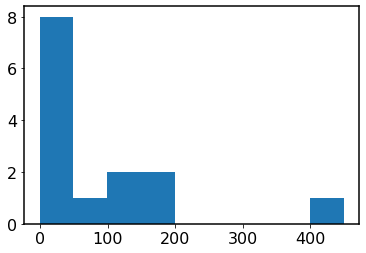

In [218]:
plt.hist(ages[ages<4000],bins=9)

In [219]:
np.median(ages)

40.0

In [171]:
ADAP_all_targets = pd.merge(ADAP_all_targets,Tcat_new[['cluster','pri_mis_secs']],on='cluster')

In [172]:
ADAP_all_targets[['cluster','expected_inclinations','age','dmode','ground_survey','space_survey','pri_mis_secs']]

cluster  expected_inclinations  age  dmode ground_survey space_survey  \
0    Melotte_20                     46   60  175.5           APO         TESS   
1  Collinder_69                     42   10  401.5           APO         TESS   
2        IC_348                     33    6  321.7           APO         TESS   
3      NGC_2516                     32  140  408.9           GES         TESS   
4      NGC_2547                     20   40  387.2           GES         TESS   
5       L_1641S                     18    3  431.6           APO         TESS   
6      NGC_2264                     16    3  722.9           GES         TESS   
7       Pozzo_1                     14   20  346.9           GES         TESS   
8       ASCC_16                     13   10  348.8           APO         TESS   
9    Gulliver_6                     13   -1  417.3           APO         TESS   

   pri_mis_secs  
0            27  
1            27  
2            27  
3           189  
4            54  
5            27  
6            27  
7            81  
8            27  
9            27

In [182]:
ADAP_all_targets[['expected_inclinations','age','dmode','ground_survey','space_survey','pri_mis_secs']].to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/ADAP_all_targets_age_days.csv')

In [89]:
np.median(ages)

13.0

In [66]:
ADAP_all_targets.sort_values('expected_inclinations',ascending=False)

cluster       dmode  expected_inclinations space_survey ground_survey
0     Melotte_22  135.600006                    129           K2           APO
1       NGC_2682  859.099976                     47           K2           APO
2     Melotte_20  175.500000                     46         TESS           APO
5   Collinder_69  401.500000                     42         TESS           APO
3         IC_348  321.700000                     33         TESS           APO
11      NGC_2516  408.900000                     32         TESS           GES
10      NGC_2547  387.200000                     20         TESS           GES
7        L_1641S  431.600000                     18         TESS           APO
12      NGC_2264  722.900000                     16         TESS           GES
9        Pozzo_1  346.900000                     14         TESS           GES
4        ASCC_16  348.800000                     13         TESS           APO
6     Gulliver_6  417.300000                     13         TESS           APO
8       NGC_2264  722.900000                     13         TESS           APO

In [36]:
APO_GAL_2264 = pd.merge(obsmerge_mems[obsmerge_mems['cluster']=='NGC_2264'],SDSS_GALAH_merge,on='source_id')

In [56]:
np.sum(pd.merge(ADAP_all_targets,Kcat,on='cluster')['nbstars']//5)

336

In [63]:
np.sum(pd.merge(ADAP_all_targets[:-1],Tcat,on='cluster')['nbstars']//5)

763

In [25]:
jeffmerge_mems = pd.merge(obsmerge_mems,jefftbl1,on='source_id')

In [32]:
GES_2264 = jeffmerge_mems[(jeffmerge_mems['Cluster'] == 'NGC2264') & (jeffmerge_mems['proba']>0.68) & (jeffmerge_mems['vsini']> 5)]

In [38]:
APO_GAL_2264 = APO_GAL_2264[(APO_GAL_2264['vsini'] > 5) & (APO_GAL_2264['proba']>0.68)]

In [43]:
all3_2264=pd.merge(GES_2264,APO_GAL_2264,on='source_id',how='outer',indicator=True)

In [45]:
np.sum(all3_2264['_merge']=='left_only'),np.sum(all3_2264['_merge']=='right_only'),np.sum(all3_2264['_merge']=='both')

(40, 22, 31)

In [47]:
len(APO_GAL_2264)

53

In [39]:
Pleiades_rotation = Table(fits.open('/Users/bhealy/Downloads/J_AJ_152_113_table2.dat.fits')[1].data).to_pandas()

In [3]:
goodindx = (pleiades_mergetbl['proba']>0.68) & (pleiades_mergetbl['vsini']>5)

In [6]:
pl_sini = (pleiades_mergetbl[goodindx]['vsini']*1e3*pleiades_mergetbl[goodindx]['Prot']*86400)/(2*np.pi*pleiades_mergetbl['radius_val']*7e8)
                                                                                               
                                                                                               
                                                                                               

In [9]:
good_sini=pl_sini[~np.isnan(pl_sini)]

In [13]:
import statsmodels.distributions.empirical_distribution as emp
ecdf=emp.ECDF(good_sini)

(0, 5)

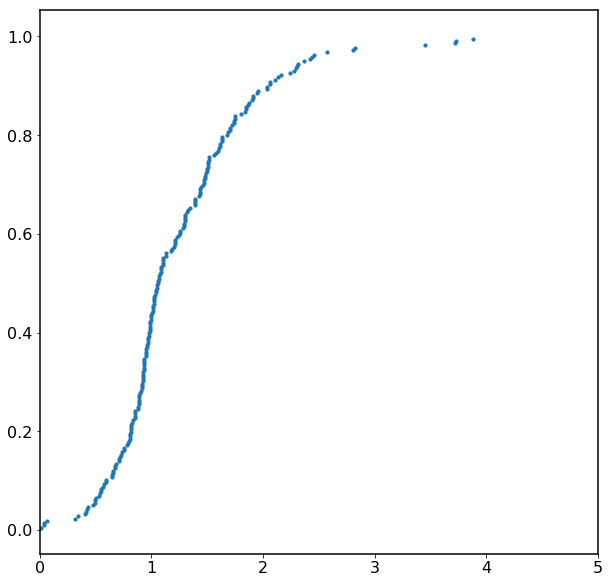

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(ecdf.x[1:],ecdf.y[1:],s=10)
plt.xlim(0,5)

In [131]:
obsmerge_mems_68 = obsmerge_mems[obsmerge_mems['proba']>0.68]
specmerge_mems = pd.merge(SDSS_GALAH_merge,obsmerge_mems_68,on='source_id')
specmerge_mems_vsini5 = specmerge_mems[specmerge_mems['vsini']>5]
specmerge_mems_vsini10 = specmerge_mems[specmerge_mems['vsini']>10]

APO_vsini5 = specmerge_mems_vsini5[specmerge_mems_vsini5['APO']==True]
APO_vsini10 = specmerge_mems_vsini10[specmerge_mems_vsini10['APO']==True]

GALAH_vsini5 = specmerge_mems_vsini5[specmerge_mems_vsini5['GALAH']==True]

In [130]:
obsmerge_mems.reset_index(inplace=True)

In [132]:
clust_count = Counter(specmerge_mems_vsini5['cluster'])
clust_count_APO = Counter(APO_vsini5['cluster'])
clust_count_APO_10 = Counter(APO_vsini10['cluster'])

clust_count_GALAH = Counter(GALAH_vsini5['cluster'])

In [133]:
clust_count_GALAH

Counter({'ASCC_16': 7,
         'ASCC_21': 4,
         'Collinder_135': 6,
         'NGC_2516': 19,
         'NGC_2548': 23,
         'Turner_5': 1,
         'NGC_3680': 1,
         'NGC_5460': 7,
         'Alessi_Teutsch_12': 2,
         'Alessi_24': 9,
         'Alessi_9': 1,
         'Mamajek_4': 11})

In [134]:
val = clust_count.values()
keys = clust_count.keys()
cnt = np.array([x for x in val])
keys = np.array([x for x in keys])

val_apo = clust_count_APO.values()
keys_apo = clust_count_APO.keys()
cnt_apo = np.array([x for x in val_apo])
keys_apo = np.array([x for x in keys_apo])

val_apo_10 = clust_count_APO_10.values()
keys_apo_10 = clust_count_APO_10.keys()
cnt_apo_10 = np.array([x for x in val_apo_10])
keys_apo_10 = np.array([x for x in keys_apo_10])

val_gal = clust_count_GALAH.values()
keys_gal = clust_count_GALAH.keys()
cnt_gal = np.array([x for x in val_gal])
keys_gal = np.array([x for x in keys_gal])

In [135]:
Tbl_apo = Table([keys_apo,cnt_apo],names=['cluster','count'])
Tbl_apo.sort('count',reverse=True)

Tbl_apo_10 = Table([keys_apo_10,cnt_apo_10],names=['cluster','count'])
Tbl_apo_10.sort('count',reverse=True)
#Tbl_apo[Tbl_apo['count']/3 >= 10]
APO_target_clusters = Tbl_apo.to_pandas()
APO_target_clusters_10 = Tbl_apo_10.to_pandas()

In [138]:
TESS_APO_clusters[TESS_APO_clusters['cluster']=='NGC_2516']

Empty DataFrame
Columns: [cluster, ra, dec, l, b, r50, nbstars, pmra, sigpmra, uncertpmra, pmdec, sigpmdec, uncertpmdec, par, sigpar, uncertpar, d05, d16, dmode, d84, d95, dmodePLUS01, dmodeMINUS01, X, Y, Z, Rgc, Cluster, RAdeg  DEdeg, U, e_U, V, e_V, W, e_W, cUV, cUW, cVW, RAconv   DEconv, plx, e_plx, pmRA, _pmRA, pmDE, _pmDE, Memb, uwsd, RV, e_, RAdeg    DEdeg, e_pmRA, e_pmDE, cc1, cc2, cc3, rMax, e_RV, o_, nspec_mems_GES, count]
Index: []

[0 rows x 60 columns]

In [136]:
TESS_APO_clusters = pd.merge(Tcat,APO_target_clusters,on='cluster')
ADAP_clusters_TESS_APO = TESS_APO_clusters[TESS_APO_clusters['count']/3 >= 10]

In [146]:
TESS_APO_clusters_10 = pd.merge(Tcat,APO_target_clusters_10,on='cluster')
ADAP_clusters_TESS_APO_10 = TESS_APO_clusters_10[TESS_APO_clusters_10['count']/3 >= 10]
KEP_APO_clusters_10 = pd.merge(Kcat,APO_target_clusters_10,on='cluster')
ADAP_clusters_KEP_APO_10 = KEP_APO_clusters_10[KEP_APO_clusters_10['count']/3 >= 10]

In [148]:
ADAP_clusters_TESS_APO

cluster          ra        dec        l       b    r50  nbstars  \
0     Melotte_20   51.617001  48.974998  147.357  -6.404  2.027      764   
4         IC_348   56.132000  32.159000  160.486 -17.810  0.096      144   
8        ASCC_16   81.197998   1.655000  201.139 -18.373  0.376      226   
10       ASCC_19   81.982002  -1.987000  204.914 -19.438  0.605      188   
15  Collinder_69   83.792000   9.813000  195.162 -12.050  0.989      669   
17    Gulliver_6   83.278000  -1.652000  205.246 -18.138  0.517      343   
21       L_1641S   85.675003  -8.133000  212.480 -18.954  0.143      101   
34      NGC_2264  100.217003   9.877000  202.941   2.166  0.072      170   

      pmra  sigpmra  uncertpmra  ...    e_pmRA  e_pmDE  cc1  cc2  cc3  rMax  \
0   22.864    1.127       0.048  ...       NaN     NaN  NaN  NaN  NaN   NaN   
4    4.483    0.593       0.052  ...       NaN     NaN  NaN  NaN  NaN   NaN   
8    1.355    0.265       0.019  ...       NaN     NaN  NaN  NaN  NaN   NaN   
10   1.152    0.252       0.019  ...       NaN     NaN  NaN  NaN  NaN   NaN   
15   1.194    0.550       0.021  ...       NaN     NaN  NaN  NaN  NaN   NaN   
17  -0.007    0.390       0.022  ...       NaN     NaN  NaN  NaN  NaN   NaN   
21   0.013    0.346       0.036  ...       NaN     NaN  NaN  NaN  NaN   NaN   
34  -1.690    0.508       0.031  ...       NaN     NaN  NaN  NaN  NaN   NaN   

    e_RV  o_  nspec_mems_GES  count  
0    NaN NaN               0    185  
4    NaN NaN               0    132  
8    NaN NaN               0     52  
10   NaN NaN               0     35  
15   NaN NaN               0    168  
17   NaN NaN               0     53  
21   NaN NaN               0     75  
34   NaN NaN             147     53  

[8 rows x 60 columns]

In [149]:
KEP_APO_clusters = pd.merge(Kcat,APO_target_clusters,on='cluster')
ADAP_clusters_KEP_APO = KEP_APO_clusters[KEP_APO_clusters['count']/3 >= 10]

In [153]:
ADAP_clusters_TESS_APO['expected_inclinations'] = ADAP_clusters_TESS_APO['count']//3
ADAP_clusters_KEP_APO['expected_inclinations'] = ADAP_clusters_KEP_APO['count']//3

ADAP_clusters_TESS_APO_10['expected_inclinations'] = ADAP_clusters_TESS_APO_10['count']//3
ADAP_clusters_KEP_APO_10['expected_inclinations'] = ADAP_clusters_KEP_APO_10['count']//3

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [158]:
ADAP_clusters_TESS_APO.set_index('cluster',inplace=True)

In [159]:
ADAP_clusters_TESS_APO.loc['ASCC_19']

ra                        81.982
dec                       -1.987
l                        204.914
b                        -19.438
r50                        0.605
nbstars                      188
pmra                       1.152
sigpmra                    0.252
uncertpmra                 0.019
pmdec                     -1.234
sigpmdec                   0.219
uncertpmdec                0.018
par                        2.768
sigpar                     0.089
uncertpar                  0.007
d05                        356.8
d16                        357.1
dmode                      357.6
d84                          358
d95                        358.3
dmodePLUS01                345.2
dmodeMINUS01               370.9
X                         -305.8
Y                         -142.1
Z                           -119
Rgc                         8647
Cluster                      NaN
RAdeg  DEdeg                 NaN
U                            NaN
e_U                          NaN
V         

In [185]:
ADAP_clusters_TESS_APO = ADAP_clusters_TESS_APO[['cluster','dmode','expected_inclinations']]

In [186]:
ADAP_clusters_KEP_APO = ADAP_clusters_KEP_APO[['cluster','dmode','expected_inclinations']]

In [187]:
ADAP_clusters_TESS_GES

dmode  expected_inclinations space_survey ground_survey
cluster                                                          
Pozzo_1   346.9                     14         TESS           GES
NGC_2547  387.2                     20         TESS           GES
NGC_2516  408.9                     16         TESS           GES
NGC_2264  722.9                     32         TESS           GES

In [218]:
#ADAP_clusters_KEP_APO.set_index('cluster',inplace=True)
#ADAP_clusters_TESS_APO.set_index('cluster',inplace=True)
#ADAP_clusters_TESS_GES.set_index('cluster',inplace=True)

In [190]:
ADAP_clusters_KEP_APO['space_survey'] = 'K2'
ADAP_clusters_TESS_APO['space_survey'] = 'TESS'
ADAP_clusters_TESS_GES['space_survey'] = 'TESS'
                       
ADAP_clusters_KEP_APO['ground_survey'] = 'APO'
ADAP_clusters_TESS_APO['ground_survey'] = 'APO'
ADAP_clusters_TESS_GES['ground_survey'] = 'GES'

/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [200]:
ADAP_clusters_KEP_APO.reset_index(inplace=True)
ADAP_clusters_TESS_APO.reset_index(inplace=True)
ADAP_clusters_TESS_GES.reset_index(inplace=True)

In [223]:
ADAP_all_targets = pd.concat([ADAP_clusters_KEP_APO,ADAP_clusters_TESS_APO,ADAP_clusters_TESS_GES])
ADAP_all_targets.set_index('cluster',inplace=True)

In [224]:
ADAP_all_targets.sort_values('expected_inclinations',ascending=False)

dmode  expected_inclinations space_survey ground_survey
cluster                                                                   
Melotte_22    135.600006                    129           K2           APO
NGC_2682      859.099976                     47           K2           APO
Melotte_20    175.500000                     46         TESS           APO
Collinder_69  401.500000                     42         TESS           APO
IC_348        321.700000                     33         TESS           APO
NGC_2516      408.900000                     32         TESS           GES
NGC_2547      387.200000                     20         TESS           GES
L_1641S       431.600000                     18         TESS           APO
NGC_2264      722.900000                     16         TESS           GES
Pozzo_1       346.900000                     14         TESS           GES
ASCC_16       348.800000                     13         TESS           APO
Gulliver_6    417.300000                     13         TESS           APO
NGC_2264      722.900000                     13         TESS           APO

In [225]:
ADAP_all_targets.to_csv('/Users/bhealy/Documents/PhD_Thesis/Catalogs/all_ADAP_clusters.csv')

In [9]:
ADAP_all_targets.to_latex('/Users/bhealy/Documents/PhD_Thesis/Catalogs/all_ADAP_clusters.tex')

In [6]:
ADAP_all_targets.sort_values('expected_inclinations',inplace=True,ascending=False)

In [8]:
ADAP_all_targets.set_index('cluster',inplace=True)

In [101]:
Tbl_gal = Table([keys_gal,cnt_gal],names=['cluster','count'])
Tbl_gal.sort('count',reverse=True)
Tbl_gal

<Table length=12>
     cluster      count
      str17       int64
----------------- -----
         NGC_2548    23
         NGC_2516    19
        Mamajek_4    11
        Alessi_24     9
         NGC_5460     7
          ASCC_16     7
    Collinder_135     6
          ASCC_21     4
Alessi_Teutsch_12     2
         Alessi_9     1
         NGC_3680     1
         Turner_5     1

In [593]:
SDSS_DR16_pd['APO'] = True

In [549]:
GALAH_DR2_pd['GALAH'] = True

In [594]:
SDSS_DR16_pd['source_id'] = SDSS_DR16_pd['GAIA_SOURCE_ID']

In [555]:
GALAH_DR2_pd['source_id'] = GALAH_DR2_pd['gaia_dr2_id']

In [16]:
Tcat

cluster          ra        dec        l       b    r50  nbstars  \
0          ComaBer  185.980000  26.090000      NaN     NaN  7.500      153   
1        Alessi_13   51.762001 -35.820999  237.532 -55.941  1.361       48   
2        Mamajek_1  130.636993 -78.962997  292.436 -21.601  0.362       20   
3        Platais_8  136.718002 -58.685001  277.121  -7.576  2.716      211   
4          IC_2391  130.292007 -52.991001  270.386  -6.737  0.814      224   
5          IC_2602  160.613007 -64.426003  289.565  -4.955  1.449      311   
6       Melotte_20   51.617001  48.974998  147.357  -6.404  2.027      764   
7        Platais_3   69.975998  71.279999  139.221  16.068  1.723       90   
8        Platais_9  139.240997 -43.862000  267.362   3.707  1.595      128   
9        NGC_2451A  115.736000 -38.264000  252.431  -7.276  1.146      337   
10        Alessi_9  265.973999 -47.028000  344.269  -9.058  1.730      194   
11        ASCC_123  340.299011  53.986000  104.434  -4.141  1.294       55   
12        Blanco_1    0.853000 -29.958000   15.090 -79.086  0.699      381   
13      Platais_10  205.220001 -59.271000  309.220   2.996  0.485       21   
14        NGC_6475  268.446991 -34.841000  355.813  -4.513  0.834      941   
15        Alessi_3  109.275002 -46.141998  257.449 -15.064  1.541      178   
16         ASCC_41  116.674004   0.137000  219.206  12.333  0.679      127   
17        NGC_1333   52.297001  31.309999  158.343 -20.505  0.095       50   
18        NGC_7092  322.889008  48.247002   92.246  -2.350  1.003      161   
19   Collinder_135  109.362000 -37.043999  248.989 -11.201  1.138      352   
20          IC_348   56.132000  32.159000  160.486 -17.810  0.096      144   
21        NGC_2232   96.888000  -4.749000  214.458  -7.471  0.516      198   
22           RSG_5  303.481995  45.574001   81.719   6.098  0.867      173   
23         ASCC_21   82.179001   3.527000  199.938 -16.598  0.410      131   
24         Pozzo_1  122.374001 -47.334999  262.798  -7.691  0.625      390   
25         ASCC_16   81.197998   1.655000  201.139 -18.373  0.376      226   
26       Roslund_6  307.184998  39.798000   78.495   0.585  1.004      249   
27    Stephenson_1  283.567993  36.898998   66.908  15.365  0.249       97   
28         ASCC_19   81.982002  -1.987000  204.914 -19.438  0.605      188   
29        Stock_10   84.807999  37.849998  171.714   3.556  0.541      144   
..             ...         ...        ...      ...     ...    ...      ...   
202      Harvard_5  186.817001 -60.770000  299.984   1.964  0.089       52   
203       Bochum_4  112.876999 -17.229000  232.772   0.734  0.136       27   
204       NGC_2374  111.015999 -13.235000  228.405   1.061  0.156       79   
205       NGC_2539  122.657997 -12.834000  233.721  11.106  0.187      518   
206       FSR_1297  110.984001 -25.879000  239.554  -4.926  0.049       28   
207       NGC_2354  108.502998 -25.724001  238.383  -6.838  0.152      276   
208       NGC_4852  195.046005 -59.606998  304.040   3.246  0.123      207   
209       NGC_2910  142.643005 -52.912998  275.318  -1.164  0.053      136   
210       NGC_2362  109.670998 -24.954000  238.178  -5.547  0.052      165   
211       NGC_2571  124.723000 -29.775000  249.121   3.511  0.127      166   
212    Gulliver_36  123.184998 -35.111000  252.834  -0.537  0.140      101   
213    Trumpler_21  203.067993 -62.786999  307.581  -0.284  0.071      105   
214     ESO_130_08  182.619003 -59.479000  297.745   2.980  0.101      117   
215       NGC_2482  118.787003 -24.263000  241.624   2.022  0.149      128   
216        IC_2714  169.373001 -62.719002  292.401  -1.784  0.171      934   
217        IC_2488  141.856995 -57.004002  277.812  -4.442  0.220      435   
218       NGC_2318  104.853996 -13.822000  226.155  -4.523  0.172      143   
219      Basel_11a  109.295998 -13.988000  228.284  -0.768  0.078      104   
220       NGC_2428  114.831001 -16.549999  233.087   2.697  0.146      178   
221    Gulliver_57  141.203003 -4

In [596]:
cntr = Counter(bigmerge['source_id'])

In [597]:
val = cntr.values()
multi_dup = np.array([x for x in val]) > 1

In [611]:
SDSS_DR16_pd.rename({'RA':'ra','DEC':'dec'},axis=1,inplace=True)
GALAH_DR2_pd.rename({'raj2000':'ra','dej2000':'dec'},axis=1,inplace=True)

In [613]:
SDSS_DR16_pd['vsini'] = SDSS_DR16_pd['VSINI']

In [614]:
SDSS_DR16_pd['RV'] = SDSS_DR16_pd['VHELIO_AVG']

In [622]:
GALAH_DR2_pd['RV'] = GALAH_DR2_pd['rv_synt']

In [627]:
SDSS_DR16_pd.rename({'TEFF':'teff','TEFF_ERR':'e_teff'},axis=1,inplace=True)

In [628]:
bigmerge = pd.merge(SDSS_DR16_pd,GALAH_DR2_pd,how='outer')

In [7]:
Counter(pd.merge(SDSS_GALAH_merge,obsmerge_mems[obsmerge_mems['Kepler/K2']==True],on='source_id')['cluster'])

Counter({'Melotte_22': 566,
         'Hyades': 26,
         'NGC_1750': 9,
         'NGC_1817': 1,
         'FSR_0883': 1,
         'NGC_2168': 28,
         'NGC_2158': 20,
         'Kharchenko_1': 1,
         'Koposov_63': 1,
         'Pismis_27': 6,
         'FSR_0941': 9,
         'FSR_0951': 1,
         'Berkeley_29': 4,
         'NGC_2632': 1,
         'NGC_2682': 447,
         'ASCC_87': 5,
         'NGC_6469': 1,
         'NGC_6494': 2,
         'Ruprecht_138': 2,
         'NGC_6531': 6,
         'Teutsch_14a': 2,
         'NGC_6568': 1,
         'NGC_6613': 2,
         'Ruprecht_147': 44,
         'NGC_6811': 11,
         'NGC_6866': 5})

In [8]:
Counter(pd.merge(SDSS_GALAH_merge[SDSS_GALAH_merge['vsini']>5],obsmerge_mems[(obsmerge_mems['Kepler/K2']==True)],on='source_id')['cluster'])

Counter({'Melotte_22': 547,
         'Hyades': 12,
         'NGC_1750': 8,
         'NGC_2168': 26,
         'Pismis_27': 4,
         'NGC_2632': 1,
         'NGC_2682': 226,
         'ASCC_87': 5,
         'NGC_6469': 1,
         'NGC_6494': 2,
         'Ruprecht_138': 1,
         'Teutsch_14a': 1,
         'NGC_6531': 4,
         'NGC_6613': 2,
         'Ruprecht_147': 28,
         'NGC_6811': 4})

In [649]:
Counter(pd.merge(bigmerge,obsmerge_mems[obsmerge_mems['TESS']==True],on='source_id')['cluster'])

Counter({'Alessi_20': 1,
         'NGC_752': 3,
         'Stock_5': 2,
         'Stock_2': 5,
         'Stock_7': 5,
         'Trumpler_2': 7,
         'Melotte_20': 207,
         'Trumpler_3': 6,
         'Stock_23': 1,
         'NGC_1333': 43,
         'IC_348': 159,
         'NGC_1545': 8,
         'NGC_1579': 1,
         'Alessi_2': 1,
         'NGC_1901': 3,
         'ASCC_16': 104,
         'ASCC_19': 81,
         'ASCC_21': 45,
         'Collinder_69': 212,
         'Gulliver_6': 63,
         'Stock_10': 5,
         'L_1641S': 94,
         'NGC_2183': 5,
         'NGC_2232': 3,
         'Collinder_95': 2,
         'NGC_2264': 69,
         'NGC_2301': 1,
         'ASCC_29': 1,
         'NGC_2318': 1,
         'Alessi_21': 1,
         'NGC_2353': 15,
         'NGC_2448': 2,
         'NGC_2447': 13,
         'NGC_2539': 1,
         'Gulliver_9': 1,
         'NGC_3228': 1,
         'ComaBer': 33,
         'NGC_5316': 5,
         'NGC_6124': 5,
         'ASCC_85': 5,
         'Alessi

In [10]:
Counter(pd.merge(SDSS_GALAH_merge[SDSS_GALAH_merge['vsini']>5],obsmerge_mems[(obsmerge_mems['TESS']==True)],on='source_id')['cluster'])

Counter({'Alessi_20': 1,
         'NGC_752': 2,
         'Stock_5': 1,
         'Stock_2': 5,
         'Stock_7': 4,
         'Trumpler_2': 7,
         'Melotte_20': 193,
         'Trumpler_3': 4,
         'Stock_23': 1,
         'NGC_1333': 24,
         'IC_348': 143,
         'NGC_1545': 8,
         'Alessi_2': 1,
         'NGC_1901': 3,
         'ASCC_16': 101,
         'ASCC_19': 70,
         'ASCC_21': 42,
         'Collinder_69': 197,
         'Gulliver_6': 57,
         'Stock_10': 4,
         'L_1641S': 77,
         'NGC_2183': 3,
         'NGC_2232': 2,
         'Collinder_95': 2,
         'NGC_2264': 57,
         'NGC_2301': 1,
         'ASCC_29': 1,
         'NGC_2353': 14,
         'NGC_2448': 2,
         'NGC_2447': 9,
         'NGC_2539': 1,
         'Gulliver_9': 1,
         'NGC_3228': 1,
         'ComaBer': 25,
         'NGC_5316': 4,
         'NGC_6124': 5,
         'ASCC_85': 5,
         'NGC_6405': 3,
         'ASCC_90': 1,
         'Alessi_9': 2,
         'NGC_6475'

In [631]:
bigmerge.to_csv('/Users/bhealy/Downloads/SDSS_GALAH_merge.csv')

In [7]:
C = Table(cat)
C

<Table length=340>
     cluster         ra     dec      l    ...    X       Y       Z      Rgc  
      str17       float32 float32 float32 ... float32 float32 float32 float32
----------------- ------- ------- ------- ... ------- ------- ------- -------
ASCC_10             51.87  34.981 155.723 ...  -583.3   263.1  -205.1  8927.2
ASCC_101          288.399  36.369  68.028 ...   145.6   360.9    79.9  8202.3
ASCC_105          295.548  27.366  62.825 ...   251.8   490.5    19.9  8103.0
ASCC_107          297.164  21.987  58.904 ...   453.5   751.9   -29.2  7922.3
ASCC_108          298.306  39.349  74.378 ...   309.0  1105.1   122.1  8106.7
ASCC_11            53.056  44.856 150.546 ...  -734.4   414.7  -137.0  9083.9
ASCC_111          302.891  37.515  74.714 ...   220.5   806.8    30.0  8159.5
ASCC_113          317.933  38.638  82.877 ...    68.8   550.3   -64.1  8289.5
ASCC_114           324.99  53.997  97.082 ...  -112.6   906.1    16.4  8501.0
ASCC_115           329.28  51.558  97.528 ...   -97.6   738.9   -32.6  8469.9
              ...     ...     ...     ... ...     ...     ...     ...     ...
Trumpler_21       203.068 -62.787 307.581 ...   811.5 -1054.5    -6.6  7602.0
Trumpler_28       264.231 -32.469 356.014 ...  1411.9   -98.4    -7.0  6928.8
Trumpler_29       265.347 -40.158 349.967 ...  1397.0  -247.2  -127.3  6947.4
Trumpler_3         48.004  63.218 138.014 ...  -497.4   447.7    53.1  8848.8
Trumpler_30       269.182 -35.298 355.717 ...  1349.4  -101.1  -124.6  6991.4
Trumpler_33       276.159 -19.711  12.395 ...  1381.4   303.6   -79.4  6965.2
Turner_5          143.284 -36.358  264.25 ...   -40.9  -406.3    81.0  8390.8
vdBergh_80         97.739  -9.625 219.247 ...  -725.6  -592.8  -146.6  9085.0
vdBergh_83        100.025 -27.189 236.448 ...  -503.5  -759.3  -232.7  8876.1
vdBergh_92        106.038 -11.475 224.587 ...  -817.2  -805.6   -48.6  9192.6

In [8]:
#Tcat.sort('dmode')

In [20]:
Kcat

cluster          ra        dec           l          b    r50  \
0             Hyades   67.980000  17.010000         NaN        NaN  5.500   
1         Melotte_22   56.601002  24.114000  166.462006 -23.614000  1.274   
2           NGC_2632  130.054001  19.621000  205.951996  32.428001  0.985   
3            ASCC_99  282.170013 -18.488001   16.070000  -7.727000  0.643   
4       Ruprecht_147  289.087006 -16.333000   20.930000 -12.760000  0.652   
5           NGC_1647   71.481003  19.079000  180.367996 -16.792000  0.417   
6       Ruprecht_145  282.635986 -18.270000   16.464001  -8.027000  0.330   
7           NGC_6716  283.615997 -19.888000   15.397000  -9.565000  0.099   
8           NGC_1750   75.926003  23.695000  179.119003 -10.713000  0.419   
9           NGC_6494  269.237000 -18.987000    9.878000   2.858000  0.292   
10           ASCC_87  255.658005 -28.421000  355.125000   8.093000  0.347   
11          NGC_2682  132.845993  11.814000  215.690994  31.921000  0.166   
12          NGC_2168   92.272003  24.336000  186.608994   2.230000  0.319   
13          NGC_1758   76.175003  23.813000  179.158005 -10.460000  0.106   
14          NGC_6568  273.191986 -21.612000    9.406000  -1.662000  0.140   
15          NGC_6811  294.339996  46.377998   79.207001  11.999000  0.190   
16          NGC_6531  271.036011 -22.504999    7.656000  -0.348000  0.118   
17          NGC_6866  300.983002  44.158001   79.561996   6.837000  0.104   
18       Trumpler_33  276.158997 -19.711000   12.395000  -3.213000  0.048   
19          FSR_0905   98.442001  22.312000  191.054993   6.298000  0.056   
20  Skiff_J0619+18.5   94.829002  18.546000  192.835999   1.556000  0.157   
21          NGC_6613  274.989014 -17.089001   14.193000  -1.003000  0.058   
22          NGC_6469  268.277008 -22.299999    6.560000   1.965000  0.061   
23          FSR_0923   92.643997  16.971001  193.227005  -1.024000  0.038   
24      Markarian_38  273.819000 -18.997000   11.985000  -0.928000  0.044   
25          NGC_6520  270.855988 -27.884001    2.887000  -2.846000  0.028   
26          FSR_0951   95.572998  14.650000  196.608994   0.351000  0.164   
27          NGC_1817   78.139000  16.695999  186.192993 -13.032000  0.187   
28         Pismis_27   92.719002  20.617001  190.067001   0.797000  0.051   
29          NGC_2129   90.275002  23.327999  186.593994   0.144000  0.050   
30           IC_2157   91.182999  24.091000  186.339996   1.243000  0.047   
31      Kharchenko_1   92.196999  24.281000  186.623993   2.144000  0.065   
32          NGC_6583  273.962006 -22.143000    9.280000  -2.543000  0.046   
33        Czernik_37  268.320007 -27.372999    2.209000  -0.644000  0.039   
34          FSR_0935   98.778000  17.740000  195.292999   4.508000  0.047   
35      Ruprecht_138  269.984009 -24.665001    5.302000  -0.576000  0.057   
36       Teutsch_14a  270.872986 -22.120001    7.917000  -0.027000  0.045   
37        ESO_589_26  270.559998 -21.922001    7.947000   0.323000  0.031   
38          NGC_6603  274.615997 -18.409000   12.861000  -1.314000  0.040   
39          FSR_0883   91.094002  22.037001  188.089996   0.164000  0.047   
40          NGC_2266  100.832001  26.976000  187.785004  10.299000  0.046   
41        Koposov_63   92.499001  24.566999  186.507004   2.522000  0.043   
42          FSR_0948   96.480003  15.859000  195.949997   1.689000  0.030   
43          FSR_0941   95.445000  15.776000  195.557007   0.770000  0.041   
44          NGC_2158   91.862000  24.099001  186.634995   1.788000  0.044   
45       Berkeley_23   98.318001  20.535000  192.595001   5.392000  0.038   
46       Berkeley_29  103.267998  16.930000  197.947006   7.982000  0.014   

    nbstars     pmra  sigpmra  uncertpmra ...    e_  RAdeg    DEdeg  e_pmRA  \
0       515  101.005    0.171       0.171 ...  0.06             NaN     NaN   
1       992   20.077    1.062       0.035 ...   NaN             NaN     NaN   
2       697  -36.090    1.115       0.046 ...   NaN             NaN     NaN   


In [16]:
#C.remove_row(i)

In [10]:
Goodsecs = Table.Column(data=goodsecs,name='num_sectors_obs',dtype=int)
Cdips = Table.Column(data=goodclusters_cdips,name='cdips',dtype=bool)

#Goodclusters_cdips = Table.Column(data=goodclusters_cdips,name='num_sectors_obs',dtype=int)

Goodsecs,Cdips

(<Column name='num_sectors_obs' dtype='int64' length=231>
   1
   1
   1
   1
   1
   2
   1
   1
   1
   2
   3
   2
 ...
   3
   1
   1
   2
   3
   1
   2
   2
   4
   2
   3
   2, <Column name='cdips' dtype='bool' length=231>
 False
 False
 False
 False
 False
 False
 False
 False
 False
 False
 False
 False
   ...
 False
 False
 False
  True
  True
 False
  True
 False
  True
  True
  True
  True)

In [11]:
Tcat.add_column(Goodsecs)
Tcat.add_column(Cdips)

#Tcat_cdips.add_column(Goodsecs_cdips)

In [7]:
#Tcat = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless2000pc.dat')
Tcat = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_cdips_may2020.dat')

In [8]:
Tcat.sort(keys='dmode')
#Tcat.show_in_browser()
Tcat

<Table length=231>
  cluster            ra                 dec         ... num_sectors_obs cdips
   str17          float64             float64       ...      int64       str5
------------ ------------------ ------------------- ... --------------- -----
   Mamajek_1 130.63699340820312  -78.96299743652344 ...               1 False
   Alessi_13 51.762001037597656  -35.82099914550781 ...               1 False
   Platais_8 136.71800231933594 -58.685001373291016 ...               1 False
     IC_2391 130.29200744628906  -52.99100112915039 ...               1 False
     IC_2602 160.61300659179688   -64.4260025024414 ...               1 False
  Melotte_20 51.617000579833984  48.974998474121094 ...               2 False
   Platais_3  69.97599792480469   71.27999877929688 ...               1 False
   Platais_9 139.24099731445312  -43.86199951171875 ...               1 False
   NGC_2451A 115.73600006103516 -38.263999938964844 ...               1 False
    Alessi_9  265.9739990234375  -47.02799987792969 ...               2 False
         ...                ...                 ... ...             ...   ...
  Gulliver_2 122.88300323486328  -37.40399932861328 ...               1 False
    NGC_2671  131.5570068359375  -41.88600158691406 ...               2  True
 Ruprecht_19  111.4800033569336   -21.8439998626709 ...               3  True
Ruprecht_111 219.00999450683594 -59.974998474121094 ...               1 False
    NGC_2477  118.0459976196289   -38.5369987487793 ...               2  True
    NGC_5316 208.51600646972656 -61.882999420166016 ...               2 False
    NGC_4609 190.58200073242188 -62.994998931884766 ...               4  True
    NGC_2251  98.68000030517578   8.336999893188477 ...               2  True
    NGC_2396 111.98400115966797 -11.725000381469727 ...               3  True
    NGC_2670 131.38600158691406  -48.80099868774414 ...               2  True

In [9]:
###Tcat.write('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_cdips_may2020.dat',format='ascii',overwrite=True)

In [8]:
#Tcat.write('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless2000pc.dat',format='ascii',overwrite=True)

In [25]:
msk = cat['cluster'] == 'NGC_2264'
Table(cat[msk])


<Table length=1>
     cluster         ra     dec      l    ...    X       Y       Z      Rgc  
      str17       float32 float32 float32 ... float32 float32 float32 float32
----------------- ------- ------- ------- ... ------- ------- ------- -------
NGC_2264          100.217   9.877 202.941 ...  -665.2  -281.6    27.3  9009.6

In [18]:
Gaia.query_object(SC,radius=1*u.arcsec)

HTTPError: Error 500: 
Cannot parse query '
                SELECT
                  TOP 50
                  *,
                  DISTANCE(
                    POINT('ICRS', ra, dec),
                    POINT('ICRS', [128.80829936 128.81079936 129.61359141 128.82446635 129.61617445
 128.82909137 129.62354947 128.84546636 129.62817442 128.89946638
 129.6442575  128.91992438 129.65038246 128.93942436 129.65084149
 128.93963238 129.66263248 128.95704938 129.6700495  128.95950737
 129.67788247 129.02125739 129.68604948 129.02817439 129.69388249
 129.0400494  129.69404949 129.04804939 129.70646641 129.05084138
 129.70671652 129.0749664  129.70754946 129.09513239 129.71321643
 129.1116744  129.7145495  129.13079941 129.71871641 129.1609244
 129.7226325  129.1635914  129.73104942 129.17721641 129.73609149
 129.18146642 129.73609151 129.1866324  129.74509142 129.20496642
 129.74854946 129.21325741 129.74938242 129.28621642 129.75313244
 129.32121642 129.76884149 129.33425743 129.77359144 129.33954943
 129.77621643 129.35250743 129.36146643 129.77667452 129.37313243
 129.77771653 129.40371643 129.77792449 129.45971644 129.77817454
 129.48421645 129.7788415  129.48496645 129.78021643 129.49963244
 129.78154954 129.5209664  129.78321647 129.53054944 129.7857995
 129.5443824  129.78709143 129.5452164  129.78709153 129.54625745
 129.79667449 129.56138245 129.79721652 129.57084147 129.79738242
 129.57592441 129.57600749 129.80171644 129.57971648 129.58279946
 129.59788247 129.59875747 129.6056745  129.81184151 129.88842452
 129.82138255 129.82188248 129.83613243 129.82609152 129.83729952
 129.83342449 129.83954945 129.83404951 129.83450747 129.87704955
 129.87846646 129.84409156 129.88913245 129.88979947 129.89009148
 129.84863245 129.89146655 129.84863248 129.89254948 129.85046645
 129.90146645 129.85167444 129.85400745 129.85742447 129.90842447
 129.90842454 129.86309144 129.91384151 129.8686745  129.87067448
 129.8711745  129.87171645 129.8752165  129.91884154 129.87671652
 129.87671656 129.92359155 129.88317452 129.88342449 129.88475749
 129.92588255 129.92784149 129.93850751 129.98504948 129.98517457
 129.95929955 129.99292446 129.96296652 129.99325745 129.96467452
 129.9945915  130.00354953 129.96650754 129.96663251 130.00846649
 130.01438252 130.01488255 129.97363253 129.97409155 129.97809155
 129.97996657 130.02129948 130.02379952 130.02400758 129.99721647
 130.02596654 129.93559153 129.93579955 130.03384154 130.04259157
 130.0441745  130.04434156 130.09563257 130.04592449 130.09638258
 130.05854954 130.05921647 130.12042448 130.06388255 130.12246654
 130.12471656 130.13000754 130.07425757 130.07621656 130.14388253
 130.07938247 130.14496651 130.14909155 130.08663255 130.15617454
 130.09084157 130.15942455 130.16004954 130.09121657 130.16029957
 130.1136745  130.18384155 130.3922166  130.1838825  130.18804952
 130.16459153 130.16584151 130.1934666  130.19725754 130.17021653
 130.19984158 130.20042454 130.20559152 130.39938256 130.21371653
 130.41529956 130.21542459 130.41617458 130.21800752 130.42413261
 130.21913258 130.42534154 130.2196746  130.42825759 130.22534157
 130.43313258 130.22559155 130.43884159 130.23284152 130.45117461
 130.23513255 130.23738252 130.4647576  130.4665076  130.23967451
 130.46654959 130.25009152 130.47729957 130.25125752 130.47763256
 130.25950753 130.47946654 130.26146653 130.26813261 130.4998826
 130.5066746  130.27188255 130.50884157 130.27217453 130.27325751
 130.51092455 130.27921653 130.51554958 130.28067454 130.5334666
 130.28192451 130.53663256 130.28417452 130.55300761 130.28517452
 130.55654958 130.28529959 130.56825757 130.29121658 130.56938257
 130.29388252 130.57400756 130.30879957 130.58100754 130.58592458
 130.30988257 130.60234159 130.31375753 130.31434155 130.61588262
 130.33659159 130.62467456 130.34263256 130.62784159 130.34604956
 130.63329959 130.64213261 130.27700756 130.34642455 130.64709158
 130.66646657 130.3518416  130.66963261 130.3552576  130.67079964
 130.36009158 130.67167462 130.36092456 130.68192464 130.36342453
 130.68271656 130.36442453 130.68413264 130.36554955 130.68500762
 130.37217453 130.7001326  130.37413259 130.7010076  130.37492453
 130.70429959 130.37613259 130.70692459 130.38475759 130.71504964
 130.38896661 130.72025759 130.39117454 130.79371659 130.7940916
 130.72442459 130.80429966 130.7303826  130.80675765 130.73217463
 130.81404961 130.7346326  130.83813263 130.74259161 130.84813262
 130.75388258 130.85267463 130.76475758 130.85396661 130.76550764
 130.85767463 130.78421659 130.85779962 130.79292465 130.88654961
 130.91579963 130.91621663 130.9221326  130.93234163 130.94317463
 130.94559163 130.95588264 130.96329963 130.96529961 130.98313261
 131.00875764 131.07217466 131.08267465 131.09325764 131.09471664
 131.10642464 131.11509165 131.11842466 131.14150764 131.14175764
 131.15229964 131.16979964 131.17350764 131.18059165 131.20021665
 131.21946666 131.26409167 131.26725766 131.27188267 131.30004967
 131.30617469 131.31763266 131.32442468 131.34488267 131.35292469
 131.36217468 131.36342468 128.93963238 129.22909141 129.29413243
 129.68667447 129.71138242 129.73104942 129.73192447 129.8174245
 129.82179943 129.8245495  129.83584145 129.84934152 129.89567452
 129.92934149 129.91171651 129.92934149 130.02600756 129.99738253
 130.07275752 130.01263258 130.07875758 130.01438252 130.02379952
 130.35784159 130.55125759 130.44413257 130.57042456 130.44413257
 130.57913259 130.52338255 130.6057576  130.54150758 130.62459163
 130.70688258 130.54150758 130.98313261 131.02171664 131.14375766
 128.93963238 129.22909141 129.29413243 129.68667447 129.71138242
 129.73104942 129.84934152 130.07275752 129.89567452 130.07875758
 129.91171651 129.73192447 129.92934149 129.8174245  129.92934149
 129.82179943 129.8245495  129.83584145 130.35784159 129.99738253
 130.44413257 130.44413257 130.52338255 130.01263258 130.54150758
 130.54150758 130.01438252 130.55125759 130.02379952 130.57042456
 130.02600756 130.57913259 130.6057576  130.62459163 130.70688258
 130.98313261 131.02171664 131.14375766], [-53.14889389 -53.18522789 -52.35528287 -53.02836689 -52.87536687
 -53.25525489 -53.23431087 -53.12503289 -52.48244987 -53.25192189
 -53.53047787 -53.26406089 -52.96478287 -53.01942189 -53.37136687
 -53.25672789 -53.26667187 -53.25864389 -53.52453287 -53.00903289
 -53.08778287 -53.25600489 -53.25325487 -53.23783889 -53.26272787
 -53.29083889 -53.31983887 -53.21000489 -52.25222787 -53.00125489
 -53.73589387 -53.20286688 -52.92944987 -53.12742188 -52.54125487
 -53.24406088 -53.35239387 -53.34619988 -52.26111687 -53.16547788
 -53.34028287 -53.08450488 -52.37753287 -53.20708888 -53.25383887
 -53.34544988 -53.50764387 -53.11364388 -52.37325487 -53.29453288
 -52.87847787 -53.08083888 -52.29425487 -53.16175488 -52.51736687
 -53.08892188 -53.20425487 -53.18956088 -52.54625487 -53.14200488
 -52.41839387 -53.16744988 -53.09225488 -53.57694987 -53.06900488
 -53.72294987 -53.09669988 -53.17003287 -53.10692187 -53.87131087
 -53.18422787 -53.29050487 -53.16811687 -52.38717187 -52.97744987
 -53.80778287 -52.40542187 -52.96336687 -53.01275487 -53.32122787
 -52.36344987 -52.30778287 -52.35344987 -53.68450487 -53.02200487
 -53.19706087 -53.06006087 -53.47706087 -53.34711687 -52.28311687
 -52.41731087 -53.49542187 -52.53617186 -53.37453287 -53.18097787
 -53.28181087 -53.29594987 -53.56008887 -53.38331086 -53.39233886
 -53.91756086 -52.98006086 -52.33956086 -53.50097786 -53.49375486
 -53.13228286 -52.57044986 -53.39628286 -52.83178286 -53.81047786
 -52.63056086 -53.91822786 -52.47133886 -52.71153286 -52.82725486
 -52.58597786 -53.78983886 -52.89897786 -52.88972786 -52.49142186
 -52.45569986 -52.39511686 -52.51011686 -52.77478286 -52.71364386
 -53.61511686 -52.36203286 -53.18586686 -53.08231086 -52.83997786
 -53.18497786 -52.47831086 -53.17342186 -53.61144986 -53.32822786
 -53.83603286 -53.70442186 -53.34789386 -53.02889386 -52.96750486
 -53.71144986 -52.87661686 -53.19558886 -52.73669986 -53.77592186
 -53.59731086 -52.39578286 -53.18164386 -52.30547786 -53.25442186
 -52.88464386 -53.31789386 -53.48764386 -53.09794986 -52.81122786
 -53.10758886 -53.51475486 -53.30100486 -53.65208886 -53.60111686
 -53.88972786 -52.56989386 -53.09997786 -53.91214386 -52.53319986
 -53.41319986 -53.36225486 -53.63161686 -53.40458886 -53.75058886
 -52.86422786 -53.60664386 -53.61267186 -52.71456086 -53.75000486
 -53.30689386 -52.44000486 -52.42772786 -53.42528286 -53.18044986
 -53.48553286 -53.19564386 -53.61092186 -53.50800486 -53.05161686
 -52.32825486 -52.75736686 -53.24919986 -53.40986686 -53.12853285
 -53.67097786 -53.29492185 -53.10822785 -53.70147786 -53.49019985
 -52.73269986 -53.27336685 -53.54622785 -52.55028285 -52.81447785
 -53.01031085 -52.76633885 -53.80228285 -53.04869985 -52.97783885
 -53.58564385 -53.07961685 -52.83953285 -53.00175485 -52.92842185
 -52.99278285 -53.69469985 -53.23544985 -52.77969985 -53.52022785
 -53.56600485 -52.69114385 -53.77353285 -53.35014385 -53.46914385
 -53.23522785 -53.13033885 -53.26178285 -52.79467185 -53.53217185
 -53.14192185 -52.73686685 -53.34992185 -53.42208885 -52.63908885
 -53.30547785 -52.73931085 -53.02261685 -52.69244985 -52.85222785
 -52.83725485 -52.63014385 -52.82511685 -53.85836685 -53.25828285
 -53.35650484 -53.13061685 -52.87131084 -52.80308885 -52.58908885
 -52.66419984 -52.85114385 -52.99697784 -52.97433885 -53.21836684
 -52.61775485 -52.74711684 -52.63489385 -53.28897784 -52.73136685
 -53.00011684 -53.53275485 -52.77317184 -53.46017185 -52.78450484
 -52.65461685 -52.64006084 -53.27861685 -52.49206084 -52.96431084
 -53.21631085 -52.99917184 -52.69817185 -53.00400485 -53.38244984
 -53.52128285 -52.66578284 -53.07967185 -52.95958884 -53.03178285
 -53.01786684 -53.21506084 -53.13689385 -52.99942185 -52.84422784
 -52.66156084 -53.60922785 -53.18894984 -53.56592185 -53.50997784
 -53.34256085 -53.33083884 -53.07394985 -53.44400484 -52.65989385
 -52.57422784 -52.64050485 -53.52864384 -52.87572785 -53.20886684
 -52.62711685 -52.95028284 -53.41542185 -53.03269984 -52.67719985
 -52.87103284 -53.39897785 -52.86219984 -53.36547785 -53.40769984
 -53.65136685 -52.79558884 -52.79592185 -52.75567184 -52.83706084
 -52.85575484 -53.48561684 -52.87314384 -53.40292184 -53.34303284
 -52.85642184 -52.98339384 -53.06800484 -53.03981084 -53.01886683
 -52.65161684 -53.06536683 -52.59858884 -52.80469983 -53.40411684
 -53.03892183 -52.73339384 -52.94022783 -53.41603284 -52.79836683
 -52.97525483 -53.03322783 -52.64906083 -53.02281083 -52.95086683
 -52.99308883 -52.99728283 -52.93581083 -52.71264383 -52.69836683
 -52.93997783 -53.04961683 -52.99511683 -52.81633883 -52.79061683
 -52.78039383 -52.89531083 -53.02994983 -52.77436683 -52.73394983
 -52.77792183 -52.71861683 -52.70092183 -52.81200482 -52.78967182
 -52.80403282 -52.90853282 -52.83283882 -52.83989382 -52.88500482
 -53.05056082 -52.74031082 -52.88364382 -52.78164382 -53.02294982
 -52.86722782 -52.84497782 -53.25672789 -53.14283888 -53.25928288
 -53.09036687 -52.42728287 -52.37753287 -52.96433887 -53.28017186
 -52.30656086 -53.28486686 -52.57986686 -53.43975486 -53.31603286
 -52.96417186 -53.16864386 -52.96417186 -53.63525486 -53.26094986
 -53.01539386 -53.85178286 -53.75447786 -53.10758886 -53.09997786
 -53.37819985 -53.10106084 -53.06247785 -52.67600484 -53.06250485
 -53.10006084 -52.65808884 -53.11392184 -52.96772784 -53.50964384
 -52.77414384 -52.96772784 -52.69836683 -52.88808883 -52.92569983
 -53.25672789 -53.14283888 -53.25928288 -53.09036687 -52.42728287
 -52.37753287 -53.43975486 -53.01539386 -53.31603286 -53.75447786
 -53.16864386 -52.96433887 -52.96417186 -53.28017186 -52.96417186
 -52.30656086 -53.28486686 -52.57986686 -53.37819985 -53.26094986
 -53.06247785 -53.06250485 -52.65808884 -53.85178286 -52.96772784
 -52.96772784 -53.10758886 -53.10106084 -53.09997786 -52.67600484
 -53.63525486 -53.10006084 -53.11392184 -53.50964384 -52.77414384
 -52.69836683 -52.88808883 -52.92569983])
                  ) AS dist
                FROM
                  gaiadr2.gaia_source
                WHERE
                  1 = CONTAINS(
                    POINT('ICRS', ra, dec),
                    CIRCLE('ICRS', [128.80829936 128.81079936 129.61359141 128.82446635 129.61617445
 128.82909137 129.62354947 128.84546636 129.62817442 128.89946638
 129.6442575  128.91992438 129.65038246 128.93942436 129.65084149
 128.93963238 129.66263248 128.95704938 129.6700495  128.95950737
 129.67788247 129.02125739 129.68604948 129.02817439 129.69388249
 129.0400494  129.69404949 129.04804939 129.70646641 129.05084138
 129.70671652 129.0749664  129.70754946 129.09513239 129.71321643
 129.1116744  129.7145495  129.13079941 129.71871641 129.1609244
 129.7226325  129.1635914  129.73104942 129.17721641 129.73609149
 129.18146642 129.73609151 129.1866324  129.74509142 129.20496642
 129.74854946 129.21325741 129.74938242 129.28621642 129.75313244
 129.32121642 129.76884149 129.33425743 129.77359144 129.33954943
 129.77621643 129.35250743 129.36146643 129.77667452 129.37313243
 129.77771653 129.40371643 129.77792449 129.45971644 129.77817454
 129.48421645 129.7788415  129.48496645 129.78021643 129.49963244
 129.78154954 129.5209664  129.78321647 129.53054944 129.7857995
 129.5443824  129.78709143 129.5452164  129.78709153 129.54625745
 129.79667449 129.56138245 129.79721652 129.57084147 129.79738242
 129.57592441 129.57600749 129.80171644 129.57971648 129.58279946
 129.59788247 129.59875747 129.6056745  129.81184151 129.88842452
 129.82138255 129.82188248 129.83613243 129.82609152 129.83729952
 129.83342449 129.83954945 129.83404951 129.83450747 129.87704955
 129.87846646 129.84409156 129.88913245 129.88979947 129.89009148
 129.84863245 129.89146655 129.84863248 129.89254948 129.85046645
 129.90146645 129.85167444 129.85400745 129.85742447 129.90842447
 129.90842454 129.86309144 129.91384151 129.8686745  129.87067448
 129.8711745  129.87171645 129.8752165  129.91884154 129.87671652
 129.87671656 129.92359155 129.88317452 129.88342449 129.88475749
 129.92588255 129.92784149 129.93850751 129.98504948 129.98517457
 129.95929955 129.99292446 129.96296652 129.99325745 129.96467452
 129.9945915  130.00354953 129.96650754 129.96663251 130.00846649
 130.01438252 130.01488255 129.97363253 129.97409155 129.97809155
 129.97996657 130.02129948 130.02379952 130.02400758 129.99721647
 130.02596654 129.93559153 129.93579955 130.03384154 130.04259157
 130.0441745  130.04434156 130.09563257 130.04592449 130.09638258
 130.05854954 130.05921647 130.12042448 130.06388255 130.12246654
 130.12471656 130.13000754 130.07425757 130.07621656 130.14388253
 130.07938247 130.14496651 130.14909155 130.08663255 130.15617454
 130.09084157 130.15942455 130.16004954 130.09121657 130.16029957
 130.1136745  130.18384155 130.3922166  130.1838825  130.18804952
 130.16459153 130.16584151 130.1934666  130.19725754 130.17021653
 130.19984158 130.20042454 130.20559152 130.39938256 130.21371653
 130.41529956 130.21542459 130.41617458 130.21800752 130.42413261
 130.21913258 130.42534154 130.2196746  130.42825759 130.22534157
 130.43313258 130.22559155 130.43884159 130.23284152 130.45117461
 130.23513255 130.23738252 130.4647576  130.4665076  130.23967451
 130.46654959 130.25009152 130.47729957 130.25125752 130.47763256
 130.25950753 130.47946654 130.26146653 130.26813261 130.4998826
 130.5066746  130.27188255 130.50884157 130.27217453 130.27325751
 130.51092455 130.27921653 130.51554958 130.28067454 130.5334666
 130.28192451 130.53663256 130.28417452 130.55300761 130.28517452
 130.55654958 130.28529959 130.56825757 130.29121658 130.56938257
 130.29388252 130.57400756 130.30879957 130.58100754 130.58592458
 130.30988257 130.60234159 130.31375753 130.31434155 130.61588262
 130.33659159 130.62467456 130.34263256 130.62784159 130.34604956
 130.63329959 130.64213261 130.27700756 130.34642455 130.64709158
 130.66646657 130.3518416  130.66963261 130.3552576  130.67079964
 130.36009158 130.67167462 130.36092456 130.68192464 130.36342453
 130.68271656 130.36442453 130.68413264 130.36554955 130.68500762
 130.37217453 130.7001326  130.37413259 130.7010076  130.37492453
 130.70429959 130.37613259 130.70692459 130.38475759 130.71504964
 130.38896661 130.72025759 130.39117454 130.79371659 130.7940916
 130.72442459 130.80429966 130.7303826  130.80675765 130.73217463
 130.81404961 130.7346326  130.83813263 130.74259161 130.84813262
 130.75388258 130.85267463 130.76475758 130.85396661 130.76550764
 130.85767463 130.78421659 130.85779962 130.79292465 130.88654961
 130.91579963 130.91621663 130.9221326  130.93234163 130.94317463
 130.94559163 130.95588264 130.96329963 130.96529961 130.98313261
 131.00875764 131.07217466 131.08267465 131.09325764 131.09471664
 131.10642464 131.11509165 131.11842466 131.14150764 131.14175764
 131.15229964 131.16979964 131.17350764 131.18059165 131.20021665
 131.21946666 131.26409167 131.26725766 131.27188267 131.30004967
 131.30617469 131.31763266 131.32442468 131.34488267 131.35292469
 131.36217468 131.36342468 128.93963238 129.22909141 129.29413243
 129.68667447 129.71138242 129.73104942 129.73192447 129.8174245
 129.82179943 129.8245495  129.83584145 129.84934152 129.89567452
 129.92934149 129.91171651 129.92934149 130.02600756 129.99738253
 130.07275752 130.01263258 130.07875758 130.01438252 130.02379952
 130.35784159 130.55125759 130.44413257 130.57042456 130.44413257
 130.57913259 130.52338255 130.6057576  130.54150758 130.62459163
 130.70688258 130.54150758 130.98313261 131.02171664 131.14375766
 128.93963238 129.22909141 129.29413243 129.68667447 129.71138242
 129.73104942 129.84934152 130.07275752 129.89567452 130.07875758
 129.91171651 129.73192447 129.92934149 129.8174245  129.92934149
 129.82179943 129.8245495  129.83584145 130.35784159 129.99738253
 130.44413257 130.44413257 130.52338255 130.01263258 130.54150758
 130.54150758 130.01438252 130.55125759 130.02379952 130.57042456
 130.02600756 130.57913259 130.6057576  130.62459163 130.70688258
 130.98313261 131.02171664 131.14375766], [-53.14889389 -53.18522789 -52.35528287 -53.02836689 -52.87536687
 -53.25525489 -53.23431087 -53.12503289 -52.48244987 -53.25192189
 -53.53047787 -53.26406089 -52.96478287 -53.01942189 -53.37136687
 -53.25672789 -53.26667187 -53.25864389 -53.52453287 -53.00903289
 -53.08778287 -53.25600489 -53.25325487 -53.23783889 -53.26272787
 -53.29083889 -53.31983887 -53.21000489 -52.25222787 -53.00125489
 -53.73589387 -53.20286688 -52.92944987 -53.12742188 -52.54125487
 -53.24406088 -53.35239387 -53.34619988 -52.26111687 -53.16547788
 -53.34028287 -53.08450488 -52.37753287 -53.20708888 -53.25383887
 -53.34544988 -53.50764387 -53.11364388 -52.37325487 -53.29453288
 -52.87847787 -53.08083888 -52.29425487 -53.16175488 -52.51736687
 -53.08892188 -53.20425487 -53.18956088 -52.54625487 -53.14200488
 -52.41839387 -53.16744988 -53.09225488 -53.57694987 -53.06900488
 -53.72294987 -53.09669988 -53.17003287 -53.10692187 -53.87131087
 -53.18422787 -53.29050487 -53.16811687 -52.38717187 -52.97744987
 -53.80778287 -52.40542187 -52.96336687 -53.01275487 -53.32122787
 -52.36344987 -52.30778287 -52.35344987 -53.68450487 -53.02200487
 -53.19706087 -53.06006087 -53.47706087 -53.34711687 -52.28311687
 -52.41731087 -53.49542187 -52.53617186 -53.37453287 -53.18097787
 -53.28181087 -53.29594987 -53.56008887 -53.38331086 -53.39233886
 -53.91756086 -52.98006086 -52.33956086 -53.50097786 -53.49375486
 -53.13228286 -52.57044986 -53.39628286 -52.83178286 -53.81047786
 -52.63056086 -53.91822786 -52.47133886 -52.71153286 -52.82725486
 -52.58597786 -53.78983886 -52.89897786 -52.88972786 -52.49142186
 -52.45569986 -52.39511686 -52.51011686 -52.77478286 -52.71364386
 -53.61511686 -52.36203286 -53.18586686 -53.08231086 -52.83997786
 -53.18497786 -52.47831086 -53.17342186 -53.61144986 -53.32822786
 -53.83603286 -53.70442186 -53.34789386 -53.02889386 -52.96750486
 -53.71144986 -52.87661686 -53.19558886 -52.73669986 -53.77592186
 -53.59731086 -52.39578286 -53.18164386 -52.30547786 -53.25442186
 -52.88464386 -53.31789386 -53.48764386 -53.09794986 -52.81122786
 -53.10758886 -53.51475486 -53.30100486 -53.65208886 -53.60111686
 -53.88972786 -52.56989386 -53.09997786 -53.91214386 -52.53319986
 -53.41319986 -53.36225486 -53.63161686 -53.40458886 -53.75058886
 -52.86422786 -53.60664386 -53.61267186 -52.71456086 -53.75000486
 -53.30689386 -52.44000486 -52.42772786 -53.42528286 -53.18044986
 -53.48553286 -53.19564386 -53.61092186 -53.50800486 -53.05161686
 -52.32825486 -52.75736686 -53.24919986 -53.40986686 -53.12853285
 -53.67097786 -53.29492185 -53.10822785 -53.70147786 -53.49019985
 -52.73269986 -53.27336685 -53.54622785 -52.55028285 -52.81447785
 -53.01031085 -52.76633885 -53.80228285 -53.04869985 -52.97783885
 -53.58564385 -53.07961685 -52.83953285 -53.00175485 -52.92842185
 -52.99278285 -53.69469985 -53.23544985 -52.77969985 -53.52022785
 -53.56600485 -52.69114385 -53.77353285 -53.35014385 -53.46914385
 -53.23522785 -53.13033885 -53.26178285 -52.79467185 -53.53217185
 -53.14192185 -52.73686685 -53.34992185 -53.42208885 -52.63908885
 -53.30547785 -52.73931085 -53.02261685 -52.69244985 -52.85222785
 -52.83725485 -52.63014385 -52.82511685 -53.85836685 -53.25828285
 -53.35650484 -53.13061685 -52.87131084 -52.80308885 -52.58908885
 -52.66419984 -52.85114385 -52.99697784 -52.97433885 -53.21836684
 -52.61775485 -52.74711684 -52.63489385 -53.28897784 -52.73136685
 -53.00011684 -53.53275485 -52.77317184 -53.46017185 -52.78450484
 -52.65461685 -52.64006084 -53.27861685 -52.49206084 -52.96431084
 -53.21631085 -52.99917184 -52.69817185 -53.00400485 -53.38244984
 -53.52128285 -52.66578284 -53.07967185 -52.95958884 -53.03178285
 -53.01786684 -53.21506084 -53.13689385 -52.99942185 -52.84422784
 -52.66156084 -53.60922785 -53.18894984 -53.56592185 -53.50997784
 -53.34256085 -53.33083884 -53.07394985 -53.44400484 -52.65989385
 -52.57422784 -52.64050485 -53.52864384 -52.87572785 -53.20886684
 -52.62711685 -52.95028284 -53.41542185 -53.03269984 -52.67719985
 -52.87103284 -53.39897785 -52.86219984 -53.36547785 -53.40769984
 -53.65136685 -52.79558884 -52.79592185 -52.75567184 -52.83706084
 -52.85575484 -53.48561684 -52.87314384 -53.40292184 -53.34303284
 -52.85642184 -52.98339384 -53.06800484 -53.03981084 -53.01886683
 -52.65161684 -53.06536683 -52.59858884 -52.80469983 -53.40411684
 -53.03892183 -52.73339384 -52.94022783 -53.41603284 -52.79836683
 -52.97525483 -53.03322783 -52.64906083 -53.02281083 -52.95086683
 -52.99308883 -52.99728283 -52.93581083 -52.71264383 -52.69836683
 -52.93997783 -53.04961683 -52.99511683 -52.81633883 -52.79061683
 -52.78039383 -52.89531083 -53.02994983 -52.77436683 -52.73394983
 -52.77792183 -52.71861683 -52.70092183 -52.81200482 -52.78967182
 -52.80403282 -52.90853282 -52.83283882 -52.83989382 -52.88500482
 -53.05056082 -52.74031082 -52.88364382 -52.78164382 -53.02294982
 -52.86722782 -52.84497782 -53.25672789 -53.14283888 -53.25928288
 -53.09036687 -52.42728287 -52.37753287 -52.96433887 -53.28017186
 -52.30656086 -53.28486686 -52.57986686 -53.43975486 -53.31603286
 -52.96417186 -53.16864386 -52.96417186 -53.63525486 -53.26094986
 -53.01539386 -53.85178286 -53.75447786 -53.10758886 -53.09997786
 -53.37819985 -53.10106084 -53.06247785 -52.67600484 -53.06250485
 -53.10006084 -52.65808884 -53.11392184 -52.96772784 -53.50964384
 -52.77414384 -52.96772784 -52.69836683 -52.88808883 -52.92569983
 -53.25672789 -53.14283888 -53.25928288 -53.09036687 -52.42728287
 -52.37753287 -53.43975486 -53.01539386 -53.31603286 -53.75447786
 -53.16864386 -52.96433887 -52.96417186 -53.28017186 -52.96417186
 -52.30656086 -53.28486686 -52.57986686 -53.37819985 -53.26094986
 -53.06247785 -53.06250485 -52.65808884 -53.85178286 -52.96772784
 -52.96772784 -53.10758886 -53.10106084 -53.09997786 -52.67600484
 -53.63525486 -53.10006084 -53.11392184 -53.50964384 -52.77414384
 -52.69836683 -52.88808883 -52.92569983], 0.0002777777777777778)
                  )
                ORDER BY
                  dist ASC
                ' for job '1590686601727O': Lexical error at line 7, column 35.  Encountered: "[" (91), after : ""


In [6]:
nspec_GES = np.zeros(len(Tcat),dtype=int)
nspec_mems_GES = np.zeros(len(Tcat),dtype=int)

In [52]:
for i in range(1):
    name = 'IC_2391'#Tcat['cluster'][i].strip()
    esoqry = Eso.query_surveys(surveys='GAIAESO',target=name,box=2)
    if esoqry is None:
        print('No Gaia-ESO survey data')
    else:
        print('Data found for ' + name)
        indx_gaiaeso[i] = True
        
        SC = SkyCoord(esoqry['RA'],esoqry['DEC'],unit=(u.deg,u.deg))
        source_ids = np.zeros(len(SC),dtype=np.int)

Data found for IC_2391


In [3]:
K_nspec_GES = np.zeros(len(Tcat),dtype=int)
K_nspec_mems_GES = np.zeros(len(Tcat),dtype=int)

T_nspec_GES = np.zeros(len(Tcat),dtype=int)
T_nspec_mems_GES = np.zeros(len(Tcat),dtype=int)

In [ ]:
Eso.ROW_LIMIT = -1
indx_gaiaeso_K = np.zeros(len(Kcat),dtype=bool)
for i in range(len(Kcat)):
#for i in range(1):
    name = Kcat['cluster'][i]#.strip()
    ccords = SkyCoord(Kcat['ra'][i],Kcat['dec'][i],unit=(u.deg,u.deg))
    #esoqry = Eso.query_surveys(surveys='GAIAESO',target=ccords,box=2)
    esoqry = Eso.query_surveys(surveys='GAIAESO',target=name,box=2)

    if esoqry is None:
        print('No Gaia-ESO survey data')
    else:
        print('Data found for ' + name)
        indx_gaiaeso_K[i] = True
        
        SC = SkyCoord(esoqry['RA'],esoqry['DEC'],unit=(u.deg,u.deg))
        source_ids = np.zeros(len(SC),dtype=np.int)

        for j in range(len(esoqry)):
            print(j)
            for attempt in range(10):
                try:
                    G_qry = Gaia.cone_search_async(SC[j],radius=1*u.arcsec).get_data()
                    break
                except:
                    continue
            if len(G_qry) != 0:
                source_ids[j] = G_qry[0]['source_id']
        esoqry.add_column(Column(source_ids,'source_id'))     
        K_nspec_GES[i] = np.sum(source_ids != 0) 
        K_nspec_mems_GES[i] = len(pd.merge(obsmerge_mems[obsmerge_mems['cluster']==name], esoqry.to_pandas(), on='source_id'))
        print(name, K_nspec_GES[i], K_nspec_mems_GES[i])


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2682
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


In [4]:
Eso.ROW_LIMIT = -1
indx_gaiaeso_T = np.zeros(len(Tcat),dtype=bool)
for i in range(len(Tcat)):
#for i in range(1):
    name = Tcat['cluster'][i]#.strip()
    ccords = SkyCoord(Tcat['ra'][i],Tcat['dec'][i],unit=(u.deg,u.deg))
    #esoqry = Eso.query_surveys(surveys='GAIAESO',target=ccords,box=2)
    esoqry = Eso.query_surveys(surveys='GAIAESO',target=name,box=2)

    if esoqry is None:
        print('No Gaia-ESO survey data')
    else:
        print('Data found for ' + name)
        indx_gaiaeso_T[i] = True
        
        SC = SkyCoord(esoqry['RA'],esoqry['DEC'],unit=(u.deg,u.deg))
        source_ids = np.zeros(len(SC),dtype=np.int)

        for j in range(len(esoqry)):
            print(j)
            for attempt in range(10):
                try:
                    G_qry = Gaia.cone_search_async(SC[j],radius=1*u.arcsec).get_data()
                    break
                except:
                    continue
            if len(G_qry) != 0:
                source_ids[j] = G_qry[0]['source_id']
        esoqry.add_column(Column(source_ids,'source_id'))     
        T_nspec_GES[i] = np.sum(source_ids != 0) 
        T_nspec_mems_GES[i] = len(pd.merge(obsmerge_mems[obsmerge_mems['cluster']==name], esoqry.to_pandas(), on='source_id'))
        print(name, T_nspec_GES[i], T_nspec_mems_GES[i])


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for IC_2391
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
IC_2391 441 38
Data found for IC_2602
0


/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1462


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
IC_2602 1445 47
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2451A
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1275


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2451A 1273 32
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_6475
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_6475 7 0
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for Pozzo_1
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1401


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
Pozzo_1 1371 159
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2451B
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1365


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2451B 1363 71
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2547
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2547 551 161
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2516
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2516 846 477
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_3532
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_3532 166 62
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey dat

INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
514


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
515


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
516


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
517


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
518


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
519


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
520


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
521


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
522


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
523


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
524


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
525


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
526


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
527


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
528


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
529


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
530


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
531


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
532


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
533


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
534


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
535


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
536


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
537


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
538


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
539


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
540


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
541


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
542


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
543


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
544


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
545


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
546


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
547


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
548


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
549


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
550


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
551


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
552


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
553


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
554


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
555


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
556


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
557


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
558


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
559


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
560


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
561


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
562


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
563


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
564


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
565


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
566


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
567


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
568


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
569


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
570


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
571


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
572


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
573


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
574


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
575


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
576


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
577


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
578


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
579


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
580


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
581


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
582


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
583


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
584


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
585


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
586


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
587


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
588


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
589


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
590


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
591


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
592


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
593


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
594


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
595


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
596


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
597


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
598


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
599


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
600


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
601


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
602


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
603


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
604


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
605


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
606


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
607


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
608


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
609


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
610


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
611


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
612


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
613


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
614


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
615


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
616


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
617


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
618


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
619


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
620


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
621


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
622


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
623


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
624


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
625


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
626


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
627


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
628


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
629


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
630


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
631


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
632


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
633


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
634


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
635


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
636


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
637


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
638


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
639


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
640


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
641


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
642


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
643


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
644


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
645


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
646


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
647


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
648


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
649


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
650


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
651


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
652


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
653


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
654


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
655


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
656


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
657


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
658


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
659


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
660


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
661


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
662


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
663


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
664


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
665


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
666


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
667


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
668


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
669


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
670


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
671


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
672


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
673


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
674


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
675


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
676


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
677


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
678


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
679


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
680


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
681


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
682


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
683


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
684


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
685


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
686


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
687


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
688


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
689


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
690


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
691


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
692


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
693


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
694


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
695


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
696


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
697


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
698


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
699


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
700


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
701


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
702


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
703


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
704


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
705


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
706


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
707


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
708


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
709


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
710


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
711


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
712


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
713


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
714


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
715


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
716


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
717


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
718


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
719


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
720


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
721


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
722


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
723


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
724


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
725


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
726


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
727


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
728


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
729


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
730


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
731


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
732


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
733


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
734


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
735


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
736


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
737


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
738


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
739


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
740


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
741


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
742


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
743


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
744


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
745


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
746


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
747


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
748


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
749


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
750


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
751


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
752


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
753


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
754


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
755


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
756


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
757


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
758


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
759


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
760


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
761


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
762


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
763


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
764


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
765


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
766


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
767


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
768


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
769


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
770


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
771


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
772


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
773


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
774


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
775


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
776


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
777


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
778


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
779


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
780


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
781


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
782


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
783


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
784


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
785


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
786


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
787


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
788


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
789


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
790


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
791


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
792


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
793


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
794


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
795


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
796


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
797


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
798


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
799


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
800


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
801


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
802


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
803


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
804


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
805


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
806


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
807


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
808


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
809


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
810


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
811


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
812


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
813


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
814


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
815


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
816


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
817


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
818


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
819


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
820


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
821


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
822


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
823


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
824


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
825


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
826


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
827


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
828


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
829


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
830


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
831


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
832


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
833


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
834


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
835


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
836


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
837


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
838


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
839


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
840


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
841


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
842


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
843


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
844


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
845


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
846


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
847


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
848


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
849


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
850


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
851


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
852


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
853


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
854


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
855


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
856


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
857


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
858


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
859


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
860


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
861


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
862


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
863


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
864


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
865


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
866


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
867


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
868


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
869


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
870


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
871


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
872


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
873


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
874


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
875


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
876


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
877


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
878


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
879


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
880


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
881


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
882


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
883


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
884


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
885


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
886


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
887


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
888


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
889


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
890


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
891


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
892


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
893


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
894


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
895


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
896


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
897


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
898


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
899


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
900


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
901


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
902


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
903


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
904


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
905


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
906


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
907


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
908


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
909


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
910


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
911


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
912


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
913


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
914


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
915


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
916


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
917


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
918


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
919


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
920


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
921


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
922


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
923


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
924


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
925


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
926


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
927


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
928


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
929


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
930


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
931


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
932


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
933


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
934


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
935


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
936


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
937


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
938


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
939


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
940


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
941


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
942


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
943


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
944


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
945


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
946


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
947


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
948


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
949


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
950


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
951


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
952


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
953


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
954


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
955


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
956


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
957


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
958


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
959


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
960


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
961


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
962


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
963


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
964


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
965


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
966


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
967


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
968


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
969


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
970


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
971


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
972


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
973


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
974


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
975


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
976


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
977


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
978


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
979


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
980


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
981


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
982


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
983


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
984


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
985


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
986


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
987


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
988


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
989


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
990


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
991


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
992


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
993


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
994


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
995


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
996


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
997


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
998


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
999


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1000


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1001


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1002


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1003


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1004


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1005


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1006


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1007


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1008


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1009


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1010


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1011


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1012


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1013


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1014


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1015


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1016


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1017


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1018


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1019


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1020


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1021


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1022


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1023


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1024


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1025


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1026


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1027


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1028


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1029


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1030


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1031


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1032


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1033


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1034


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1035


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1036


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1037


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1038


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1039


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1040


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1041


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1042


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1043


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1044


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1045


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1046


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1047


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1048


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1049


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1050


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1051


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1052


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1053


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1054


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1055


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1056


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1057


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1058


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1059


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1060


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1061


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1062


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1063


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1064


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1065


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1066


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1067


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1068


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1069


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1070


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1071


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1072


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1073


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1074


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1075


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1076


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1077


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1078


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1079


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1080


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1081


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1082


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1083


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1084


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1085


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1086


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1087


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1088


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1089


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1090


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1091


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1092


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1093


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1094


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1095


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1096


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1097


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1098


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1099


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1268


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1269


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1270


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1271


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1272


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1273


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1274


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1275


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1276


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1277


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1278


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1279


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1280


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1281


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1282


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1283


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1284


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1285


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1286


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1287


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1288


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1289


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1290


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1291


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1292


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1293


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1294


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1295


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1296


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1297


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1298


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1299


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1300


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1301


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1302


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1303


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1304


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1305


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1306


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1307


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1308


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1309


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1310


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1311


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1312


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1313


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1314


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1315


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1316


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1317


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1318


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1319


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1320


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1321


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1322


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1323


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1324


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1325


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1326


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1327


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1328


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1329


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1330


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1331


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1332


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1333


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1334


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1335


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1336


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1337


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1338


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1339


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1340


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1341


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1342


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1343


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1344


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1345


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1346


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1347


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1348


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1349


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1350


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1351


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1352


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1353


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1354


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1355


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1356


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1357


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1358


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1359


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1360


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1361


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1362


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1363


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1364


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1365


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1366


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1367


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1368


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1369


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1370


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1371


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1372


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1373


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1374


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1375


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1376


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1377


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1378


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1379


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1380


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1381


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1382


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1383


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1384


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1385


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1386


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1387


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1388


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1389


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1390


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1391


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1392


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1393


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1394


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1395


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1396


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1397


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1398


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1399


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1400


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1401


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1402


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1403


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1404


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1405


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1406


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1407


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1408


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1409


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1410


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1411


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1412


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1413


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1414


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1415


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1416


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1417


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1418


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1419


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1420


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1421


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1422


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1423


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1424


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1425


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1426


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1427


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1428


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1429


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1430


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1431


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1432


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1433


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1434


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1435


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1436


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1437


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1438


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1439


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1440


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1441


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1442


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1443


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1444


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1445


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1446


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1447


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1448


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1449


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1450


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1451


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1452


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1453


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1454


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1455


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1456


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1457


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1458


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1459


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1460


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1461


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1462


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1463


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1464


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1465


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1466


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1467


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1468


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1469


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1470


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1471


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1472


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1473


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1474


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1475


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1476


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1477


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1478


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1479


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1480


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1481


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1482


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1483


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1484


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1485


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1486


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1487


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1488


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1489


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1490


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1491


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1492


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1493


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1494


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1495


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1496


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1497


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1498


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1499


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1500


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1501


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1502


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1503


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1504


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1505


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1506


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1507


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1508


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1509


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1510


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1511


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1512


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1513


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1514


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2264 1513 147
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey d

INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
257


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
258


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
259


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
260


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
261


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
262


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
263


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
264


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
265


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
266


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
267


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
268


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2669 267 0
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for Trumpler_21
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
Trumpler_21 155 0
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for Ruprecht_111
0


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
Ruprecht_111 0 0
Data found for NGC_2477
0


/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
1


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
2


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
3


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
4


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
5


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
6


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
7


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
8


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
9


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
10


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
11


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
12


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
13


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
14


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
15


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
16


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
17


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
18


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
19


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
20


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
21


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
22


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
23


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
24


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
25


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
26


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
27


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
28


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
29


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
30


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
31


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
32


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
33


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
34


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
35


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
36


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
37


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
38


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
39


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
40


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
41


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
42


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
43


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
44


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
45


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
46


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
47


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
48


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
49


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
50


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
51


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
52


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
53


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
54


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
55


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
56


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
57


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
58


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
59


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
60


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
61


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
62


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
63


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
64


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
65


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
66


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
67


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
68


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
69


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
70


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
71


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
72


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
73


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
74


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
75


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
76


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
77


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
78


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
79


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
80


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
81


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
82


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
83


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
84


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
85


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
86


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
87


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
88


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
89


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
90


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
91


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
92


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
93


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
94


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
95


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
96


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
97


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
98


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
99


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
100


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
101


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
102


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
103


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
104


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
105


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
106


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
107


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
108


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
109


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
110


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
111


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
112


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
113


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
114


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
115


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
116


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
117


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
118


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
119


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
120


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
121


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
122


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
123


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
124


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
125


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
126


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
127


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
128


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
129


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
130


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
131


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
132


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
133


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
134


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
135


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
136


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
137


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
138


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
139


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
140


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
141


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
142


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
143


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
144


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
145


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
146


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
147


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
148


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
149


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
150


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
151


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
152


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
153


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
154


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
155


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
156


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
157


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
158


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
159


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
160


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
161


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
162


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
163


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
164


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
165


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
166


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
167


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
168


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
169


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
170


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
171


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
172


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
173


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
174


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
175


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
176


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
177


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
178


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
179


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
180


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
181


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
182


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
183


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
184


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
185


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
186


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
187


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
188


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
189


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
190


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
191


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
192


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
193


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
194


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
195


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
196


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
197


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
198


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
199


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
200


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
201


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
202


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
203


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
204


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
205


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
206


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
207


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
208


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
209


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
210


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
211


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
212


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
213


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
214


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
215


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
216


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
217


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
218


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
219


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
220


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
221


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
222


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
223


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
224


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
225


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
226


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
227


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
228


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
229


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
230


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
231


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
232


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
233


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
234


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
235


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
236


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
237


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
238


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
239


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
240


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
241


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
242


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
243


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
244


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
245


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
246


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
247


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
248


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
249


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
250


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
251


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
252


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
253


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
254


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
255


INFO:astropy:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
256


INFO:astropy:Query finished.
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Filter' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'ABMAGLIM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/anaconda3/envs/astroconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'REFERENC' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


INFO: Query finished. [astroquery.utils.tap.core]
NGC_2477 256 0
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data


In [8]:
#Tcat['nspec_mems_GES'] = T_nspec_mems_GES

In [20]:
Tcat[Tcat['nspec_mems_GES']*.1 >= 10]

cluster          ra        dec        l       b    r50  nbstars   pmra  \
24    Pozzo_1  122.374001 -47.334999  262.798  -7.691  0.625      390 -6.516   
35   NGC_2547  122.525002 -49.198002  264.446  -8.595  0.283      233 -8.609   
40   NGC_2516  119.527000 -60.799999  273.861 -15.873  0.496      798 -4.748   
110  NGC_2264  100.217003   9.877000  202.941   2.166  0.072      170 -1.690   

     sigpmra  uncertpmra       ...        RAdeg    DEdeg  e_pmRA  e_pmDE  cc1  \
24     0.270       0.015       ...                   NaN     NaN     NaN  NaN   
35     0.283       0.020       ...                   NaN     NaN     NaN  NaN   
40     0.441       0.017       ...                   NaN     NaN     NaN  NaN   
110    0.508       0.031       ...                   NaN     NaN     NaN  NaN   

     cc2  cc3  rMax  e_RV  o_  nspec_mems_GES  
24   NaN  NaN   NaN   NaN NaN             159  
35   NaN  NaN   NaN   NaN NaN             161  
40   NaN  NaN   NaN   NaN NaN             477  
110  NaN  NaN   NaN   NaN NaN             147  

[4 rows x 59 columns]

In [13]:
Eso.ROW_LIMIT = -1
indx_gaiaeso = np.zeros(len(Tcat),dtype=bool)
for i in range(len(Tcat)):
#for i in range(1):
    name = Tcat['cluster'][i].strip()
    esoqry = Eso.query_surveys(surveys='GAIAESO',target=name,box=2)
    if esoqry is None:
        print('No Gaia-ESO survey data')
    else:
        print('Data found for ' + name)
        indx_gaiaeso[i] = True
        
        SC = SkyCoord(esoqry['RA'],esoqry['DEC'],unit=(u.deg,u.deg))
        source_ids = np.zeros(len(SC),dtype=np.int)

        for j in range(len(esoqry)):
            print(j)
            for attempt in range(10):
                try:
                    G_qry = Gaia.cone_search_async(SC[j],radius=1*u.arcsec).get_data()
                    break
                except:
                    continue
            if len(G_qry) != 0:
                source_ids[j] = G_qry[0]['source_id']
        esoqry.add_column(Column(source_ids,'source_id'))     
        nspec_GES[i] = np.sum(source_ids != 0) 
        nspec_mems_GES[i] = len(join(M[M['cluster'] == name],esoqry ))
        print(name, nspec_GES[i], nspec_mems_GES[i])


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for IC_2391
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap.core]
16
INFO: Query finished. [astroquery.utils.tap.core]
17
INFO: Query

INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astroquery.utils.tap.core]
170
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
305
INFO: Query finished. [astroquery.utils.tap.core]
306
INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astroquery.utils.tap.core]
322
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap.core]
16
INFO: Query finished. [astroquery.utils.tap.core]
17
INFO: Query finished. [astroquery.utils.tap.core]
18
INFO: Query finished. [astroquery.utils.tap.core]
19
INFO: Query finished. [astroquery.utils.tap.core]
20
INFO: Query finished. [astroquery.utils.tap.core]
21
INFO: Query finished. [astroquery.utils.tap.core]
22
INFO: Query finished. [astroquery.utils.tap.core]
23
INFO: Query finished. [astroquery.utils.tap.core]
24
INFO: Query finished. [astroquery.utils.tap.core]
25
INFO: Query finished. [astroquery.utils.tap.core]
26
INFO: Query finished. [astroquery.utils.tap.core]
27
INFO: Query finished. [astroquery.utils.tap.core]
28
INFO: Query finished. [astroquery.utils.tap.core]
29
INFO: Query finished. [astroquery.utils.tap.core]
30
INFO: Query finished. [astroquery.utils.tap.core]
31
INFO: Query finished. [astroquery.utils.tap.co

INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astroquery.utils.tap.core]
170
INFO: Query finished. [astroquery.utils.tap.core]
171
INFO: Query finished. [astroquery.utils.tap.core]
172
INFO: Query finished. [astroquery.utils.tap.core]
173
INFO: Query finished. [astroquery.utils.tap.core]
174
INFO: Query finished. [astroquery.utils.tap.core]
175
INFO: Query finished. [astroquery.utils.tap.core]
176
INFO: Query finished. [astroquery.utils.tap.core]
177
INFO: Query finished. [astroquery.utils.tap.core]
178
INFO: Query finished. [astroquery.utils.tap.core]
179
INFO: Query finished. [astroquery.utils.tap.core]
180
INFO: Query finished. [astroquery.utils.tap.core]
181
INFO: Query finished. [astroquery.utils.tap.core]
182
INFO: Query finished. [astroquery.utils.tap.core]
183
INFO: Query finished. [astroquery.utils.tap.core]
184
INFO: Query finished. [astroquery.utils.tap.core]
185
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astroquery.utils.tap.core]
322
INFO: Query finished. [astroquery.utils.tap.core]
323
INFO: Query finished. [astroquery.utils.tap.core]
324
INFO: Query finished. [astroquery.utils.tap.core]
325
INFO: Query finished. [astroquery.utils.tap.core]
326
INFO: Query finished. [astroquery.utils.tap.core]
327
INFO: Query finished. [astroquery.utils.tap.core]
328
INFO: Query finished. [astroquery.utils.tap.core]
329
INFO: Query finished. [astroquery.utils.tap.core]
330
INFO: Query finished. [astroquery.utils.tap.core]
331
INFO: Query finished. [astroquery.utils.tap.core]
332
INFO: Query finished. [astroquery.utils.tap.core]
333
INFO: Query finished. [astroquery.utils.tap.core]
334
INFO: Query finished. [astroquery.utils.tap.core]
335
INFO: Query finished. [astroquery.utils.tap.core]
336
INFO: Query finished. [astroquery.utils.tap.core]
337
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astroquery.utils.tap.core]
474
INFO: Query finished. [astroquery.utils.tap.core]
475
INFO: Query finished. [astroquery.utils.tap.core]
476
INFO: Query finished. [astroquery.utils.tap.core]
477
INFO: Query finished. [astroquery.utils.tap.core]
478
INFO: Query finished. [astroquery.utils.tap.core]
479
INFO: Query finished. [astroquery.utils.tap.core]
480
INFO: Query finished. [astroquery.utils.tap.core]
481
INFO: Query finished. [astroquery.utils.tap.core]
482
INFO: Query finished. [astroquery.utils.tap.core]
483
INFO: Query finished. [astroquery.utils.tap.core]
484
INFO: Query finished. [astroquery.utils.tap.core]
485
INFO: Query finished. [astroquery.utils.tap.core]
486
INFO: Query finished. [astroquery.utils.tap.core]
487
INFO: Query finished. [astroquery.utils.tap.core]
488
INFO: Query finished. [astroquery.utils.tap.core]
489
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
624
INFO: Query finished. [astroquery.utils.tap.core]
625
INFO: Query finished. [astroquery.utils.tap.core]
626
INFO: Query finished. [astroquery.utils.tap.core]
627
INFO: Query finished. [astroquery.utils.tap.core]
628
INFO: Query finished. [astroquery.utils.tap.core]
629
INFO: Query finished. [astroquery.utils.tap.core]
630
INFO: Query finished. [astroquery.utils.tap.core]
631
INFO: Query finished. [astroquery.utils.tap.core]
632
INFO: Query finished. [astroquery.utils.tap.core]
633
INFO: Query finished. [astroquery.utils.tap.core]
634
INFO: Query finished. [astroquery.utils.tap.core]
635
INFO: Query finished. [astroquery.utils.tap.core]
636
INFO: Query finished. [astroquery.utils.tap.core]
637
INFO: Query finished. [astroquery.utils.tap.core]
638
INFO: Query finished. [astroquery.utils.tap.core]
639
INFO: Query finished. [astroquery.utils.tap.core]
640
INFO: Query finished. [astroquery.utils.tap.core]
641
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
776
INFO: Query finished. [astroquery.utils.tap.core]
777
INFO: Query finished. [astroquery.utils.tap.core]
778
INFO: Query finished. [astroquery.utils.tap.core]
779
INFO: Query finished. [astroquery.utils.tap.core]
780
INFO: Query finished. [astroquery.utils.tap.core]
781
INFO: Query finished. [astroquery.utils.tap.core]
782
INFO: Query finished. [astroquery.utils.tap.core]
783
INFO: Query finished. [astroquery.utils.tap.core]
784
INFO: Query finished. [astroquery.utils.tap.core]
785
INFO: Query finished. [astroquery.utils.tap.core]
786
INFO: Query finished. [astroquery.utils.tap.core]
787
INFO: Query finished. [astroquery.utils.tap.core]
788
INFO: Query finished. [astroquery.utils.tap.core]
789
INFO: Query finished. [astroquery.utils.tap.core]
790
INFO: Query finished. [astroquery.utils.tap.core]
791
INFO: Query finished. [astroquery.utils.tap.core]
792
INFO: Query finished. [astroquery.utils.tap.core]
793
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
928
INFO: Query finished. [astroquery.utils.tap.core]
929
INFO: Query finished. [astroquery.utils.tap.core]
930
INFO: Query finished. [astroquery.utils.tap.core]
931
INFO: Query finished. [astroquery.utils.tap.core]
932
INFO: Query finished. [astroquery.utils.tap.core]
933
INFO: Query finished. [astroquery.utils.tap.core]
934
INFO: Query finished. [astroquery.utils.tap.core]
935
INFO: Query finished. [astroquery.utils.tap.core]
936
INFO: Query finished. [astroquery.utils.tap.core]
937
INFO: Query finished. [astroquery.utils.tap.core]
938
INFO: Query finished. [astroquery.utils.tap.core]
939
INFO: Query finished. [astroquery.utils.tap.core]
940
INFO: Query finished. [astroquery.utils.tap.core]
941
INFO: Query finished. [astroquery.utils.tap.core]
942
INFO: Query finished. [astroquery.utils.tap.core]
943
INFO: Query finished. [astroquery.utils.tap.core]
944
INFO: Query finished. [astroquery.utils.tap.core]
945
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
1079
INFO: Query finished. [astroquery.utils.tap.core]
1080
INFO: Query finished. [astroquery.utils.tap.core]
1081
INFO: Query finished. [astroquery.utils.tap.core]
1082
INFO: Query finished. [astroquery.utils.tap.core]
1083
INFO: Query finished. [astroquery.utils.tap.core]
1084
INFO: Query finished. [astroquery.utils.tap.core]
1085
INFO: Query finished. [astroquery.utils.tap.core]
1086
INFO: Query finished. [astroquery.utils.tap.core]
1087
INFO: Query finished. [astroquery.utils.tap.core]
1088
INFO: Query finished. [astroquery.utils.tap.core]
1089
INFO: Query finished. [astroquery.utils.tap.core]
1090
INFO: Query finished. [astroquery.utils.tap.core]
1091
INFO: Query finished. [astroquery.utils.tap.core]
1092
INFO: Query finished. [astroquery.utils.tap.core]
1093
INFO: Query finished. [astroquery.utils.tap.core]
1094
INFO: Query finished. [astroquery.utils.tap.core]
1095
INFO: Query finished. [astroquery.utils.tap.core]
1096
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1228
INFO: Query finished. [astroquery.utils.tap.core]
1229
INFO: Query finished. [astroquery.utils.tap.core]
1230
INFO: Query finished. [astroquery.utils.tap.core]
1231
INFO: Query finished. [astroquery.utils.tap.core]
1232
INFO: Query finished. [astroquery.utils.tap.core]
1233
INFO: Query finished. [astroquery.utils.tap.core]
1234
INFO: Query finished. [astroquery.utils.tap.core]
1235
INFO: Query finished. [astroquery.utils.tap.core]
1236
INFO: Query finished. [astroquery.utils.tap.core]
1237
INFO: Query finished. [astroquery.utils.tap.core]
1238
INFO: Query finished. [astroquery.utils.tap.core]
1239
INFO: Query finished. [astroquery.utils.tap.core]
1240
INFO: Query finished. [astroquery.utils.tap.core]
1241
INFO: Query finished. [astroquery.utils.tap.core]
1242
INFO: Query finished. [astroquery.utils.tap.core]
1243
INFO: Query finished. [astroquery.utils.tap.core]
1244
INFO: Query finished. [astroquery.utils.tap.core]
1245
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1377
INFO: Query finished. [astroquery.utils.tap.core]
1378
INFO: Query finished. [astroquery.utils.tap.core]
1379
INFO: Query finished. [astroquery.utils.tap.core]
1380
INFO: Query finished. [astroquery.utils.tap.core]
1381
INFO: Query finished. [astroquery.utils.tap.core]
1382
INFO: Query finished. [astroquery.utils.tap.core]
1383
INFO: Query finished. [astroquery.utils.tap.core]
1384
INFO: Query finished. [astroquery.utils.tap.core]
1385
INFO: Query finished. [astroquery.utils.tap.core]
1386
INFO: Query finished. [astroquery.utils.tap.core]
1387
INFO: Query finished. [astroquery.utils.tap.core]
1388
INFO: Query finished. [astroquery.utils.tap.core]
1389
INFO: Query finished. [astroquery.utils.tap.core]
1390
INFO: Query finished. [astroquery.utils.tap.core]
1391
INFO: Query finished. [astroquery.utils.tap.core]
1392
INFO: Query finished. [astroquery.utils.tap.core]
1393
INFO: Query finished. [astroquery.utils.tap.core]
1394
INFO: Quer

No Gaia-ESO survey data
Data found for NGC_2451A
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap.core]
16
INFO: Query finished. [astroquery.utils.tap.core]
17
INFO: Query finished. [astroquery.utils.tap.core]
18
INFO

INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astroquery.utils.tap.core]
170
INFO: Query finished. [astroquery.utils.tap.core]
171
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
306
INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astroquery.utils.tap.core]
322
INFO: Query finished. [astroquery.utils.tap.core]
323
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
458
INFO: Query finished. [astroquery.utils.tap.core]
459
INFO: Query finished. [astroquery.utils.tap.core]
460
INFO: Query finished. [astroquery.utils.tap.core]
461
INFO: Query finished. [astroquery.utils.tap.core]
462
INFO: Query finished. [astroquery.utils.tap.core]
463
INFO: Query finished. [astroquery.utils.tap.core]
464
INFO: Query finished. [astroquery.utils.tap.core]
465
INFO: Query finished. [astroquery.utils.tap.core]
466
INFO: Query finished. [astroquery.utils.tap.core]
467
INFO: Query finished. [astroquery.utils.tap.core]
468
INFO: Query finished. [astroquery.utils.tap.core]
469
INFO: Query finished. [astroquery.utils.tap.core]
470
INFO: Query finished. [astroquery.utils.tap.core]
471
INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astroquery.utils.tap.core]
474
INFO: Query finished. [astroquery.utils.tap.core]
475
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
610
INFO: Query finished. [astroquery.utils.tap.core]
611
INFO: Query finished. [astroquery.utils.tap.core]
612
INFO: Query finished. [astroquery.utils.tap.core]
613
INFO: Query finished. [astroquery.utils.tap.core]
614
INFO: Query finished. [astroquery.utils.tap.core]
615
INFO: Query finished. [astroquery.utils.tap.core]
616
INFO: Query finished. [astroquery.utils.tap.core]
617
INFO: Query finished. [astroquery.utils.tap.core]
618
INFO: Query finished. [astroquery.utils.tap.core]
619
INFO: Query finished. [astroquery.utils.tap.core]
620
INFO: Query finished. [astroquery.utils.tap.core]
621
INFO: Query finished. [astroquery.utils.tap.core]
622
INFO: Query finished. [astroquery.utils.tap.core]
623
INFO: Query finished. [astroquery.utils.tap.core]
624
INFO: Query finished. [astroquery.utils.tap.core]
625
INFO: Query finished. [astroquery.utils.tap.core]
626
INFO: Query finished. [astroquery.utils.tap.core]
627
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
762
INFO: Query finished. [astroquery.utils.tap.core]
763
INFO: Query finished. [astroquery.utils.tap.core]
764
INFO: Query finished. [astroquery.utils.tap.core]
765
INFO: Query finished. [astroquery.utils.tap.core]
766
INFO: Query finished. [astroquery.utils.tap.core]
767
INFO: Query finished. [astroquery.utils.tap.core]
768
INFO: Query finished. [astroquery.utils.tap.core]
769
INFO: Query finished. [astroquery.utils.tap.core]
770
INFO: Query finished. [astroquery.utils.tap.core]
771
INFO: Query finished. [astroquery.utils.tap.core]
772
INFO: Query finished. [astroquery.utils.tap.core]
773
INFO: Query finished. [astroquery.utils.tap.core]
774
INFO: Query finished. [astroquery.utils.tap.core]
775
INFO: Query finished. [astroquery.utils.tap.core]
776
INFO: Query finished. [astroquery.utils.tap.core]
777
INFO: Query finished. [astroquery.utils.tap.core]
778
INFO: Query finished. [astroquery.utils.tap.core]
779
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
914
INFO: Query finished. [astroquery.utils.tap.core]
915
INFO: Query finished. [astroquery.utils.tap.core]
916
INFO: Query finished. [astroquery.utils.tap.core]
917
INFO: Query finished. [astroquery.utils.tap.core]
918
INFO: Query finished. [astroquery.utils.tap.core]
919
INFO: Query finished. [astroquery.utils.tap.core]
920
INFO: Query finished. [astroquery.utils.tap.core]
921
INFO: Query finished. [astroquery.utils.tap.core]
922
INFO: Query finished. [astroquery.utils.tap.core]
923
INFO: Query finished. [astroquery.utils.tap.core]
924
INFO: Query finished. [astroquery.utils.tap.core]
925
INFO: Query finished. [astroquery.utils.tap.core]
926
INFO: Query finished. [astroquery.utils.tap.core]
927
INFO: Query finished. [astroquery.utils.tap.core]
928
INFO: Query finished. [astroquery.utils.tap.core]
929
INFO: Query finished. [astroquery.utils.tap.core]
930
INFO: Query finished. [astroquery.utils.tap.core]
931
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
1065
INFO: Query finished. [astroquery.utils.tap.core]
1066
INFO: Query finished. [astroquery.utils.tap.core]
1067
INFO: Query finished. [astroquery.utils.tap.core]
1068
INFO: Query finished. [astroquery.utils.tap.core]
1069
INFO: Query finished. [astroquery.utils.tap.core]
1070
INFO: Query finished. [astroquery.utils.tap.core]
1071
INFO: Query finished. [astroquery.utils.tap.core]
1072
INFO: Query finished. [astroquery.utils.tap.core]
1073
INFO: Query finished. [astroquery.utils.tap.core]
1074
INFO: Query finished. [astroquery.utils.tap.core]
1075
INFO: Query finished. [astroquery.utils.tap.core]
1076
INFO: Query finished. [astroquery.utils.tap.core]
1077
INFO: Query finished. [astroquery.utils.tap.core]
1078
INFO: Query finished. [astroquery.utils.tap.core]
1079
INFO: Query finished. [astroquery.utils.tap.core]
1080
INFO: Query finished. [astroquery.utils.tap.core]
1081
INFO: Query finished. [astroquery.utils.tap.core]
1082
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1214
INFO: Query finished. [astroquery.utils.tap.core]
1215
INFO: Query finished. [astroquery.utils.tap.core]
1216
INFO: Query finished. [astroquery.utils.tap.core]
1217
INFO: Query finished. [astroquery.utils.tap.core]
1218
INFO: Query finished. [astroquery.utils.tap.core]
1219
INFO: Query finished. [astroquery.utils.tap.core]
1220
INFO: Query finished. [astroquery.utils.tap.core]
1221
INFO: Query finished. [astroquery.utils.tap.core]
1222
INFO: Query finished. [astroquery.utils.tap.core]
1223
INFO: Query finished. [astroquery.utils.tap.core]
1224
INFO: Query finished. [astroquery.utils.tap.core]
1225
INFO: Query finished. [astroquery.utils.tap.core]
1226
INFO: Query finished. [astroquery.utils.tap.core]
1227
INFO: Query finished. [astroquery.utils.tap.core]
1228
INFO: Query finished. [astroquery.utils.tap.core]
1229
INFO: Query finished. [astroquery.utils.tap.core]
1230
INFO: Query finished. [astroquery.utils.tap.core]
1231
INFO: Quer

No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_6475
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
NGC_6475 7 0
No Gaia-ESO survey data
No Gaia-ESO survey data


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for Pozzo_1
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished.

INFO: Query finished. [astroquery.utils.tap.core]
152
INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
304
INFO: Query finished. [astroquery.utils.tap.core]
305
INFO: Query finished. [astroquery.utils.tap.core]
306
INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
456
INFO: Query finished. [astroquery.utils.tap.core]
457
INFO: Query finished. [astroquery.utils.tap.core]
458
INFO: Query finished. [astroquery.utils.tap.core]
459
INFO: Query finished. [astroquery.utils.tap.core]
460
INFO: Query finished. [astroquery.utils.tap.core]
461
INFO: Query finished. [astroquery.utils.tap.core]
462
INFO: Query finished. [astroquery.utils.tap.core]
463
INFO: Query finished. [astroquery.utils.tap.core]
464
INFO: Query finished. [astroquery.utils.tap.core]
465
INFO: Query finished. [astroquery.utils.tap.core]
466
INFO: Query finished. [astroquery.utils.tap.core]
467
INFO: Query finished. [astroquery.utils.tap.core]
468
INFO: Query finished. [astroquery.utils.tap.core]
469
INFO: Query finished. [astroquery.utils.tap.core]
470
INFO: Query finished. [astroquery.utils.tap.core]
471
INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
608
INFO: Query finished. [astroquery.utils.tap.core]
609
INFO: Query finished. [astroquery.utils.tap.core]
610
INFO: Query finished. [astroquery.utils.tap.core]
611
INFO: Query finished. [astroquery.utils.tap.core]
612
INFO: Query finished. [astroquery.utils.tap.core]
613
INFO: Query finished. [astroquery.utils.tap.core]
614
INFO: Query finished. [astroquery.utils.tap.core]
615
INFO: Query finished. [astroquery.utils.tap.core]
616
INFO: Query finished. [astroquery.utils.tap.core]
617
INFO: Query finished. [astroquery.utils.tap.core]
618
INFO: Query finished. [astroquery.utils.tap.core]
619
INFO: Query finished. [astroquery.utils.tap.core]
620
INFO: Query finished. [astroquery.utils.tap.core]
621
INFO: Query finished. [astroquery.utils.tap.core]
622
INFO: Query finished. [astroquery.utils.tap.core]
623
INFO: Query finished. [astroquery.utils.tap.core]
624
INFO: Query finished. [astroquery.utils.tap.core]
625
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
760
INFO: Query finished. [astroquery.utils.tap.core]
761
INFO: Query finished. [astroquery.utils.tap.core]
762
INFO: Query finished. [astroquery.utils.tap.core]
763
INFO: Query finished. [astroquery.utils.tap.core]
764
INFO: Query finished. [astroquery.utils.tap.core]
765
INFO: Query finished. [astroquery.utils.tap.core]
766
INFO: Query finished. [astroquery.utils.tap.core]
767
INFO: Query finished. [astroquery.utils.tap.core]
768
INFO: Query finished. [astroquery.utils.tap.core]
769
INFO: Query finished. [astroquery.utils.tap.core]
770
INFO: Query finished. [astroquery.utils.tap.core]
771
INFO: Query finished. [astroquery.utils.tap.core]
772
INFO: Query finished. [astroquery.utils.tap.core]
773
INFO: Query finished. [astroquery.utils.tap.core]
774
INFO: Query finished. [astroquery.utils.tap.core]
775
INFO: Query finished. [astroquery.utils.tap.core]
776
INFO: Query finished. [astroquery.utils.tap.core]
777
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
912
INFO: Query finished. [astroquery.utils.tap.core]
913
INFO: Query finished. [astroquery.utils.tap.core]
914
INFO: Query finished. [astroquery.utils.tap.core]
915
INFO: Query finished. [astroquery.utils.tap.core]
916
INFO: Query finished. [astroquery.utils.tap.core]
917
INFO: Query finished. [astroquery.utils.tap.core]
918
INFO: Query finished. [astroquery.utils.tap.core]
919
INFO: Query finished. [astroquery.utils.tap.core]
920
INFO: Query finished. [astroquery.utils.tap.core]
921
INFO: Query finished. [astroquery.utils.tap.core]
922
INFO: Query finished. [astroquery.utils.tap.core]
923
INFO: Query finished. [astroquery.utils.tap.core]
924
INFO: Query finished. [astroquery.utils.tap.core]
925
INFO: Query finished. [astroquery.utils.tap.core]
926
INFO: Query finished. [astroquery.utils.tap.core]
927
INFO: Query finished. [astroquery.utils.tap.core]
928
INFO: Query finished. [astroquery.utils.tap.core]
929
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
1063
INFO: Query finished. [astroquery.utils.tap.core]
1064
INFO: Query finished. [astroquery.utils.tap.core]
1065
INFO: Query finished. [astroquery.utils.tap.core]
1066
INFO: Query finished. [astroquery.utils.tap.core]
1067
INFO: Query finished. [astroquery.utils.tap.core]
1068
INFO: Query finished. [astroquery.utils.tap.core]
1069
INFO: Query finished. [astroquery.utils.tap.core]
1070
INFO: Query finished. [astroquery.utils.tap.core]
1071
INFO: Query finished. [astroquery.utils.tap.core]
1072
INFO: Query finished. [astroquery.utils.tap.core]
1073
INFO: Query finished. [astroquery.utils.tap.core]
1074
INFO: Query finished. [astroquery.utils.tap.core]
1075
INFO: Query finished. [astroquery.utils.tap.core]
1076
INFO: Query finished. [astroquery.utils.tap.core]
1077
INFO: Query finished. [astroquery.utils.tap.core]
1078
INFO: Query finished. [astroquery.utils.tap.core]
1079
INFO: Query finished. [astroquery.utils.tap.core]
1080
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1212
INFO: Query finished. [astroquery.utils.tap.core]
1213
INFO: Query finished. [astroquery.utils.tap.core]
1214
INFO: Query finished. [astroquery.utils.tap.core]
1215
INFO: Query finished. [astroquery.utils.tap.core]
1216
INFO: Query finished. [astroquery.utils.tap.core]
1217
INFO: Query finished. [astroquery.utils.tap.core]
1218
INFO: Query finished. [astroquery.utils.tap.core]
1219
INFO: Query finished. [astroquery.utils.tap.core]
1220
INFO: Query finished. [astroquery.utils.tap.core]
1221
INFO: Query finished. [astroquery.utils.tap.core]
1222
INFO: Query finished. [astroquery.utils.tap.core]
1223
INFO: Query finished. [astroquery.utils.tap.core]
1224
INFO: Query finished. [astroquery.utils.tap.core]
1225
INFO: Query finished. [astroquery.utils.tap.core]
1226
INFO: Query finished. [astroquery.utils.tap.core]
1227
INFO: Query finished. [astroquery.utils.tap.core]
1228
INFO: Query finished. [astroquery.utils.tap.core]
1229
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1361
INFO: Query finished. [astroquery.utils.tap.core]
1362
INFO: Query finished. [astroquery.utils.tap.core]
1363
INFO: Query finished. [astroquery.utils.tap.core]
1364
INFO: Query finished. [astroquery.utils.tap.core]
1365
INFO: Query finished. [astroquery.utils.tap.core]
1366
INFO: Query finished. [astroquery.utils.tap.core]
1367
INFO: Query finished. [astroquery.utils.tap.core]
1368
INFO: Query finished. [astroquery.utils.tap.core]
1369
INFO: Query finished. [astroquery.utils.tap.core]
1370
INFO: Query finished. [astroquery.utils.tap.core]
1371
INFO: Query finished. [astroquery.utils.tap.core]
1372
INFO: Query finished. [astroquery.utils.tap.core]
1373
INFO: Query finished. [astroquery.utils.tap.core]
1374
INFO: Query finished. [astroquery.utils.tap.core]
1375
INFO: Query finished. [astroquery.utils.tap.core]
1376
INFO: Query finished. [astroquery.utils.tap.core]
1377
INFO: Query finished. [astroquery.utils.tap.core]
1378
INFO: Quer

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2451B
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap

INFO: Query finished. [astroquery.utils.tap.core]
152
INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
304
INFO: Query finished. [astroquery.utils.tap.core]
305
INFO: Query finished. [astroquery.utils.tap.core]
306
INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
456
INFO: Query finished. [astroquery.utils.tap.core]
457
INFO: Query finished. [astroquery.utils.tap.core]
458
INFO: Query finished. [astroquery.utils.tap.core]
459
INFO: Query finished. [astroquery.utils.tap.core]
460
INFO: Query finished. [astroquery.utils.tap.core]
461
INFO: Query finished. [astroquery.utils.tap.core]
462
INFO: Query finished. [astroquery.utils.tap.core]
463
INFO: Query finished. [astroquery.utils.tap.core]
464
INFO: Query finished. [astroquery.utils.tap.core]
465
INFO: Query finished. [astroquery.utils.tap.core]
466
INFO: Query finished. [astroquery.utils.tap.core]
467
INFO: Query finished. [astroquery.utils.tap.core]
468
INFO: Query finished. [astroquery.utils.tap.core]
469
INFO: Query finished. [astroquery.utils.tap.core]
470
INFO: Query finished. [astroquery.utils.tap.core]
471
INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
608
INFO: Query finished. [astroquery.utils.tap.core]
609
INFO: Query finished. [astroquery.utils.tap.core]
610
INFO: Query finished. [astroquery.utils.tap.core]
611
INFO: Query finished. [astroquery.utils.tap.core]
612
INFO: Query finished. [astroquery.utils.tap.core]
613
INFO: Query finished. [astroquery.utils.tap.core]
614
INFO: Query finished. [astroquery.utils.tap.core]
615
INFO: Query finished. [astroquery.utils.tap.core]
616
INFO: Query finished. [astroquery.utils.tap.core]
617
INFO: Query finished. [astroquery.utils.tap.core]
618
INFO: Query finished. [astroquery.utils.tap.core]
619
INFO: Query finished. [astroquery.utils.tap.core]
620
INFO: Query finished. [astroquery.utils.tap.core]
621
INFO: Query finished. [astroquery.utils.tap.core]
622
INFO: Query finished. [astroquery.utils.tap.core]
623
INFO: Query finished. [astroquery.utils.tap.core]
624
INFO: Query finished. [astroquery.utils.tap.core]
625
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
760
INFO: Query finished. [astroquery.utils.tap.core]
761
INFO: Query finished. [astroquery.utils.tap.core]
762
INFO: Query finished. [astroquery.utils.tap.core]
763
INFO: Query finished. [astroquery.utils.tap.core]
764
INFO: Query finished. [astroquery.utils.tap.core]
765
INFO: Query finished. [astroquery.utils.tap.core]
766
INFO: Query finished. [astroquery.utils.tap.core]
767
INFO: Query finished. [astroquery.utils.tap.core]
768
INFO: Query finished. [astroquery.utils.tap.core]
769
INFO: Query finished. [astroquery.utils.tap.core]
770
INFO: Query finished. [astroquery.utils.tap.core]
771
INFO: Query finished. [astroquery.utils.tap.core]
772
INFO: Query finished. [astroquery.utils.tap.core]
773
INFO: Query finished. [astroquery.utils.tap.core]
774
INFO: Query finished. [astroquery.utils.tap.core]
775
INFO: Query finished. [astroquery.utils.tap.core]
776
INFO: Query finished. [astroquery.utils.tap.core]
777
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
912
INFO: Query finished. [astroquery.utils.tap.core]
913
INFO: Query finished. [astroquery.utils.tap.core]
914
INFO: Query finished. [astroquery.utils.tap.core]
915
INFO: Query finished. [astroquery.utils.tap.core]
916
INFO: Query finished. [astroquery.utils.tap.core]
917
INFO: Query finished. [astroquery.utils.tap.core]
918
INFO: Query finished. [astroquery.utils.tap.core]
919
INFO: Query finished. [astroquery.utils.tap.core]
920
INFO: Query finished. [astroquery.utils.tap.core]
921
INFO: Query finished. [astroquery.utils.tap.core]
922
INFO: Query finished. [astroquery.utils.tap.core]
923
INFO: Query finished. [astroquery.utils.tap.core]
924
INFO: Query finished. [astroquery.utils.tap.core]
925
INFO: Query finished. [astroquery.utils.tap.core]
926
INFO: Query finished. [astroquery.utils.tap.core]
927
INFO: Query finished. [astroquery.utils.tap.core]
928
INFO: Query finished. [astroquery.utils.tap.core]
929
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
1063
INFO: Query finished. [astroquery.utils.tap.core]
1064
INFO: Query finished. [astroquery.utils.tap.core]
1065
INFO: Query finished. [astroquery.utils.tap.core]
1066
INFO: Query finished. [astroquery.utils.tap.core]
1067
INFO: Query finished. [astroquery.utils.tap.core]
1068
INFO: Query finished. [astroquery.utils.tap.core]
1069
INFO: Query finished. [astroquery.utils.tap.core]
1070
INFO: Query finished. [astroquery.utils.tap.core]
1071
INFO: Query finished. [astroquery.utils.tap.core]
1072
INFO: Query finished. [astroquery.utils.tap.core]
1073
INFO: Query finished. [astroquery.utils.tap.core]
1074
INFO: Query finished. [astroquery.utils.tap.core]
1075
INFO: Query finished. [astroquery.utils.tap.core]
1076
INFO: Query finished. [astroquery.utils.tap.core]
1077
INFO: Query finished. [astroquery.utils.tap.core]
1078
INFO: Query finished. [astroquery.utils.tap.core]
1079
INFO: Query finished. [astroquery.utils.tap.core]
1080
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1212
INFO: Query finished. [astroquery.utils.tap.core]
1213
INFO: Query finished. [astroquery.utils.tap.core]
1214
INFO: Query finished. [astroquery.utils.tap.core]
1215
INFO: Query finished. [astroquery.utils.tap.core]
1216
INFO: Query finished. [astroquery.utils.tap.core]
1217
INFO: Query finished. [astroquery.utils.tap.core]
1218
INFO: Query finished. [astroquery.utils.tap.core]
1219
INFO: Query finished. [astroquery.utils.tap.core]
1220
INFO: Query finished. [astroquery.utils.tap.core]
1221
INFO: Query finished. [astroquery.utils.tap.core]
1222
INFO: Query finished. [astroquery.utils.tap.core]
1223
INFO: Query finished. [astroquery.utils.tap.core]
1224
INFO: Query finished. [astroquery.utils.tap.core]
1225
INFO: Query finished. [astroquery.utils.tap.core]
1226
INFO: Query finished. [astroquery.utils.tap.core]
1227
INFO: Query finished. [astroquery.utils.tap.core]
1228
INFO: Query finished. [astroquery.utils.tap.core]
1229
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1361
INFO: Query finished. [astroquery.utils.tap.core]
1362
INFO: Query finished. [astroquery.utils.tap.core]
1363
INFO: Query finished. [astroquery.utils.tap.core]
1364
INFO: Query finished. [astroquery.utils.tap.core]
1365
INFO: Query finished. [astroquery.utils.tap.core]
NGC_2451B 1363 71


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2547
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap.core]
16
INFO: Query finished. [astroquery.utils.tap.core]
17
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astroquery.utils.tap.core]
170
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
305
INFO: Query finished. [astroquery.utils.tap.core]
306
INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astroquery.utils.tap.core]
322
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
457
INFO: Query finished. [astroquery.utils.tap.core]
458
INFO: Query finished. [astroquery.utils.tap.core]
459
INFO: Query finished. [astroquery.utils.tap.core]
460
INFO: Query finished. [astroquery.utils.tap.core]
461
INFO: Query finished. [astroquery.utils.tap.core]
462
INFO: Query finished. [astroquery.utils.tap.core]
463
INFO: Query finished. [astroquery.utils.tap.core]
464
INFO: Query finished. [astroquery.utils.tap.core]
465
INFO: Query finished. [astroquery.utils.tap.core]
466
INFO: Query finished. [astroquery.utils.tap.core]
467
INFO: Query finished. [astroquery.utils.tap.core]
468
INFO: Query finished. [astroquery.utils.tap.core]
469
INFO: Query finished. [astroquery.utils.tap.core]
470
INFO: Query finished. [astroquery.utils.tap.core]
471
INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astroquery.utils.tap.core]
474
INFO: Query finished. [astro

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_2516
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [astroquery.utils.tap.core]
14
INFO: Query finished. [astroquery.utils.tap.core]
15
INFO: Query finished. [astroquery.utils.tap.core]
16
INFO: Query finished. [astroquery.utils

INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astroquery.utils.tap.core]
165
INFO: Query finished. [astroquery.utils.tap.core]
166
INFO: Query finished. [astroquery.utils.tap.core]
167
INFO: Query finished. [astroquery.utils.tap.core]
168
INFO: Query finished. [astroquery.utils.tap.core]
169
INFO: Query finished. [astroquery.utils.tap.core]
170
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
305
INFO: Query finished. [astroquery.utils.tap.core]
306
INFO: Query finished. [astroquery.utils.tap.core]
307
INFO: Query finished. [astroquery.utils.tap.core]
308
INFO: Query finished. [astroquery.utils.tap.core]
309
INFO: Query finished. [astroquery.utils.tap.core]
310
INFO: Query finished. [astroquery.utils.tap.core]
311
INFO: Query finished. [astroquery.utils.tap.core]
312
INFO: Query finished. [astroquery.utils.tap.core]
313
INFO: Query finished. [astroquery.utils.tap.core]
314
INFO: Query finished. [astroquery.utils.tap.core]
315
INFO: Query finished. [astroquery.utils.tap.core]
316
INFO: Query finished. [astroquery.utils.tap.core]
317
INFO: Query finished. [astroquery.utils.tap.core]
318
INFO: Query finished. [astroquery.utils.tap.core]
319
INFO: Query finished. [astroquery.utils.tap.core]
320
INFO: Query finished. [astroquery.utils.tap.core]
321
INFO: Query finished. [astroquery.utils.tap.core]
322
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
457
INFO: Query finished. [astroquery.utils.tap.core]
458
INFO: Query finished. [astroquery.utils.tap.core]
459
INFO: Query finished. [astroquery.utils.tap.core]
460
INFO: Query finished. [astroquery.utils.tap.core]
461
INFO: Query finished. [astroquery.utils.tap.core]
462
INFO: Query finished. [astroquery.utils.tap.core]
463
INFO: Query finished. [astroquery.utils.tap.core]
464
INFO: Query finished. [astroquery.utils.tap.core]
465
INFO: Query finished. [astroquery.utils.tap.core]
466
INFO: Query finished. [astroquery.utils.tap.core]
467
INFO: Query finished. [astroquery.utils.tap.core]
468
INFO: Query finished. [astroquery.utils.tap.core]
469
INFO: Query finished. [astroquery.utils.tap.core]
470
INFO: Query finished. [astroquery.utils.tap.core]
471
INFO: Query finished. [astroquery.utils.tap.core]
472
INFO: Query finished. [astroquery.utils.tap.core]
473
INFO: Query finished. [astroquery.utils.tap.core]
474
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
609
INFO: Query finished. [astroquery.utils.tap.core]
610
INFO: Query finished. [astroquery.utils.tap.core]
611
INFO: Query finished. [astroquery.utils.tap.core]
612
INFO: Query finished. [astroquery.utils.tap.core]
613
INFO: Query finished. [astroquery.utils.tap.core]
614
INFO: Query finished. [astroquery.utils.tap.core]
615
INFO: Query finished. [astroquery.utils.tap.core]
616
INFO: Query finished. [astroquery.utils.tap.core]
617
INFO: Query finished. [astroquery.utils.tap.core]
618
INFO: Query finished. [astroquery.utils.tap.core]
619
INFO: Query finished. [astroquery.utils.tap.core]
620
INFO: Query finished. [astroquery.utils.tap.core]
621
INFO: Query finished. [astroquery.utils.tap.core]
622
INFO: Query finished. [astroquery.utils.tap.core]
623
INFO: Query finished. [astroquery.utils.tap.core]
624
INFO: Query finished. [astroquery.utils.tap.core]
625
INFO: Query finished. [astroquery.utils.tap.core]
626
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
761
INFO: Query finished. [astroquery.utils.tap.core]
762
INFO: Query finished. [astroquery.utils.tap.core]
763
INFO: Query finished. [astroquery.utils.tap.core]
764
INFO: Query finished. [astroquery.utils.tap.core]
765
INFO: Query finished. [astroquery.utils.tap.core]
766
INFO: Query finished. [astroquery.utils.tap.core]
767
INFO: Query finished. [astroquery.utils.tap.core]
768
INFO: Query finished. [astroquery.utils.tap.core]
769
INFO: Query finished. [astroquery.utils.tap.core]
770
INFO: Query finished. [astroquery.utils.tap.core]
771
INFO: Query finished. [astroquery.utils.tap.core]
772
INFO: Query finished. [astroquery.utils.tap.core]
773
INFO: Query finished. [astroquery.utils.tap.core]
774
INFO: Query finished. [astroquery.utils.tap.core]
775
INFO: Query finished. [astroquery.utils.tap.core]
776
INFO: Query finished. [astroquery.utils.tap.core]
777
INFO: Query finished. [astroquery.utils.tap.core]
778
INFO: Query finished. [astro

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for NGC_3532
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished.

INFO: Query finished. [astroquery.utils.tap.core]
147
INFO: Query finished. [astroquery.utils.tap.core]
148
INFO: Query finished. [astroquery.utils.tap.core]
149
INFO: Query finished. [astroquery.utils.tap.core]
150
INFO: Query finished. [astroquery.utils.tap.core]
151
INFO: Query finished. [astroquery.utils.tap.core]
152
INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
155
INFO: Query finished. [astroquery.utils.tap.core]
156
INFO: Query finished. [astroquery.utils.tap.core]
157
INFO: Query finished. [astroquery.utils.tap.core]
158
INFO: Query finished. [astroquery.utils.tap.core]
159
INFO: Query finished. [astroquery.utils.tap.core]
160
INFO: Query finished. [astroquery.utils.tap.core]
161
INFO: Query finished. [astroquery.utils.tap.core]
162
INFO: Query finished. [astroquery.utils.tap.core]
163
INFO: Query finished. [astroquery.utils.tap.core]
164
INFO: Query finished. [astro

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO surv

INFO: Query finished. [astroquery.utils.tap.core]
133
INFO: Query finished. [astroquery.utils.tap.core]
134
INFO: Query finished. [astroquery.utils.tap.core]
135
INFO: Query finished. [astroquery.utils.tap.core]
136
INFO: Query finished. [astroquery.utils.tap.core]
137
INFO: Query finished. [astroquery.utils.tap.core]
138
INFO: Query finished. [astroquery.utils.tap.core]
139
INFO: Query finished. [astroquery.utils.tap.core]
140
INFO: Query finished. [astroquery.utils.tap.core]
141
INFO: Query finished. [astroquery.utils.tap.core]
142
INFO: Query finished. [astroquery.utils.tap.core]
143
INFO: Query finished. [astroquery.utils.tap.core]
144
INFO: Query finished. [astroquery.utils.tap.core]
145
INFO: Query finished. [astroquery.utils.tap.core]
146
INFO: Query finished. [astroquery.utils.tap.core]
147
INFO: Query finished. [astroquery.utils.tap.core]
148
INFO: Query finished. [astroquery.utils.tap.core]
149
INFO: Query finished. [astroquery.utils.tap.core]
150
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
285
INFO: Query finished. [astroquery.utils.tap.core]
286
INFO: Query finished. [astroquery.utils.tap.core]
287
INFO: Query finished. [astroquery.utils.tap.core]
288
INFO: Query finished. [astroquery.utils.tap.core]
289
INFO: Query finished. [astroquery.utils.tap.core]
290
INFO: Query finished. [astroquery.utils.tap.core]
291
INFO: Query finished. [astroquery.utils.tap.core]
292
INFO: Query finished. [astroquery.utils.tap.core]
293
INFO: Query finished. [astroquery.utils.tap.core]
294
INFO: Query finished. [astroquery.utils.tap.core]
295
INFO: Query finished. [astroquery.utils.tap.core]
296
INFO: Query finished. [astroquery.utils.tap.core]
297
INFO: Query finished. [astroquery.utils.tap.core]
298
INFO: Query finished. [astroquery.utils.tap.core]
299
INFO: Query finished. [astroquery.utils.tap.core]
300
INFO: Query finished. [astroquery.utils.tap.core]
301
INFO: Query finished. [astroquery.utils.tap.core]
302
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
437
INFO: Query finished. [astroquery.utils.tap.core]
438
INFO: Query finished. [astroquery.utils.tap.core]
439
INFO: Query finished. [astroquery.utils.tap.core]
440
INFO: Query finished. [astroquery.utils.tap.core]
441
INFO: Query finished. [astroquery.utils.tap.core]
442
INFO: Query finished. [astroquery.utils.tap.core]
443
INFO: Query finished. [astroquery.utils.tap.core]
444
INFO: Query finished. [astroquery.utils.tap.core]
445
INFO: Query finished. [astroquery.utils.tap.core]
446
INFO: Query finished. [astroquery.utils.tap.core]
447
INFO: Query finished. [astroquery.utils.tap.core]
448
INFO: Query finished. [astroquery.utils.tap.core]
449
INFO: Query finished. [astroquery.utils.tap.core]
450
INFO: Query finished. [astroquery.utils.tap.core]
451
INFO: Query finished. [astroquery.utils.tap.core]
452
INFO: Query finished. [astroquery.utils.tap.core]
453
INFO: Query finished. [astroquery.utils.tap.core]
454
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
589
INFO: Query finished. [astroquery.utils.tap.core]
590
INFO: Query finished. [astroquery.utils.tap.core]
591
INFO: Query finished. [astroquery.utils.tap.core]
592
INFO: Query finished. [astroquery.utils.tap.core]
593
INFO: Query finished. [astroquery.utils.tap.core]
594
INFO: Query finished. [astroquery.utils.tap.core]
595
INFO: Query finished. [astroquery.utils.tap.core]
596
INFO: Query finished. [astroquery.utils.tap.core]
597
INFO: Query finished. [astroquery.utils.tap.core]
598
INFO: Query finished. [astroquery.utils.tap.core]
599
INFO: Query finished. [astroquery.utils.tap.core]
600
INFO: Query finished. [astroquery.utils.tap.core]
601
INFO: Query finished. [astroquery.utils.tap.core]
602
INFO: Query finished. [astroquery.utils.tap.core]
603
INFO: Query finished. [astroquery.utils.tap.core]
604
INFO: Query finished. [astroquery.utils.tap.core]
605
INFO: Query finished. [astroquery.utils.tap.core]
606
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
741
INFO: Query finished. [astroquery.utils.tap.core]
742
INFO: Query finished. [astroquery.utils.tap.core]
743
INFO: Query finished. [astroquery.utils.tap.core]
744
INFO: Query finished. [astroquery.utils.tap.core]
745
INFO: Query finished. [astroquery.utils.tap.core]
746
INFO: Query finished. [astroquery.utils.tap.core]
747
INFO: Query finished. [astroquery.utils.tap.core]
748
INFO: Query finished. [astroquery.utils.tap.core]
749
INFO: Query finished. [astroquery.utils.tap.core]
750
INFO: Query finished. [astroquery.utils.tap.core]
751
INFO: Query finished. [astroquery.utils.tap.core]
752
INFO: Query finished. [astroquery.utils.tap.core]
753
INFO: Query finished. [astroquery.utils.tap.core]
754
INFO: Query finished. [astroquery.utils.tap.core]
755
INFO: Query finished. [astroquery.utils.tap.core]
756
INFO: Query finished. [astroquery.utils.tap.core]
757
INFO: Query finished. [astroquery.utils.tap.core]
758
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
893
INFO: Query finished. [astroquery.utils.tap.core]
894
INFO: Query finished. [astroquery.utils.tap.core]
895
INFO: Query finished. [astroquery.utils.tap.core]
896
INFO: Query finished. [astroquery.utils.tap.core]
897
INFO: Query finished. [astroquery.utils.tap.core]
898
INFO: Query finished. [astroquery.utils.tap.core]
899
INFO: Query finished. [astroquery.utils.tap.core]
900
INFO: Query finished. [astroquery.utils.tap.core]
901
INFO: Query finished. [astroquery.utils.tap.core]
902
INFO: Query finished. [astroquery.utils.tap.core]
903
INFO: Query finished. [astroquery.utils.tap.core]
904
INFO: Query finished. [astroquery.utils.tap.core]
905
INFO: Query finished. [astroquery.utils.tap.core]
906
INFO: Query finished. [astroquery.utils.tap.core]
907
INFO: Query finished. [astroquery.utils.tap.core]
908
INFO: Query finished. [astroquery.utils.tap.core]
909
INFO: Query finished. [astroquery.utils.tap.core]
910
INFO: Query finished. [astro

INFO: Query finished. [astroquery.utils.tap.core]
1044
INFO: Query finished. [astroquery.utils.tap.core]
1045
INFO: Query finished. [astroquery.utils.tap.core]
1046
INFO: Query finished. [astroquery.utils.tap.core]
1047
INFO: Query finished. [astroquery.utils.tap.core]
1048
INFO: Query finished. [astroquery.utils.tap.core]
1049
INFO: Query finished. [astroquery.utils.tap.core]
1050
INFO: Query finished. [astroquery.utils.tap.core]
1051
INFO: Query finished. [astroquery.utils.tap.core]
1052
INFO: Query finished. [astroquery.utils.tap.core]
1053
INFO: Query finished. [astroquery.utils.tap.core]
1054
INFO: Query finished. [astroquery.utils.tap.core]
1055
INFO: Query finished. [astroquery.utils.tap.core]
1056
INFO: Query finished. [astroquery.utils.tap.core]
1057
INFO: Query finished. [astroquery.utils.tap.core]
1058
INFO: Query finished. [astroquery.utils.tap.core]
1059
INFO: Query finished. [astroquery.utils.tap.core]
1060
INFO: Query finished. [astroquery.utils.tap.core]
1061
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1193
INFO: Query finished. [astroquery.utils.tap.core]
1194
INFO: Query finished. [astroquery.utils.tap.core]
1195
INFO: Query finished. [astroquery.utils.tap.core]
1196
INFO: Query finished. [astroquery.utils.tap.core]
1197
INFO: Query finished. [astroquery.utils.tap.core]
1198
INFO: Query finished. [astroquery.utils.tap.core]
1199
INFO: Query finished. [astroquery.utils.tap.core]
1200
INFO: Query finished. [astroquery.utils.tap.core]
1201
INFO: Query finished. [astroquery.utils.tap.core]
1202
INFO: Query finished. [astroquery.utils.tap.core]
1203
INFO: Query finished. [astroquery.utils.tap.core]
1204
INFO: Query finished. [astroquery.utils.tap.core]
1205
INFO: Query finished. [astroquery.utils.tap.core]
1206
INFO: Query finished. [astroquery.utils.tap.core]
1207
INFO: Query finished. [astroquery.utils.tap.core]
1208
INFO: Query finished. [astroquery.utils.tap.core]
1209
INFO: Query finished. [astroquery.utils.tap.core]
1210
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1342
INFO: Query finished. [astroquery.utils.tap.core]
1343
INFO: Query finished. [astroquery.utils.tap.core]
1344
INFO: Query finished. [astroquery.utils.tap.core]
1345
INFO: Query finished. [astroquery.utils.tap.core]
1346
INFO: Query finished. [astroquery.utils.tap.core]
1347
INFO: Query finished. [astroquery.utils.tap.core]
1348
INFO: Query finished. [astroquery.utils.tap.core]
1349
INFO: Query finished. [astroquery.utils.tap.core]
1350
INFO: Query finished. [astroquery.utils.tap.core]
1351
INFO: Query finished. [astroquery.utils.tap.core]
1352
INFO: Query finished. [astroquery.utils.tap.core]
1353
INFO: Query finished. [astroquery.utils.tap.core]
1354
INFO: Query finished. [astroquery.utils.tap.core]
1355
INFO: Query finished. [astroquery.utils.tap.core]
1356
INFO: Query finished. [astroquery.utils.tap.core]
1357
INFO: Query finished. [astroquery.utils.tap.core]
1358
INFO: Query finished. [astroquery.utils.tap.core]
1359
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
1491
INFO: Query finished. [astroquery.utils.tap.core]
1492
INFO: Query finished. [astroquery.utils.tap.core]
1493
INFO: Query finished. [astroquery.utils.tap.core]
1494
INFO: Query finished. [astroquery.utils.tap.core]
1495
INFO: Query finished. [astroquery.utils.tap.core]
1496
INFO: Query finished. [astroquery.utils.tap.core]
1497
INFO: Query finished. [astroquery.utils.tap.core]
1498
INFO: Query finished. [astroquery.utils.tap.core]
1499
INFO: Query finished. [astroquery.utils.tap.core]
1500
INFO: Query finished. [astroquery.utils.tap.core]
1501
INFO: Query finished. [astroquery.utils.tap.core]
1502
INFO: Query finished. [astroquery.utils.tap.core]
1503
INFO: Query finished. [astroquery.utils.tap.core]
1504
INFO: Query finished. [astroquery.utils.tap.core]
1505
INFO: Query finished. [astroquery.utils.tap.core]
1506
INFO: Query finished. [astroquery.utils.tap.core]
1507
INFO: Query finished. [astroquery.utils.tap.core]
1508
INFO: Quer

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO surv

INFO: Query finished. [astroquery.utils.tap.core]
118
INFO: Query finished. [astroquery.utils.tap.core]
119
INFO: Query finished. [astroquery.utils.tap.core]
120
INFO: Query finished. [astroquery.utils.tap.core]
121
INFO: Query finished. [astroquery.utils.tap.core]
122
INFO: Query finished. [astroquery.utils.tap.core]
123
INFO: Query finished. [astroquery.utils.tap.core]
124
INFO: Query finished. [astroquery.utils.tap.core]
125
INFO: Query finished. [astroquery.utils.tap.core]
126
INFO: Query finished. [astroquery.utils.tap.core]
127
INFO: Query finished. [astroquery.utils.tap.core]
128
INFO: Query finished. [astroquery.utils.tap.core]
129
INFO: Query finished. [astroquery.utils.tap.core]
130
INFO: Query finished. [astroquery.utils.tap.core]
131
INFO: Query finished. [astroquery.utils.tap.core]
132
INFO: Query finished. [astroquery.utils.tap.core]
133
INFO: Query finished. [astroquery.utils.tap.core]
134
INFO: Query finished. [astroquery.utils.tap.core]
135
INFO: Query finished. [astro

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for Trumpler_21
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.cor

INFO: Query finished. [astroquery.utils.tap.core]
146
INFO: Query finished. [astroquery.utils.tap.core]
147
INFO: Query finished. [astroquery.utils.tap.core]
148
INFO: Query finished. [astroquery.utils.tap.core]
149
INFO: Query finished. [astroquery.utils.tap.core]
150
INFO: Query finished. [astroquery.utils.tap.core]
151
INFO: Query finished. [astroquery.utils.tap.core]
152
INFO: Query finished. [astroquery.utils.tap.core]
153
INFO: Query finished. [astroquery.utils.tap.core]
154
INFO: Query finished. [astroquery.utils.tap.core]
Trumpler_21 155 0


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found for Ruprecht_111
0
INFO: Query finished. [astroquery.utils.tap.core]
1
INFO: Query finished. [astroquery.utils.tap.core]
2
INFO: Query finished. [astroquery.utils.tap.core]
3
INFO: Query finished. [astroquery.utils.tap.core]
4
INFO: Query finished. [astroquery.utils.tap.core]
5
INFO: Query finished. [astroquery.utils.tap.core]
6
INFO: Query finished. [astroquery.utils.tap.core]
7
INFO: Query finished. [astroquery.utils.tap.core]
8
INFO: Query finished. [astroquery.utils.tap.core]
9
INFO: Query finished. [astroquery.utils.tap.core]
10
INFO: Query finished. [astroquery.utils.tap.core]
11
INFO: Query finished. [astroquery.utils.tap.core]
12
INFO: Query finished. [astroquery.utils.tap.core]
13
INFO: Query finished. [ast

INFO: Query finished. [astroquery.utils.tap.core]
91
INFO: Query finished. [astroquery.utils.tap.core]
92
INFO: Query finished. [astroquery.utils.tap.core]
93
INFO: Query finished. [astroquery.utils.tap.core]
94
INFO: Query finished. [astroquery.utils.tap.core]
95
INFO: Query finished. [astroquery.utils.tap.core]
96
INFO: Query finished. [astroquery.utils.tap.core]
97
INFO: Query finished. [astroquery.utils.tap.core]
98
INFO: Query finished. [astroquery.utils.tap.core]
99
INFO: Query finished. [astroquery.utils.tap.core]
100
INFO: Query finished. [astroquery.utils.tap.core]
101
INFO: Query finished. [astroquery.utils.tap.core]
102
INFO: Query finished. [astroquery.utils.tap.core]
103
INFO: Query finished. [astroquery.utils.tap.core]
104
INFO: Query finished. [astroquery.utils.tap.core]
105
INFO: Query finished. [astroquery.utils.tap.core]
106
INFO: Query finished. [astroquery.utils.tap.core]
107
INFO: Query finished. [astroquery.utils.tap.core]
108
INFO: Query finished. [astroquery.uti

INFO: Query finished. [astroquery.utils.tap.core]
243
INFO: Query finished. [astroquery.utils.tap.core]
244
INFO: Query finished. [astroquery.utils.tap.core]
245
INFO: Query finished. [astroquery.utils.tap.core]
246
INFO: Query finished. [astroquery.utils.tap.core]
247
INFO: Query finished. [astroquery.utils.tap.core]
248
INFO: Query finished. [astroquery.utils.tap.core]
249
INFO: Query finished. [astroquery.utils.tap.core]
250
INFO: Query finished. [astroquery.utils.tap.core]
251
INFO: Query finished. [astroquery.utils.tap.core]
252
INFO: Query finished. [astroquery.utils.tap.core]
253
INFO: Query finished. [astroquery.utils.tap.core]
254
INFO: Query finished. [astroquery.utils.tap.core]
255
INFO: Query finished. [astroquery.utils.tap.core]
256
INFO: Query finished. [astroquery.utils.tap.core]
NGC_2477 256 0


No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data


In [14]:
nspec_GES


array([   0,    0,    0,  441, 1445,    0,    0,    0, 1273,    0,    0,
          0,    0,    7,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1371,    0,    0,    0,    0,    0,    0, 1363,    0,    0,
          0,  551,    0,    0,    0,    0,  846,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,  166,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 1513,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [15]:
nspec_mems_GES

array([  0,   0,   0,  38,  47,   0,   0,   0,  32,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159,   0,   0,
         0,   0,   0,   0,  71,   0,   0,   0, 161,   0,   0,   0,   0,
       477,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,  62,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0, 147,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [25]:
#Tcat.add_column(Column(nspec_mems_GES,'nspec_mems_GES'))
Tcat.add_column(Column(nspec_GES,'nspec_GES'))

In [26]:
Tcat[Tcat['nspec_mems_GES']*.15 >= 10]

<Table length=5>
 cluster          ra                 dec         ... nspec_mems_GES nspec_GES
  str17        float64             float64       ...     int64        int64  
--------- ------------------ ------------------- ... -------------- ---------
  Pozzo_1  122.3740005493164 -47.334999084472656 ...            159      1371
NGC_2451B 116.12799835205078  -37.95399856567383 ...             71      1363
 NGC_2547  122.5250015258789 -49.198001861572266 ...            161       551
 NGC_2516  119.5270004272461  -60.79999923706055 ...            477       846
 NGC_2264 100.21700286865234   9.876999855041504 ...            147      1513

In [28]:
M[M['cluster']=='NGC_2264']

<Table length=186>
        ra                dec             source_id      ...  proba  cluster 
     float64            float64             int64        ... float32  str17  
------------------ ----------------- ------------------- ... ------- --------
100.28891868579846 9.935566991148578 3326741415326788480 ...     1.0 NGC_2264
100.26870001429938  9.87016901671438 3326739933563070720 ...     0.7 NGC_2264
100.32145533699925 9.894364332338364 3326740418894376704 ...     0.8 NGC_2264
100.29325409429428 9.883824873788944 3326740006577519360 ...     0.8 NGC_2264
100.22992245477143 9.847141359746608 3326716397142282240 ...     0.1 NGC_2264
100.30342303794208 9.878714956407403 3326740006577518848 ...     1.0 NGC_2264
100.27367970880694 9.905180358284367 3326741209168361856 ...     0.9 NGC_2264
100.28688664016296 9.883634292608802 3326740075296996736 ...     0.9 NGC_2264
100.28833055607666 9.883731465325921 3326740075296996608 ...     1.0 NGC_2264
100.25719529783886 9.930925030629222 3326741484046267776 ...     0.9 NGC_2264
               ...               ...                 ... ...     ...      ...
100.21191589016343 9.931381195359181 3326928882059976576 ...     1.0 NGC_2264
100.09903592753854 9.994486891959093 3326933138372175872 ...     0.1 NGC_2264
100.18688358874383 9.962272142411644 3326929191297621120 ...     0.9 NGC_2264
100.22578982767499 9.931090277405504 3326928847700236928 ...     0.9 NGC_2264
100.21747013466184 9.945333199966917 3326928916419712896 ...     1.0 NGC_2264
100.13941396485826 9.950729270428047 3326929839837216640 ...     0.7 NGC_2264
100.24094389267785  9.94161686241478 3326929225657356288 ...     1.0 NGC_2264
100.19039100649697 9.995125386821424 3326930393888460288 ...     0.7 NGC_2264
100.22362017585031 9.966661748019973 3326929500535262464 ...     1.0 NGC_2264
100.26488758382827 10.00979036073197 3326931179865338752 ...     1.0 NGC_2264

In [275]:
### LATEST VERSION HERE
###Tcat.write('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless1000pc_cdips1500_gaiaeso_apogee_galah_68_specific.dat',format='ascii')

Tcat = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless1000pc_cdips1500_gaiaeso_apogee_galah_68_specific.dat')


In [281]:
Tcat[Tcat['cluster']=='NGC_2516']['cluster','r50']

<Table length=1>
cluster         r50        
 str17        float64      
-------- ------------------
NGC_2516 0.4959999918937683

In [53]:
esoqry.add_column(Column(source_ids,'source_id'))     


In [54]:
esoqry

<Table length=443>
          ARCFILE                Object          RA     ... REFERENC source_id
           str27                 str16        float64   ...  int64     int64  
--------------------------- ---------------- ---------- ... -------- ---------
ADP.2017-05-11T07:30:08.543 08351399-5308560 128.808291 ...       --         0
ADP.2017-05-11T07:30:08.545 08351459-5311068 128.810791 ...       --         0
ADP.2017-05-11T07:30:08.546 08382726-5221190 129.613583 ...       --         0
ADP.2017-05-11T07:30:08.547 08351787-5301421 128.824458 ...       --         0
ADP.2017-05-11T07:30:08.548 08382788-5252313 129.616166 ...       --         0
ADP.2017-05-11T07:30:08.549 08351898-5315189 128.829083 ...       --         0
ADP.2017-05-11T07:30:08.550 08382965-5314035 129.623541 ...       --         0
ADP.2017-05-11T07:30:08.551 08352291-5307301 128.845458 ...       --         0
ADP.2017-05-11T07:30:08.552 08383076-5228568 129.628166 ...       --         0
ADP.2017-05-11T07:30:08.553 08353587-5315069 128.899458 ...       --         0
                        ...              ...        ... ...      ...       ...
ADP.2017-05-11T07:30:38.757 08400571-5305599 130.023791 ...       --         0
ADP.2017-05-11T07:30:38.758 08421690-5240336 130.570416 ...       --         0
ADP.2017-05-11T07:30:38.759 08400624-5338069 130.025999 ...       --         0
ADP.2017-05-11T07:30:38.760 08421899-5306002 130.579124 ...       --         0
ADP.2017-05-11T07:30:38.761 08422538-5306501 130.605749 ...       --         0
ADP.2017-05-11T07:30:38.763 08422990-5330347 130.624583 ...       --         0
ADP.2017-05-11T07:30:38.766 08424965-5246269 130.706874 ...       --         0
ADP.2017-05-11T07:30:38.767 08435595-5241541 130.983124 ...       --         0
ADP.2017-05-11T07:30:38.769 08440521-5253171 131.021708 ...       --         0
ADP.2017-05-11T07:30:38.771 08443450-5255325 131.143749 ...       --         0

In [52]:
SIDcol = Column(source_ids,'source_id')

In [53]:
esoqry.add_column(SIDcol)

In [21]:
esoqry

<Table length=443>
          ARCFILE                Object      ... REFERENC
           str27                 str16       ...  int64  
--------------------------- ---------------- ... --------
ADP.2017-05-11T07:30:08.543 08351399-5308560 ...       --
ADP.2017-05-11T07:30:08.545 08351459-5311068 ...       --
ADP.2017-05-11T07:30:08.546 08382726-5221190 ...       --
ADP.2017-05-11T07:30:08.547 08351787-5301421 ...       --
ADP.2017-05-11T07:30:08.548 08382788-5252313 ...       --
ADP.2017-05-11T07:30:08.549 08351898-5315189 ...       --
ADP.2017-05-11T07:30:08.550 08382965-5314035 ...       --
ADP.2017-05-11T07:30:08.551 08352291-5307301 ...       --
ADP.2017-05-11T07:30:08.552 08383076-5228568 ...       --
ADP.2017-05-11T07:30:08.553 08353587-5315069 ...       --
                        ...              ... ...      ...
ADP.2017-05-11T07:30:38.757 08400571-5305599 ...       --
ADP.2017-05-11T07:30:38.758 08421690-5240336 ...       --
ADP.2017-05-11T07:30:38.759 08400624-5338069 ...       --
ADP.2017-05-11T07:30:38.760 08421899-5306002 ...       --
ADP.2017-05-11T07:30:38.761 08422538-5306501 ...       --
ADP.2017-05-11T07:30:38.763 08422990-5330347 ...       --
ADP.2017-05-11T07:30:38.766 08424965-5246269 ...       --
ADP.2017-05-11T07:30:38.767 08435595-5241541 ...       --
ADP.2017-05-11T07:30:38.769 08440521-5253171 ...       --
ADP.2017-05-11T07:30:38.771 08443450-5255325 ...       --

In [68]:
clust_all = M[M['cluster'] == 'IC_2391']
likelymems = clust_all[clust_all['proba'] > 0.68]

In [72]:
join(likelymems,esoqry)

<Table length=37>
        ra                 dec         ... REFERENC
     float64             float64       ...  int64  
------------------ ------------------- ... --------
 129.8438449094356 -53.918149292948016 ...       --
 130.0760206246514 -53.507904387070624 ...       --
129.97348871866424 -53.300916118124086 ...       --
129.99720975855388    -53.260855567126 ...       --
129.99720975855388    -53.260855567126 ...       --
129.91154548722673 -53.168538949358876 ...       --
129.91154548722673 -53.168538949358876 ...       --
129.22895370531467  -53.14275069344073 ...       --
129.22895370531467  -53.14275069344073 ...       --
129.73175543119584 -52.964254495179155 ...       --
               ...                 ... ...      ...
129.92917914866442  -52.96414129647294 ...       --
129.92917914866442  -52.96414129647294 ...       --
129.92917914866442  -52.96414129647294 ...       --
130.18786539406725 -52.814393334414504 ...       --
130.28397692109033  -52.63480058342775 ...       --
 130.2394855037837 -52.638994433308376 ...       --
130.53647135189811   -52.7470187725176 ...       --
 128.9394878197821 -53.256625144380585 ...       --
 128.9394878197821 -53.256625144380585 ...       --
 128.9394878197821 -53.256625144380585 ...       --

In [26]:
indx_gaiaeso = np.zeros(len(Tcat),dtype=bool)
for i in range(len(Tcat)):
    name = Tcat['cluster'][i].strip()
    esoqry = Eso.query_surveys(surveys='GAIAESO',target=name)
    if esoqry is None:
        print('No Gaia-ESO survey data')
    else:
        print('Data found')
        indx_gaiaeso[i] = True

        

No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
Data found
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data
No Gaia-ESO survey data


In [29]:
apogeetbl = Table.read('/Users/bhealy/Documents/PhD_Thesis/joined_occam_table.fits')
Clusters= apogeetbl['CLUSTER']

clusters= np.unique(apogeetbl['CLUSTER'])


In [30]:

for i in range(len(clusters)):
    clusters[i] = clusters[i].replace(' ','_')
    
for i in range(len(Clusters)):
    Clusters[i] = Clusters[i].replace(' ','_')

In [31]:
apogeetbl.replace_column('CLUSTER',Clusters)

In [32]:
apogeetbl.rename_column('GAIA_SOURCE_ID','source_id')

In [35]:
Counter(apogeetbl['CLUSTER'])

Counter({'NGC_188': 238,
         'FSR_0494': 28,
         'FSR_0496': 12,
         'NGC_136': 12,
         'King_2': 8,
         'NGC_358': 15,
         'FSR_0542': 5,
         'FSR_0546': 4,
         'IC_166': 29,
         'NGC_752': 116,
         'Czernik_7': 17,
         'SAI_16': 9,
         'Berkeley_66': 14,
         'Melotte_20': 2311,
         'NGC_1193': 7,
         'Trumpler_3': 53,
         'NGC_1245': 72,
         'King_5': 21,
         'Melotte_22': 1570,
         'Berkeley_9': 9,
         'IC_348': 359,
         'King_7': 52,
         'FSR_0656': 11,
         'FSR_0667': 3,
         'Czernik_18': 9,
         'FSR_0687': 7,
         'NGC_1664': 57,
         'Teutsch_5': 9,
         'Platais_4': 50,
         'NGC_1802': 14,
         'NGC_1798': 31,
         'FSR_0716': 6,
         'NGC_1857': 52,
         'Czernik_20': 64,
         'Berkeley_17': 16,
         'Briceno_1': 335,
         'ASCC_16': 177,
         'Berkeley_19': 4,
         'ASCC_18': 62,
         'ASCC_19': 9

(-20, 200)

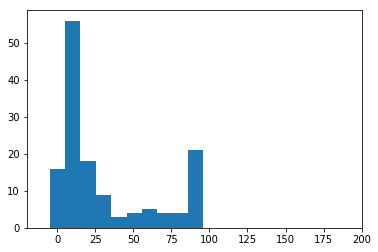

In [67]:
plt.hist(apogeetbl[apogeetbl['CLUSTER']=='ASCC_16']['VSINI'],bins=1000)
plt.xlim(-20,200)

In [57]:
apogeetbl[apogeetbl['CLUSTER']=='ASCC_16']

<Table length=177>
                      APSTAR_ID                       ... CG_PROB
                       bytes57                        ... float64
----------------------------------------------------- ... -------
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05214969+0150036 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05215284+0151520 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05215383+0150082 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05221771+0147091 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05221986+0201387 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05222204+0139294 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05222383+0136098 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05222532+0203201 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05223094+0110439 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05223654+0132040 ...     0.0
                                                  ... ...     ...
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05261010+0118443 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05261020+0122039 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05261117+0154523 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05261198+0153357 ...     0.9
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05261991+0147142 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05262199+0147576 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05262233+0138596 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-F.2M05262327+0147352 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05262608+0144227 ...     0.0
apogee.apo25m.s.stars.ORIONOB1AB-E.2M05263528+0139048 ...     0.0

(78, 82)

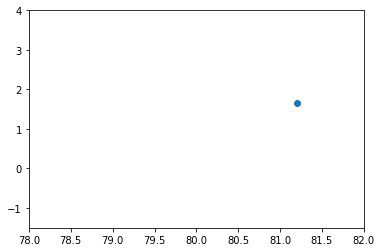

In [48]:
plt.scatter(Tcat['ra'],Tcat['dec'])
plt.ylim(-1.5,4)
plt.xlim(78,82)

In [56]:
Tcat[(80 < Tcat['ra']) & (Tcat['ra'] < 82) & (0 < Tcat['dec']) & (Tcat['dec'] < 3)]

<Table length=1>
cluster        ra              dec         ... cdips nspec_mems_GES nspec_GES
 str17      float64          float64       ...  str5     int64        int64  
------- --------------- ------------------ ... ----- -------------- ---------
ASCC_16 81.197998046875 1.6549999713897705 ... False              0         0

In [31]:
indx_apogee = np.zeros(len(Tcat),dtype=bool)
for i in range(len(Tcat)):
    name = Tcat['cluster'][i].strip()
    if name in clusters:
        print('Data found')
        indx_apogee[i] = True
    else:
        print('No APOGEE survey data')


No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
Data found
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
Data found
Data found
No APOGEE survey data
Data found
No APOGEE survey data
Data found
No APOGEE survey data
No APOGEE survey data
Data found
No APOGEE survey data
Data found
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
Data found
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
No APOGEE survey data
Data found
No APOGEE survey data

In [32]:
n_apoobs = []
n_apoobs_vsini5 = []
indx_apo = np.zeros(len(Tcat),dtype=bool)
#obs_by_galah = np.copy(galah_obs_indx)
for i in range(len(Tcat)):
    current_cluster = Tcat['cluster'][i]
    clusterindx = M['cluster'] == current_cluster
    #likelymemindx = (M[clusterindx]['proba'] > 0.5) & (~np.isnan(M[clusterindx]['bp_rp']))
    likelymemindx = (M[clusterindx]['proba'] > 0.68) & (~np.isnan(M[clusterindx]['bp_rp']))
    likelymems = M[clusterindx][likelymemindx]
    apo_vsini5 = apogeetbl['VSINI'] > 5
    apojoin = join(likelymems,apogeetbl,'source_id')
    apojoin_vsini = join(likelymems,apogeetbl[apo_vsini5],'source_id')
    n_apoobs += [len(apojoin)]
    n_apoobs_vsini5 += [len(apojoin_vsini)]
    if len(apojoin) != 0:
        indx_apo[i] = True
        #galah_obs_indx[i] = 1
n_apoobs = np.array(n_apoobs)
n_apoobs_vsini5 = np.array(n_apoobs_vsini5)

In [33]:
n_apoobs

array([  0,   0,   0,   0,   0, 194,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 147,   0,   0,  16,   0,  99,   0,
         0,  22,   0,   4,   0,   0,   0,   0,   0,   0,   0,  75,   0,
         0,   0,   0,  14,   0,   0,   0,   0,   0,  86,   0,   0,   0,
         3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   4,   0,   2,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  64,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  12,   0,   0,   0,   

In [34]:
hdulist=fits.open('/Users/bhealy/Downloads/GALAH_DR2.1_catalog.fits')
galahdata = Table(hdulist[1].data)

galahdata.rename_column('gaia_dr2_id','source_id')

In [35]:
n_galahobs = [] 
n_galahobs_vsini5 = []
indx_galah = np.zeros(len(Tcat),dtype=bool)
#obs_by_galah = np.copy(galah_obs_indx)
for i in range(len(Tcat)):
    current_cluster = Tcat['cluster'][i]
    clusterindx = M['cluster'] == current_cluster
    likelymemindx = (M[clusterindx]['proba'] > 0.68) & (~np.isnan(M[clusterindx]['bp_rp']))
    likelymems = M[clusterindx][likelymemindx]
    galah_vsini5 = galahdata['vsini'] > 5
    galahjoin = join(likelymems,galahdata,'source_id')
    galahjoin_vsini5 = join(likelymems,galahdata[galah_vsini5],'source_id')
    n_galahobs += [len(galahjoin)]
    n_galahobs_vsini5 += [len(galahjoin_vsini5)]
    if len(galahjoin) != 0:
        indx_galah[i] = True
        #galah_obs_indx[i] = 1
n_galahobs = np.array(n_galahobs)
n_galahobs_vsini5 = np.array(n_galahobs_vsini5)

In [36]:
n_galahobs

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  6,  0,  0,  0,  4,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 19,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, 12,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0,  0, 24,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [37]:
np.sum(indx_galah)

12

In [38]:
np.sum(indx_apogee)
np.sum(indx_apo)



15

In [39]:
np.sum(indx_gaiaeso)

18

In [40]:
#Add observatory name, merge tables
apoTcat = Tcat[indx_apogee]


In [41]:
Tcat[(indx_gaiaeso == True) & (indx_galah == True)]

<Table length=2>
     cluster         ra     dec      l    ...   Rgc   num_sectors_obs cdips
      str17       float32 float32 float32 ... float32      int64       bool
----------------- ------- ------- ------- ... ------- --------------- -----
NGC_2516          119.527   -60.8 273.861 ...  8322.8               2 False
NGC_3680          171.392  -43.24 286.751 ...  8109.5               1 False

In [42]:
Tcat[(indx_apo == True) & (indx_galah == True)]

<Table length=2>
     cluster         ra     dec      l    ...   Rgc   num_sectors_obs cdips
      str17       float32 float32 float32 ... float32      int64       bool
----------------- ------- ------- ------- ... ------- --------------- -----
ASCC_21            82.179   3.527 199.938 ...  8652.0               2  True
ASCC_16            81.198   1.655 201.139 ...  8649.6               3 False

In [43]:
Tcat[(indx_apo == True) & (indx_gaiaeso == True)]

<Table length=1>
     cluster         ra     dec      l    ...   Rgc   num_sectors_obs cdips
      str17       float32 float32 float32 ... float32      int64       bool
----------------- ------- ------- ------- ... ------- --------------- -----
NGC_2264          100.217   9.877 202.941 ...  9009.6               1 False

In [44]:
apo_chararr = np.zeros(len(Tcat[indx_apo]),dtype=bool)
apo_nstars = np.zeros(len(Tcat[indx_apo]),dtype=int)
apo_nstars = [x for x in n_apoobs[indx_apo]]
apo_nstars_vsini5 = [x for x in n_apoobs_vsini5[indx_apo]]


#apo_chararr = ['APO' for x in apo_chararr]
apo_chararr = [True for x in apo_chararr]


ges_chararr = np.zeros(len(Tcat[indx_gaiaeso]),dtype=bool)
ges_chararr = [True for x in ges_chararr]

galah_chararr = np.zeros(len(Tcat[indx_galah]),dtype=bool)
galah_chararr = [True for x in galah_chararr]

galah_nstars = np.zeros(len(Tcat[indx_galah]),dtype=int)
galah_nstars = [x for x in n_galahobs[indx_galah]]
galah_nstars_vsini5 = [x for x in n_galahobs_vsini5[indx_galah]]

In [45]:
apocol = Table.Column(data=apo_chararr,name='APO')
gescol = Table.Column(data=ges_chararr,name='GES')
galahcol = Table.Column(data=galah_chararr,name='GALAH')


n_apocol = Table.Column(data=apo_nstars,name='nstars_APO')
n_apocol_vsini5 = Table.Column(data=apo_nstars_vsini5,name='nstars_APO_vsini5')

n_gescol = Table.Column(data=np.zeros(len(Tcat[indx_gaiaeso]),dtype=int),name='nstars_GES')
n_galahcol = Table.Column(data=galah_nstars,name='nstars_GALAH')
n_galahcol_vsini5 = Table.Column(data=galah_nstars_vsini5,name='nstars_GALAH_vsini5')





In [46]:
gesTcat = Tcat[indx_gaiaeso]
galahTcat = Tcat[indx_galah]
apoTcat = Tcat[indx_apo]




In [47]:
apoTcat.add_column(apocol)

In [48]:
gesTcat.add_column(gescol)

In [49]:
galahTcat.add_column(galahcol)#,n_galahcol)

In [50]:
apoTcat.add_column(n_apocol)
gesTcat.add_column(n_gescol)
galahTcat.add_column(n_galahcol)

apoTcat.add_column(n_apocol_vsini5)
galahTcat.add_column(n_galahcol_vsini5)

In [51]:
test2=join(apoTcat,gesTcat,join_type='outer')

In [52]:
test3=join(test2,galahTcat,join_type='outer')

In [53]:
test3=test3.filled(False)
test3

<Table length=40>
     cluster         ra     dec   ... GALAH nstars_GALAH nstars_GALAH_vsini5
      str17       float32 float32 ...  bool    int64            int64       
----------------- ------- ------- ... ----- ------------ -------------------
ASCC_16            81.198   1.655 ...  True            7                   7
ASCC_19            81.982  -1.987 ... False            0                   0
ASCC_21            82.179   3.527 ...  True            4                   4
Alessi_24         260.764 -62.693 ...  True            9                   9
Alessi_9          265.974 -47.028 ...  True            1                   1
Alessi_Teutsch_12 255.421 -58.981 ...  True            2                   2
Collinder_135     109.362 -37.044 ...  True            6                   6
Collinder_69       83.792   9.813 ... False            0                   0
Collinder_95       97.788   9.894 ... False            0                   0
Ferrero_1         275.063 -32.338 ... False            0                   0
              ...     ...     ... ...   ...          ...                 ...
NGC_3680          171.392  -43.24 ...  True            1                   1
NGC_5460          211.847 -48.285 ...  True            7                   7
NGC_6475          268.447 -34.841 ... False            0                   0
NGC_7058          320.448  50.822 ... False            0                   0
NGC_752            29.223  37.794 ... False            0                   0
Pozzo_1           122.374 -47.335 ... False            0                   0
Ruprecht_111       219.01 -59.975 ... False            0                   0
Trumpler_21       203.068 -62.787 ... False            0                   0
Trumpler_3         48.004  63.218 ... False            0                   0
Turner_5          143.284 -36.358 ...  True            1                   1

In [55]:
test2.rename_column("['Ground_Observatory']",'ground_observatory')

In [21]:
#test2.show_in_browser()
test2

<Table masked=True length=30>
     cluster         ra     dec   ... num_sectors_obs cdips ground_observatory
      str17       float32 float32 ...      int64       bool        str3       
----------------- ------- ------- ... --------------- ----- ------------------
ASCC_16            81.198   1.655 ...               2  True                APO
ASCC_19            81.982  -1.987 ...               2  True                APO
ASCC_21            82.179   3.527 ...               2  True                APO
Collinder_69       83.792   9.813 ...               1  True                APO
Collinder_95       97.788   9.894 ...               2  True                APO
Ferrero_1         275.063 -32.338 ...               1 False                GES
IC_2391           130.292 -52.991 ...               4 False                GES
IC_2602           160.613 -64.426 ...               4 False                GES
IC_348             56.132  32.159 ...               1 False                APO
L_1641S            85.675  -8.133 ...               2  True                APO
              ...     ...     ... ...             ...   ...                ...
NGC_2451B         116.128 -37.954 ...               3  True                GES
NGC_2477          118.046 -38.537 ...               4  True                GES
NGC_2516          119.527   -60.8 ...              13  True                GES
NGC_2547          122.525 -49.198 ...               4  True                GES
NGC_3532          166.417 -58.707 ...               3 False                GES
NGC_6475          268.447 -34.841 ...               1 False                GES
NGC_7058          320.448  50.822 ...               2 False                APO
NGC_752            29.223  37.794 ...               1 False                APO
Pozzo_1           122.374 -47.335 ...               4  True                GES
Trumpler_3         48.004  63.218 ...               2 False                APO

In [54]:
for i in range(len(test3)):
    test3['cluster'][i] = test3['cluster'][i].strip()


In [55]:
m = test3['cluster'] == 'NGC_2264'

In [56]:
test3[m]

<Table length=1>
cluster     ra     dec      l    ... GALAH nstars_GALAH nstars_GALAH_vsini5
 str17   float32 float32 float32 ...  bool    int64            int64       
-------- ------- ------- ------- ... ----- ------------ -------------------
NGC_2264 100.217   9.877 202.941 ... False            0                   0

In [57]:
GES_APO_GALAH_Tcat = test3

In [58]:
GES_APO_GALAH_Tcat.sort(keys='dmode')

In [59]:
#GES_APO_Tcat.show_in_browser()
GES_APO_GALAH_Tcat

<Table length=40>
   cluster       ra     dec      l    ... GALAH nstars_GALAH nstars_GALAH_vsini5
    str17     float32 float32 float32 ...  bool    int64            int64       
------------- ------- ------- ------- ... ----- ------------ -------------------
      IC_2391 130.292 -52.991 270.386 ... False            0                   0
      IC_2602 160.613 -64.426 289.565 ... False            0                   0
   Melotte_20  51.617  48.975 147.357 ... False            0                   0
    NGC_2451A 115.736 -38.264 252.431 ... False            0                   0
     Alessi_9 265.974 -47.028 344.269 ...  True            1                   1
     NGC_6475 268.447 -34.841 355.813 ... False            0                   0
Collinder_135 109.362 -37.044 248.989 ...  True            6                   6
       IC_348  56.132  32.159 160.486 ... False            0                   0
      ASCC_21  82.179   3.527 199.938 ...  True            4                   4
      Pozzo_1 122.374 -47.335 262.798 ... False            0                   0
          ...     ...     ...     ... ...   ...          ...                 ...
    Ferrero_1 275.063 -32.338   0.674 ... False            0                   0
     NGC_2301 102.943   0.465 212.557 ... False            0                   0
     NGC_2423 114.299 -13.863 230.487 ... False            0                   0
     NGC_2447 116.141 -23.853 240.043 ... False            0                   0
     NGC_3680 171.392  -43.24 286.751 ...  True            1                   1
     NGC_2669 131.611 -52.931 270.829 ... False            0                   0
  Trumpler_21 203.068 -62.787 307.581 ... False            0                   0
     NGC_2318 104.854 -13.822 226.155 ... False            0                   0
 Ruprecht_111  219.01 -59.975 315.672 ... False            0                   0
     NGC_2477 118.046 -38.537 253.571 ... False            0                   0

In [60]:
ges_apo_indx = indx_apogee + indx_gaiaeso


In [61]:
#GES_APO_Tcat = Tcat[ges_apo_indx]
GES_APO_Tcat = GES_APO_Tcat[ges_apo_indx]


NameError: name 'GES_APO_Tcat' is not defined

In [62]:
GES_APO_Tcat.show_in_browser()

NameError: name 'GES_APO_Tcat' is not defined

In [63]:
GES_APO_GALAH_Tcat

<Table length=40>
   cluster       ra     dec      l    ... GALAH nstars_GALAH nstars_GALAH_vsini5
    str17     float32 float32 float32 ...  bool    int64            int64       
------------- ------- ------- ------- ... ----- ------------ -------------------
      IC_2391 130.292 -52.991 270.386 ... False            0                   0
      IC_2602 160.613 -64.426 289.565 ... False            0                   0
   Melotte_20  51.617  48.975 147.357 ... False            0                   0
    NGC_2451A 115.736 -38.264 252.431 ... False            0                   0
     Alessi_9 265.974 -47.028 344.269 ...  True            1                   1
     NGC_6475 268.447 -34.841 355.813 ... False            0                   0
Collinder_135 109.362 -37.044 248.989 ...  True            6                   6
       IC_348  56.132  32.159 160.486 ... False            0                   0
      ASCC_21  82.179   3.527 199.938 ...  True            4                   4
      Pozzo_1 122.374 -47.335 262.798 ... False            0                   0
          ...     ...     ...     ... ...   ...          ...                 ...
    Ferrero_1 275.063 -32.338   0.674 ... False            0                   0
     NGC_2301 102.943   0.465 212.557 ... False            0                   0
     NGC_2423 114.299 -13.863 230.487 ... False            0                   0
     NGC_2447 116.141 -23.853 240.043 ... False            0                   0
     NGC_3680 171.392  -43.24 286.751 ...  True            1                   1
     NGC_2669 131.611 -52.931 270.829 ... False            0                   0
  Trumpler_21 203.068 -62.787 307.581 ... False            0                   0
     NGC_2318 104.854 -13.822 226.155 ... False            0                   0
 Ruprecht_111  219.01 -59.975 315.672 ... False            0                   0
     NGC_2477 118.046 -38.537 253.571 ... False            0                   0

In [64]:
GES_APO_GALAH_Tcat.write('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless1000pc_cdips1500_gaiaeso_apogee_galah_68.dat',format='ascii')




In [6]:
GES_APO_Tcat = ascii.read('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless1000pc_cdips1500_gaiaeso_apogee.dat')
#GES_APO_Tcat[GES_APO_Tcat['ground_observatory']=='APO'].show_in_browser()


In [7]:
GES_APO_Tcat

<Table length=29>
  cluster            ra                 dec         ... cdips ground_observatory
   str12          float64             float64       ...  str5        str3       
------------ ------------------ ------------------- ... ----- ------------------
     IC_2391 130.29200744628906  -52.99100112915039 ... False                GES
     IC_2602 160.61300659179688   -64.4260025024414 ... False                GES
  Melotte_20 51.617000579833984  48.974998474121094 ... False                APO
   NGC_2451A 115.73600006103516 -38.263999938964844 ...  True                GES
    NGC_6475  268.4469909667969 -34.840999603271484 ... False                GES
      IC_348  56.13199996948242  32.159000396728516 ... False                APO
    NGC_2232  96.88800048828125  -4.749000072479248 ...  True                APO
     ASCC_21  82.17900085449219  3.5269999504089355 ...  True                APO
     Pozzo_1  122.3740005493164 -47.334999084472656 ...  True                GES
     ASCC_16    81.197998046875  1.6549999713897705 ...  True                APO
         ...                ...                 ... ...   ...                ...
  Trumpler_3  48.00400161743164   63.21799850463867 ... False                APO
Collinder_95  97.78800201416016   9.894000053405762 ...  True                APO
    NGC_2264 100.21700286865234   9.876999855041504 ...  True                GES
    NGC_2264 100.21700286865234   9.876999855041504 ...  True                APO
   Ferrero_1    275.06298828125   -32.3380012512207 ... False                GES
    NGC_2301 102.94300079345703  0.4650000035762787 ...  True                GES
    NGC_2423 114.29900360107422  -13.86299991607666 ...  True                GES
    NGC_2447 116.14099884033203  -23.85300064086914 ...  True                APO
    NGC_2318 104.85399627685547 -13.821999549865723 ...  True                APO
    NGC_2477  118.0459976196289   -38.5369987487793 ...  True                GES

In [8]:
np.sum(GES_APO_Tcat['nbstars']*.05 >= 30)

7

In [239]:
Gaia.query_object_async('NGC 2516',radius=1*u.deg)

INFO: Query finished. [astroquery.utils.tap.core]


<Table length=86703>
    solution_id             designation          ...          dist        
                                                 ...                      
       int64                   object            ...        float64       
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 5290722276370987520 ... 0.0005886920989740758
1635721458409799680 Gaia DR2 5290722276370987648 ... 0.0036035426199305513
1635721458409799680 Gaia DR2 5290722276369441920 ...  0.004505309955118292
1635721458409799680 Gaia DR2 5290722100274625152 ...  0.006546348410501418
1635721458409799680 Gaia DR2 5290722310728369536 ...  0.006993741098256121
1635721458409799680 Gaia DR2 5290722310726310912 ...  0.007526438399143265
1635721458409799680 Gaia DR2 5290722276370908544 ...   0.00759411254169863
1635721458409799680 Gaia DR2 5290722310730726784 ...  0.008833592567107793
1635721458409799680 Gaia DR2 5290722310726311040 ...  0.009181846225772177
                ...                          ... ...                   ...
1635721458409799680 Gaia DR2 5289388667545835520 ...    0.9999427187341767
1635721458409799680 Gaia DR2 5289871387511358976 ...    0.9999430883169386
1635721458409799680 Gaia DR2 5291009897441960576 ...    0.9999466413234396
1635721458409799680 Gaia DR2 5289873728268980480 ...    0.9999509198525077
1635721458409799680 Gaia DR2 5290036043672639232 ...    0.9999527588534947
1635721458409799680 Gaia DR2 5291011924666565888 ...    0.9999548491480831
1635721458409799680 Gaia DR2 5291103360228113280 ...    0.9999574274047229
1635721458409799680 Gaia DR2 5291020171004969472 ...     0.999979558710016
1635721458409799680 Gaia DR2 5291012616156781440 ...    0.9999938557804069
1635721458409799680 Gaia DR2 5290678807002858752 ...     0.999998476893826

In [257]:
from astropy.coordinates import SkyCoord
SC = SkyCoord(118.7091202133573*u.deg, -60.84460613454599*u.deg)

In [258]:
Gaia.query_object_async(SC,radius=21*2*u.arcsec)

INFO: Query finished. [astroquery.utils.tap.core]


<Table length=18>
    solution_id             designation          ...          dist        
                                                 ...                      
       int64                   object            ...        float64       
------------------- ---------------------------- ... ---------------------
1635721458409799680 Gaia DR2 5290728834785867264 ... 6.991183577800648e-06
1635721458409799680 Gaia DR2 5290728839080747648 ... 0.0029404890072409007
1635721458409799680 Gaia DR2 5290728839075707264 ... 0.0031186700638704975
1635721458409799680 Gaia DR2 5290728834782790528 ...   0.00561390787606386
1635721458409799680 Gaia DR2 5290731794018247168 ...  0.005808959579132066
1635721458409799680 Gaia DR2 5290728839075705600 ...   0.00646927868683759
1635721458409799680 Gaia DR2 5290728834782795264 ...  0.006659637731209117
1635721458409799680 Gaia DR2 5290728839080748032 ...   0.00671843220606649
1635721458409799680 Gaia DR2 5290728834785864192 ...  0.006806601636960371
1635721458409799680 Gaia DR2 5290728839075705728 ...  0.006924069453277613
1635721458409799680 Gaia DR2 5290728839079912832 ...  0.006931943479890545
1635721458409799680 Gaia DR2 5290728839080748160 ...  0.007365294415403707
1635721458409799680 Gaia DR2 5290728834783548032 ...   0.00850817270852151
1635721458409799680 Gaia DR2 5290728770360503552 ...  0.009125426230842788
1635721458409799680 Gaia DR2 5290728942156968064 ...   0.00921035110754673
1635721458409799680 Gaia DR2 5290728839080747008 ...  0.009917883143569318
1635721458409799680 Gaia DR2 5290728804721008128 ...  0.010132295425553542
1635721458409799680 Gaia DR2 5290728869142527232 ...    0.0116257202680405

In [279]:
qry=Gaia.query_object_async('Gaia DR2 '+np.str(5290728834785867264), radius=21*2*u.arcsec)

INFO: Query finished. [astroquery.utils.tap.core]


In [280]:
qry['dist'] = qry['dist'] / (21/3600)

nearby_bright = qry[qry['phot_g_mean_mag'] < 16][1:]

In [358]:
closeids = nearby_bright['source_id'].data.tolist() #[ngc2516mems['source_id'][close].data]
closemags = np.round(nearby_bright['phot_g_mean_mag'].data,0).tolist()
closeseps  = np.round(nearby_bright['dist'].data,1).tolist()

In [360]:
closemags=[]
for i in range(len(nearby_bright)):
    closemags += [np.float(format(nearby_bright['phot_g_mean_mag'].data[i],'.1f'))]

In [361]:
closemags

[15.4, 13.2]

In [255]:
qry[0]['ra'],qry[0]['dec']

(118.7091202133573, -60.84460613454599)

In [83]:
for i in range(len(GES_APO_Tcat)):
    GES_APO_Tcat['cluster'][i] = Tcat[ges_apo_indx]['cluster'][i].strip()


In [86]:
m= GES_APO_Tcat['cluster'] == 'NGC_2264'

In [88]:
GES_APO_Tcat[0]

<Row index=0>
cluster    ra     dec      l       b      r50   nbstars   pmra  sigpmra uncertpmra  pmdec  sigpmdec uncertpmdec   par    sigpar uncertpar   d05     d16    dmode    d84     d95   dmodePLUS01 dmodeMINUS01    X       Y       Z      Rgc   num_sectors_obs
 str17  float32 float32 float32 float32 float32  int16  float32 float32  float32   float32 float32    float32   float32 float32  float32  float32 float32 float32 float32 float32   float32     float32    float32 float32 float32 float32      int64     
------- ------- ------- ------- ------- ------- ------- ------- ------- ---------- ------- -------- ----------- ------- ------- --------- ------- ------- ------- ------- ------- ----------- ------------ ------- ------- ------- ------- ---------------
IC_2391 130.292 -52.991 270.386  -6.737   0.814     224 -24.644   0.883      0.056  23.316    0.733       0.049   6.582   0.133      0.01   151.2   151.2   151.3   151.3   151.4       149.0        153.6     1.0  -150.2   -17.7  8340.3               2

In [9]:
tessclusters=Table.read('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless1500pc_gaiaeso.dat',format='ascii')
tessclusters

<Table length=20>
  cluster            ra         ...       Rgc        num_sectors_obs
   str12          float64       ...     float64           int64     
------------ ------------------ ... ---------------- ---------------
     IC_2391 130.29200744628906 ...  8340.2998046875               2
     IC_2602 160.61300659179688 ...   8290.599609375               2
   NGC_2451A 115.73600006103516 ...   8399.599609375               2
     IC_4665  266.5539855957031 ...           8057.5               1
     Pozzo_1  122.3740005493164 ...           8390.0               2
   NGC_2451B 116.12799835205078 ...  8456.7998046875               2
    NGC_2547  122.5250015258789 ...  8385.7001953125               2
    NGC_6633  276.8450012207031 ...  8030.2998046875               1
    NGC_2516  119.5270004272461 ...  8322.7998046875               6
    NGC_3532 166.41700744628906 ...   8192.599609375               1
    NGC_2264 100.21700286865234 ...   9009.599609375               1
   Ferrero_1    275.06298828125 ...  7496.7001953125               1
    NGC_2301 102.94300079345703 ...  9076.2001953125               1
    NGC_2423 114.29900360107422 ...  8959.7001953125               1
    NGC_3680 171.39199829101562 ...           8109.5               1
    NGC_2669 131.61099243164062 ...           8401.0               1
 Trumpler_21  203.0679931640625 ...           7602.0               1
 Trumpler_30  269.1820068359375 ... 6991.39990234375               1
Ruprecht_111 219.00999450683594 ...  7379.2998046875               2
    NGC_2477  118.0459976196289 ...   8852.900390625               2

In [10]:
np.median(tessclusters['nbstars'])

228.5

In [61]:
Tcat[indx_gaiaeso].write('/Users/bhealy/Documents/PhD_Thesis/Target_Clusters/allages_dless1500pc_gaiaeso.dat',format='ascii',overwrite=True)
#gaiaesocol = Table.Column(data=indx_gaiaeso,name='GAIAESO_obs')
#Tcat.add_column(gaiaesocol)


In [114]:
#NGC 3532 vsini + astero analysis???

In [ ]:
81.197998046875, 1.6549999713897705

In [132]:
#O = Observations.query_object('NGC_2516_89')
O = Observations.query_object('[KPR2005] 19',radius=1*u.arcmin) 
###O = Observations.query_object('NGC_6475',radius=1*u.arcmin) 

#O = Observations.query_region('81.197998046875, 1.6549999713897705')
tessmask = np.zeros(len(O),dtype=bool)
for i in range(len(O)):
    if (O['project'][i] == 'TESS') and (O['target_name'][i] == 'TESS FFI'): #and (O['provenance_name'][i] == 'CDIPS'): #(O['dataproduct_type'][i] == 'timeseries'):
        tessmask[i] = True
        
O[tessmask]

<Table masked=True length=1>
intentType obs_collection provenance_name ...  srcDen    obsid    distance
   str7        str11           str12      ... float64    str11    float64 
---------- -------------- --------------- ... ------- ----------- --------
   science           TESS            SPOC ...     nan 17000219978      0.0

In [133]:
prods = Observations.get_product_list(O[tessmask][0])
calmask = np.where(prods['description'] == 'Calibrated full frame image')
prods[calmask][450:451]

Observations.download_products(prods[calmask][450:451])



<Table length=1>
                                             Local Path                                             ...
                                               str99                                                ...
--------------------------------------------------------------------------------------------------- ...
./mastDownload/TESS/tess2018360052939-s0006-1-1-0126-s/tess2018360052939-s0006-1-1-0126-s_ffic.fits ...

In [116]:
prods[calmask]

<Table masked=True length=1107>
   obsID    obs_collection dataproduct_type ...   size   parent_obsid dataRights
   str11         str4            str5       ...  int64      str11        str6   
----------- -------------- ---------------- ... -------- ------------ ----------
17000672355           TESS            image ... 35547840  17000676396     PUBLIC
17000671047           TESS            image ... 35547840  17000676396     PUBLIC
17000658963           TESS            image ... 35547840  17000676396     PUBLIC
17000663127           TESS            image ... 35547840  17000676396     PUBLIC
17000662848           TESS            image ... 35547840  17000676396     PUBLIC
17000660169           TESS            image ... 35547840  17000676396     PUBLIC
17000672634           TESS            image ... 35547840  17000676396     PUBLIC
17000669228           TESS            image ... 35547840  17000676396     PUBLIC
17000660873           TESS            image ... 35547840  17000676396     PUBLIC
17000665151           TESS            image ... 35547840  17000676396     PUBLIC
        ...            ...              ... ...      ...          ...        ...
17000676127           TESS            image ... 35547840  17000676396     PUBLIC
17000674127           TESS            image ... 35547840  17000676396     PUBLIC
17000665384           TESS            image ... 35547840  17000676396     PUBLIC
17000667275           TESS            image ... 35547840  17000676396     PUBLIC
17000671382           TESS            image ... 35547840  17000676396     PUBLIC
17000661602           TESS            image ... 35547840  17000676396     PUBLIC
17000674982           TESS            image ... 35547840  17000676396     PUBLIC
17000675203           TESS            image ... 35547840  17000676396     PUBLIC
17000667276           TESS            image ... 35547840  17000676396     PUBLIC
17000671383           TESS            image ... 35547840  17000676396     PUBLIC

In [104]:
prods = Observations.get_product_list(O[tessmask][0])
Observations.download_products(prods)
#prods

KeyboardInterrupt: 

In [62]:
Table(table).show_in_browser()

In [6]:
clustmask = table['cluster'] == 'NGC_2516'
#clustmask = table['cluster'] == 'NGC_3532'
#clustmask = table['cluster'] == 'Melotte_22'
#clustmask = table['cluster'] == 'ESO_130_08'
#memmask = members['cluster'] == 'NGC_2516'



Ctbl = Table(table[clustmask])
cra = Ctbl['ra'].data[0]
cdec = Ctbl['dec'].data[0]
cpmra = Ctbl['pmra'].data[0]
cpmdec = Ctbl['pmdec'].data[0]
#cname = Ctbl['cluster'].data[0].strip()
#mwsc = cat['MWSC'].data[0]

Ctbl

<Table length=1>
     cluster         ra     dec      l    ...    X       Y       Z      Rgc  
      str17       float32 float32 float32 ... float32 float32 float32 float32
----------------- ------- ------- ------- ... ------- ------- ------- -------
NGC_2516          119.527   -60.8 273.861 ...    26.5  -392.4  -111.8  8322.8

In [45]:
cra

226.051

In [46]:
outID, outEclipLong, outEclipLat, outSec, outCam, outCcd, outColPix, outRowPix, scinfo = tess_stars2px_function_entry(0,cra,cdec)
tess_stars2px_function_entry(0,cra,cdec)


(array([0, 0]),
 array([240.27070339, 240.27070339]),
 array([-35.36762224, -35.36762224]),
 array([11, 12]),
 array([2, 2]),
 array([3, 4]),
 array([ 110.30461025, 1880.46819334]),
 array([1105.80998188, 1095.2919802 ]),
 <tess_stars2px.TESS_Spacecraft_Pointing_Data at 0x1c2a734c18>)

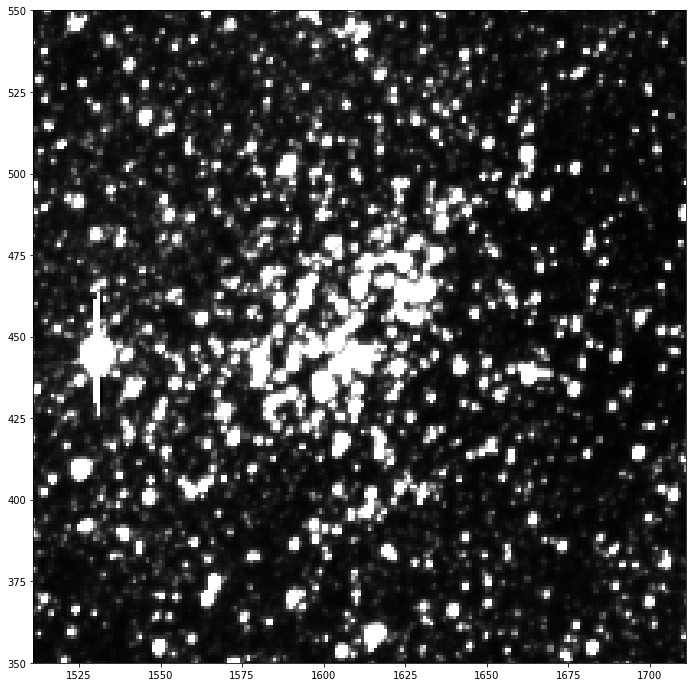

In [124]:
path = '/Users/bhealy/Documents/PhD_Thesis/Python/mastDownload/TESS/'
#clustselect = 'ESO_130-08_a/*.fits'
#clustselect = 'NGC_6208/*.fits'
clustselect = 'NGC_3532_10/*.fits'


file = glob.glob(path+clustselect)
hdulist = fits.open(file[0])

sciim = hdulist[1].data
scihead = hdulist[1].header

wcs = WCS(header=scihead)

#targetcoords = np.array(['18:29:56.375 +85:13:57.582'])
targetcoords = np.array([np.str(cra)+' '+np.str(cdec)])
SC = SkyCoord(targetcoords,unit='deg')
xcen = np.round(SC.to_pixel(wcs)[0][0])
ycen = np.round(SC.to_pixel(wcs)[1][0])

plt.figure(figsize=(12,12))
#interval = MinMaxInterval()
interval = ZScaleInterval()
stretch = SquaredStretch()
#stretch = LogStretch()
plt.imshow(stretch(interval(sciim)),origin='lower',cmap='gray')
plt.xlim(xcen-100,xcen+100)
plt.ylim(ycen-100,ycen+100)
plt.show()

In [13]:
Table(members[memmask][goodmask])

<Table length=798>
        ra                 dec         ...  proba       cluster     
     float64             float64       ... float32       str17      
------------------ ------------------- ... ------- -----------------
119.64282668758783 -61.452193604045654 ...     0.7 NGC_2516         
119.86335546049123 -61.516366132126194 ...     0.8 NGC_2516         
119.98137591874814   -61.4038632769621 ...     0.8 NGC_2516         
119.72947963777617 -61.628932899579574 ...     0.8 NGC_2516         
119.67760602546025 -61.638058241591146 ...     0.8 NGC_2516         
121.13929660975464  -61.34479131354677 ...     0.8 NGC_2516         
119.57987172369998  -61.39780746301892 ...     0.9 NGC_2516         
119.74149451557692 -61.544223655176246 ...     0.8 NGC_2516         
119.73449588162602 -61.520100528477755 ...     0.9 NGC_2516         
 119.3190554272407 -61.527369011583474 ...     1.0 NGC_2516         
               ...                 ... ...     ...               ...
119.58748798560315  -60.01077111578304 ...     0.6 NGC_2516         
119.25403743603239  -60.19601543927814 ...     0.9 NGC_2516         
119.37353244383905  -60.18878903569498 ...     0.7 NGC_2516         
119.39598933406903   -60.1163724564806 ...     0.8 NGC_2516         
119.65314123565898  -60.03608363317619 ...     0.7 NGC_2516         
119.32822384746801 -60.258156207121914 ...     0.7 NGC_2516         
119.40781456963013  -60.00823890355261 ...     0.9 NGC_2516         
119.31421518456791  -60.26770367545517 ...     0.9 NGC_2516         
119.62697416831926 -60.157774012693494 ...     0.8 NGC_2516         
119.39433047854344   -60.2066996923345 ...     0.7 NGC_2516

In [6]:
#memmask = members['cluster'] == 'ESO_130_08'
#memmask = members['cluster'] == 'NGC_6208'
memmask = members['cluster'] == 'NGC_188'

#memmask = members['cluster'] == 'Melotte_22'



goodmask = members[memmask]['proba'] >= 0.5
brightmask = (members[memmask][goodmask]['phot_g_mean_mag'] < 9) & (members[memmask][goodmask]['bp_rp'] > 1.)
Mems = Table(members[memmask][goodmask])

rgMems = Table(members[memmask][goodmask][brightmask])
Mems[brightmask]


/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.


<Table length=0>
   ra     dec   source_id    l    ... phot_g_mean_mag  bp_rp   proba  cluster
float64 float64   int64   float64 ...     float64     float64 float32  str17 
------- ------- --------- ------- ... --------------- ------- ------- -------

In [8]:
ngc_188 = Table(members[memmask][goodmask])

(19, 5)

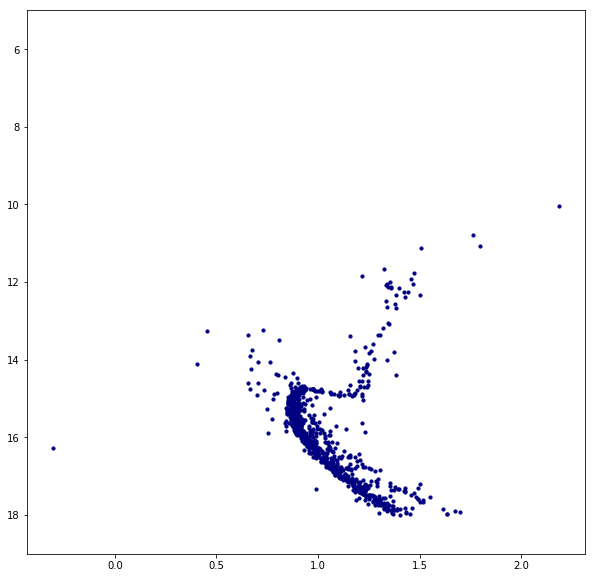

In [16]:
plt.figure(figsize=(10,10))
good = ngc_188['proba'] >= 0.5
plt.scatter(ngc_188['bp_rp'][good],ngc_188['phot_g_mean_mag'][good],color='navy',s=10)
plt.ylim(19,5)

In [18]:
ngc_188['ra','dec','source_id','phot_g_mean_mag','bp_rp','proba'].write('/Users/bhealy/Downloads/NGC_188_members.dat',format='ascii')




In [16]:
Mems.write('/Users/bhealy/Documents/PhD_Thesis/Membertables/NGC_1901.dat',format='ascii')

In [65]:
memsSC = SkyCoord(Mems['ra'],Mems['dec'],unit='deg')
memsx = memsSC.to_pixel(wcs)[0]
memsy = memsSC.to_pixel(wcs)[1]
rgmemsSC = SkyCoord(rgMems['ra'],rgMems['dec'],unit='deg')
rgMemsx = rgmemsSC.to_pixel(wcs)[0]
rgMemsy = rgmemsSC.to_pixel(wcs)[1]

NameError: name 'wcs' is not defined

(19, 5)

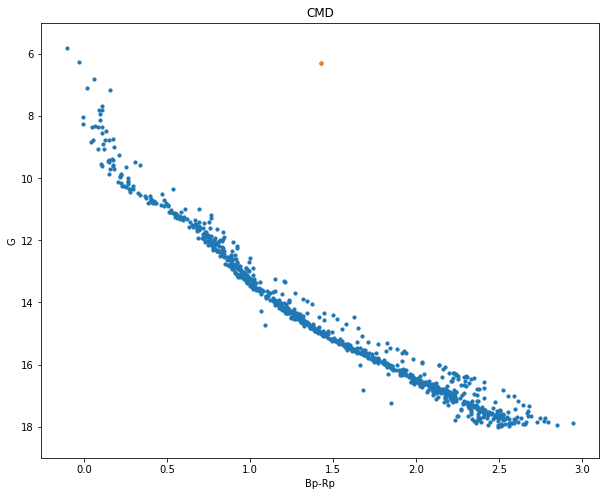

In [66]:
plt.figure(figsize=(10,8))
plt.scatter(Mems['bp_rp'],Mems['phot_g_mean_mag'],s=10)
plt.scatter(rgMems['bp_rp'],rgMems['phot_g_mean_mag'],s=10)
#plt.scatter(np.nanmedian(Mems['bp_rp']),np.nanmedian(Mems['phot_g_mean_mag']),marker='D',s=100)
plt.title('CMD')
plt.ylabel('G')
plt.xlabel('Bp-Rp')
plt.ylim(19,5)

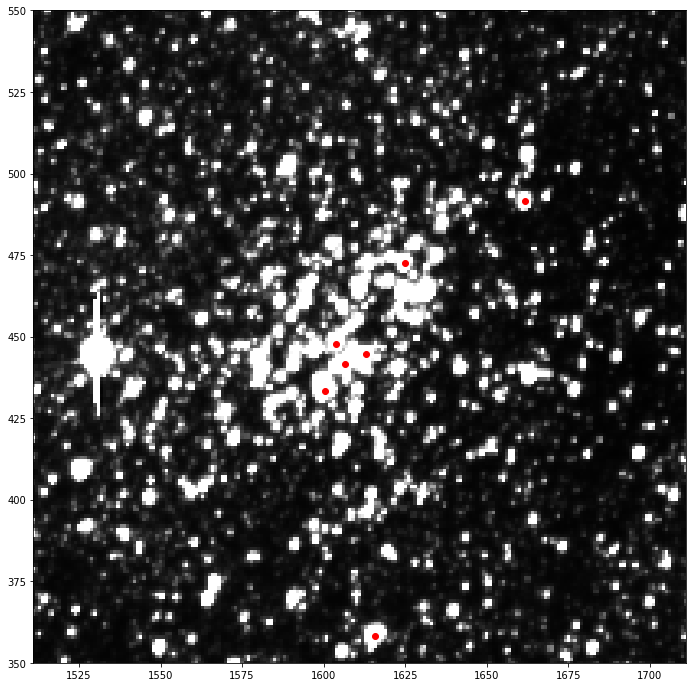

In [134]:

plt.figure(figsize=(12,12))
#interval = MinMaxInterval()
interval = ZScaleInterval()
stretch = SquaredStretch()
#stretch = LogStretch()
plt.imshow(stretch(interval(sciim)),origin='lower',cmap='gray')
plt.scatter(rgMemsx,rgMemsy,color='red',alpha=1)
#plt.scatter(memsx,memsy,color='red',alpha=1)

plt.xlim(xcen-100,xcen+100)
plt.ylim(ycen-100,ycen+100)
plt.show()

In [143]:
np.nanmedian(Mems['bp_rp'])
np.nanmedian(Mems['phot_g_mean_mag'])



14.888251

In [19]:
Gaia.login()

KeyboardInterrupt: 